###**Clasificación de Letras Dinámicas del Abecedario de Lengua de Señas Mexicana**

Se recopilaron videos de 21 participantes (n hombres y m mujeres) para las 6 letras (J,K,Ñ,Q,X,Z) dinámicas del abecedario de lengua de señas mexicana. Para cada letra se realizaron 5 repeticiones. Y se tomaron las muestras de los participantes desde los ángulos perfil y frontal.

Los videos se capturaron con una cámara de video profesional a 1 metro de altura y dos metros de distancia de los participantes con fondo verde. Posteriormente a cada video se le realizó un segmentado y se extrajo de manera aleatoria 30 y 60 frames por muestra. Para la fase de clasificación se excluyeron las muestras de dos participantes para que formaran parte del conjunto de pruebas. El flujo de trabajo para la clasificación fue el siguiente:

Extracción de características con media pipe
Estandarización de los datos a través de la prueba Z
Reducción de dimensionalidad a través de componentes principales
Aplicación de los métodos de clasificación (KNN, regresión logística, Random Forest, Gradient Boosting, AdaBoost, Decision Tree).


Para cada sección se aplicaron 6 clasificadores sin reducción de dimensionalidad y con reducción de dimensionalidad.

La dirección de las carpetas con los videos y las imagenes segmentadas es posible consultarlas aqui

https://drive.google.com/drive/folders/19eRSMyKud_rBH0VVEwwTLZqWHCgJNPPq?usp=sharing, https://drive.google.com/drive/folders/1UZsDFEgt0j8iJ1Gi4sKMHhkrWDl_S4Ng?usp=sharing, https://drive.google.com/drive/folders/1Xm1BSY9TYrQQ6ZDR8M5072BbIdUKPdw6?usp=sharing, https://drive.google.com/drive/folders/1zaAAQ5PHUH8aDVBrjkuUQ0EyPrJbrvdE?usp=sharing



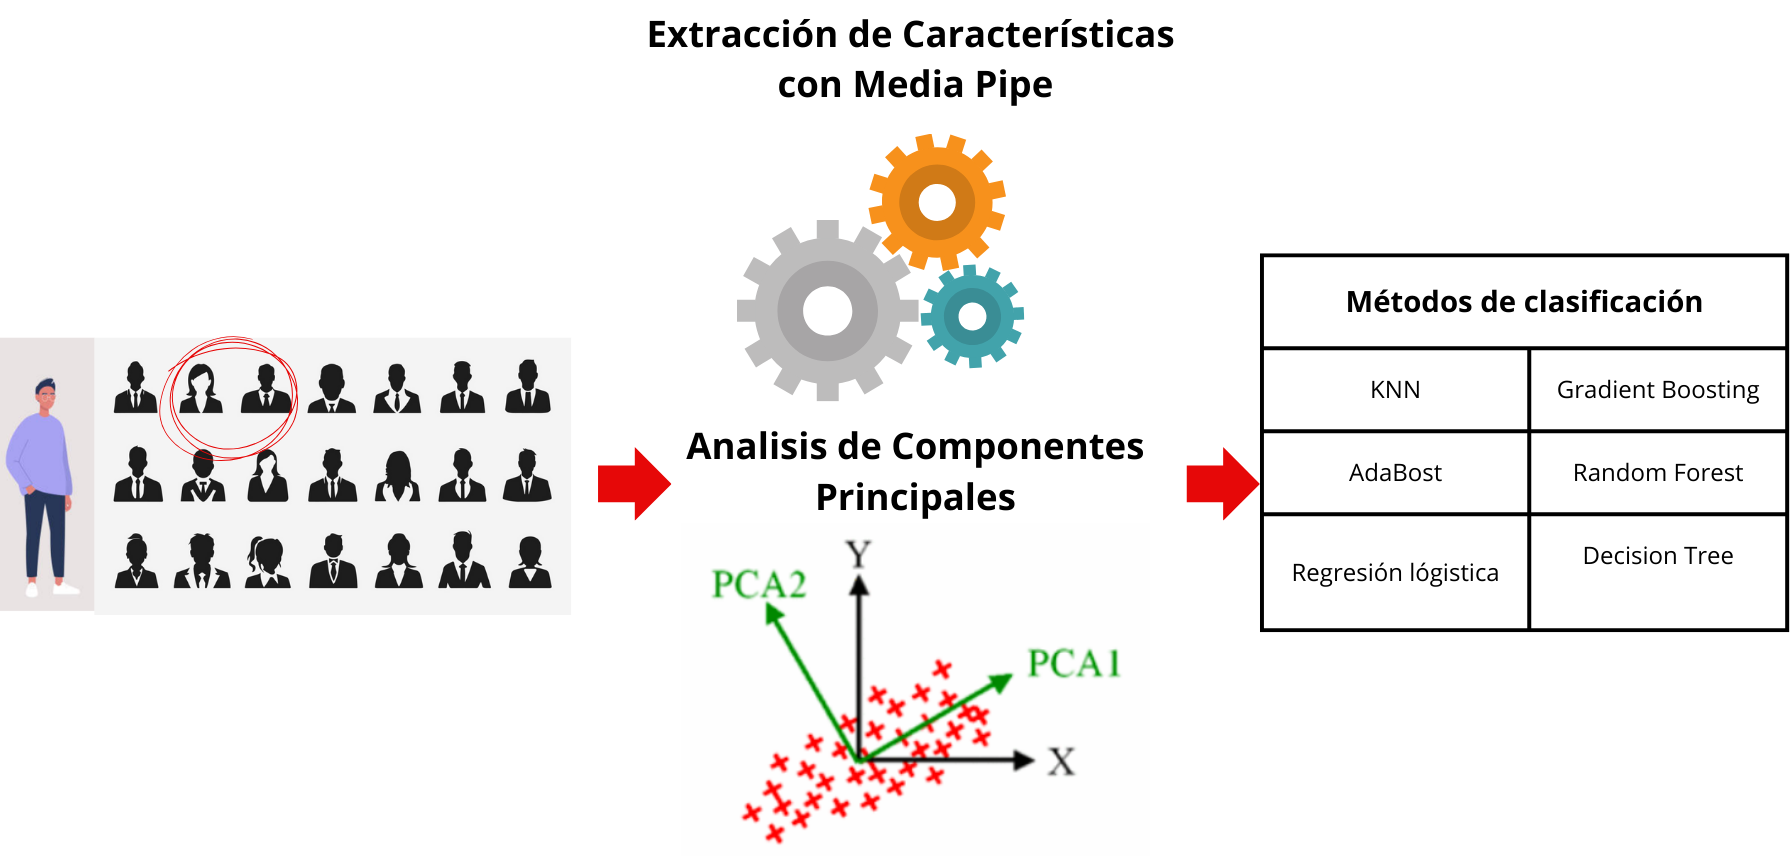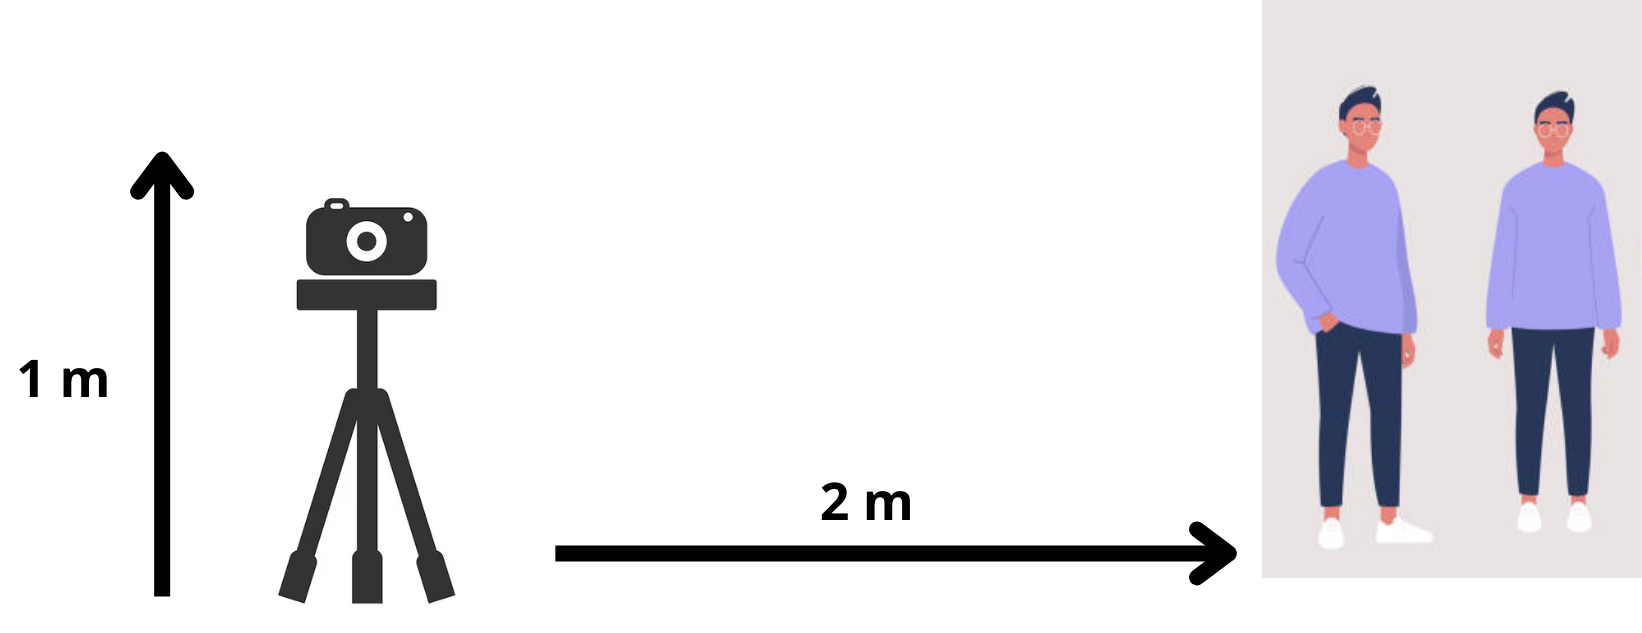

Entonces iniciamos cargando el espacio en la nube de drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Ruta de la carpeta con videos en Google Drive
videos_folder = '/content/drive/My Drive/test'

# Carpeta para guardar los frames extraídos (crea la carpeta si no existe)
output_frames_folder = '/content/drive/My Drive/frames'
os.makedirs(output_frames_folder, exist_ok=True)

En esta sección lo que se realiza es extraer los frames de cada video sin embargo esto ya no sera necesario ya que ya estan almacenados en las carpetas

In [ ]:
import cv2
import os

def extract_frames(video_path, output_folder):
    # Intenta abrir el video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error al abrir el archivo de video: {video_path}")
        return

    frame_count = 0
    video_name = os.path.basename(video_path).split('.')[0]
    video_folder = os.path.join(output_folder, video_name)
    os.makedirs(video_folder, exist_ok=True)

    while True:
        ret, frame = cap.read()
        if not ret:
            print(f"Finalizado {video_name} - Total frames extraídos: {frame_count}")
            break
        # Guardar cada frame en la carpeta correspondiente
        frame_filename = os.path.join(video_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    cap.release()

# Ruta de la carpeta `Perfil` en Google Drive
perfil_folder = '/content/drive/My Drive/SignalLanguage/Frontal/'

# Carpeta principal para guardar los frames extraídos
output_frames_folder = '/content/drive/My Drive/frames_SignalLanguage/Frontal/'
os.makedirs(output_frames_folder, exist_ok=True)

# Recorre cada subcarpeta dentro de `Perfil` (una por cada letra)
for letter_folder in os.listdir(perfil_folder):
    letter_path = os.path.join(perfil_folder, letter_folder)

    # Verifica que `letter_path` sea una carpeta
    if os.path.isdir(letter_path):
        print(f"Procesando letra: {letter_folder}")

        # Carpeta de salida para esta letra
        letter_output_folder = os.path.join(output_frames_folder, letter_folder)
        os.makedirs(letter_output_folder, exist_ok=True)

        # Recorre todos los videos en la carpeta de la letra actual y extrae los frames
        for video_file in os.listdir(letter_path):
            video_path = os.path.join(letter_path, video_file)
            if os.path.isfile(video_path) and video_path.endswith(('.mp4', '.avi', '.mov')):
                print(f"Procesando video: {video_file}")
                extract_frames(video_path, letter_output_folder)
            else:
                print(f"El archivo {video_file} no es un video válido.")


Procesando letra: J
Procesando video: S8-J-frontal-1.mov
Finalizado S8-J-frontal-1 - Total frames extraídos: 114
Procesando video: S8-J-frontal-2.mov
Finalizado S8-J-frontal-2 - Total frames extraídos: 113
Procesando video: S8-J-frontal-3.mov
Finalizado S8-J-frontal-3 - Total frames extraídos: 137
Procesando video: S8-J-frontal-4.mov
Finalizado S8-J-frontal-4 - Total frames extraídos: 108
Procesando video: S8-J-frontal-5.mov
Finalizado S8-J-frontal-5 - Total frames extraídos: 96
Procesando video: S20-J-frontal-1.mp4
Finalizado S20-J-frontal-1 - Total frames extraídos: 157
Procesando video: S20-J-frontal-2.mp4
Finalizado S20-J-frontal-2 - Total frames extraídos: 150
Procesando video: S14-J-frontal-1.mov
Finalizado S14-J-frontal-1 - Total frames extraídos: 65
Procesando video: S9-J-frontal-1.mov
Finalizado S9-J-frontal-1 - Total frames extraídos: 90
Procesando video: S9-J-frontal-2.mov
Finalizado S9-J-frontal-2 - Total frames extraídos: 102
Procesando video: S9-J-frontal-3.mov
Finalizado

En este apartado ocurre la extracción aleatoria de 30 frames para cada video.

In [ ]:
import os
import random
import shutil

# Ruta principal de los frames organizados por vista y letra
frames_folder = '/content/drive/My Drive/frames_SignalLanguage/'

# Carpeta de salida para almacenar los frames seleccionados
selected_frames_folder = '/content/drive/My Drive/selected_frames'
os.makedirs(selected_frames_folder, exist_ok=True)

# Para cada vista en "perfil" y "frontal"
for view in ['Perfil', 'Frontal']:
    view_path = os.path.join(frames_folder, view)
    view_output = os.path.join(selected_frames_folder, view)
    os.makedirs(view_output, exist_ok=True)

    # Para cada letra dentro de la vista
    for letter in os.listdir(view_path):
        letter_path = os.path.join(view_path, letter)
        letter_output = os.path.join(view_output, letter)
        os.makedirs(letter_output, exist_ok=True)

        # Recorremos cada subcarpeta de videos dentro de la carpeta de la letra actual
        for video_folder in os.listdir(letter_path):
            video_path = os.path.join(letter_path, video_folder)

            # Verificamos que sea una carpeta y contenga frames
            if os.path.isdir(video_path):
                frames = [f for f in os.listdir(video_path) if f.endswith('.jpg')]

                # Seleccionamos aleatoriamente hasta 30 frames, o todos si hay menos de 30
                selected_frames = random.sample(frames, min(30, len(frames)))

                # Crear carpeta para el video dentro de la salida
                video_output = os.path.join(letter_output, video_folder)
                os.makedirs(video_output, exist_ok=True)

                # Copiar los frames seleccionados a la carpeta de salida correspondiente
                for frame in selected_frames:
                    src_path = os.path.join(video_path, frame)
                    dst_path = os.path.join(video_output, frame)
                    shutil.copy(src_path, dst_path)

                print(f"Letra {letter}, Vista {view}, Video {video_folder}: seleccionados {len(selected_frames)} frames")


Letra J, Vista Perfil, Video S8-J-lateral-1: seleccionados 30 frames
Letra J, Vista Perfil, Video S8-J-lateral-2: seleccionados 30 frames
Letra J, Vista Perfil, Video S8-J-lateral-3: seleccionados 30 frames
Letra J, Vista Perfil, Video S8-J-lateral-4: seleccionados 30 frames
Letra J, Vista Perfil, Video S8-J-lateral-5: seleccionados 30 frames
Letra J, Vista Perfil, Video S9-J-perfil-1: seleccionados 30 frames
Letra J, Vista Perfil, Video S9-J-perfil-2: seleccionados 30 frames
Letra J, Vista Perfil, Video S9-J-perfil-3: seleccionados 30 frames
Letra J, Vista Perfil, Video S9-J-perfil-4: seleccionados 30 frames
Letra J, Vista Perfil, Video S9-J-perfil-5: seleccionados 30 frames
Letra J, Vista Perfil, Video S7-J-perfil-1: seleccionados 30 frames
Letra J, Vista Perfil, Video S7-J-perfil-2: seleccionados 30 frames
Letra J, Vista Perfil, Video S7-J-perfil-3: seleccionados 30 frames
Letra J, Vista Perfil, Video S7-J-perfil-4: seleccionados 30 frames
Letra J, Vista Perfil, Video S7-J-perfil-5:

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera frontal de los participantes.

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

import cv2
import mediapipe as mp
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Frontal 30 frames sin componentes principales**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Entrenando y evaluando RandomForest...


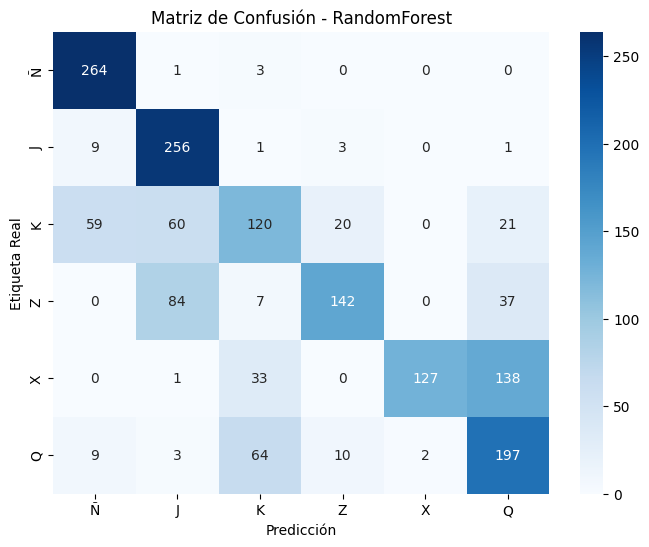


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.63      0.95      0.76       270
           K       0.53      0.43      0.47       280
           Q       0.50      0.69      0.58       285
           X       0.98      0.42      0.59       299
           Z       0.81      0.53      0.64       270
           Ñ       0.77      0.99      0.87       268

    accuracy                           0.66      1672
   macro avg       0.70      0.67      0.65      1672
weighted avg       0.71      0.66      0.65      1672


Entrenando y evaluando GradientBoosting...


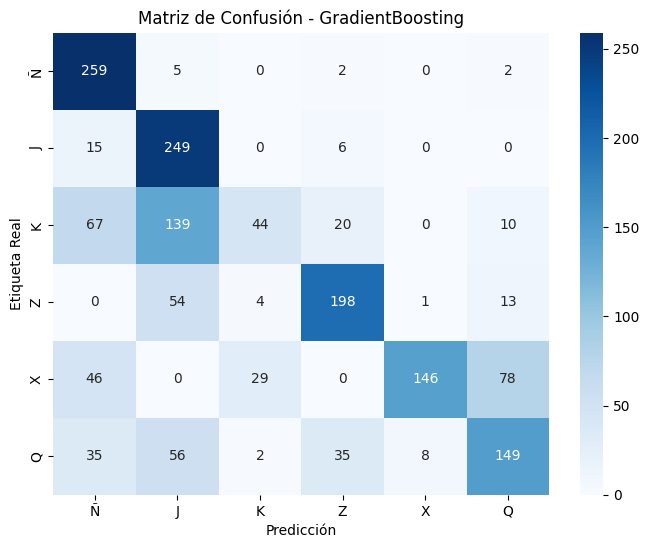


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.50      0.92      0.64       270
           K       0.56      0.16      0.25       280
           Q       0.59      0.52      0.55       285
           X       0.94      0.49      0.64       299
           Z       0.76      0.73      0.75       270
           Ñ       0.61      0.97      0.75       268

    accuracy                           0.62      1672
   macro avg       0.66      0.63      0.60      1672
weighted avg       0.66      0.62      0.60      1672


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


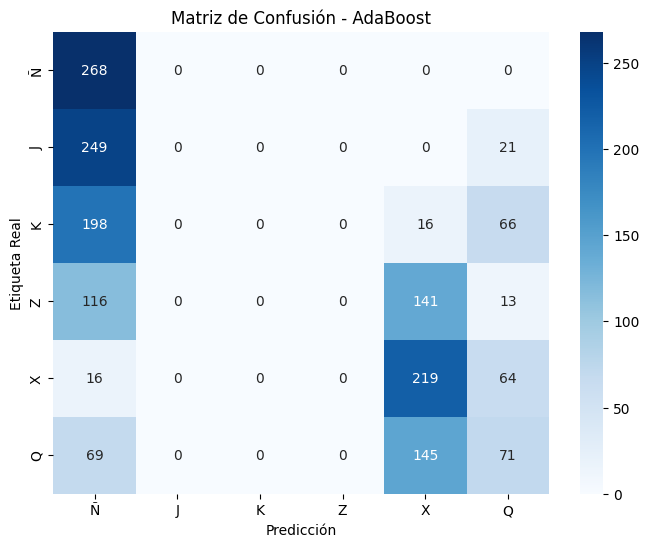


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.00      0.00      0.00       270
           K       0.00      0.00      0.00       280
           Q       0.30      0.25      0.27       285
           X       0.42      0.73      0.53       299
           Z       0.00      0.00      0.00       270
           Ñ       0.29      1.00      0.45       268

    accuracy                           0.33      1672
   macro avg       0.17      0.33      0.21      1672
weighted avg       0.17      0.33      0.21      1672


Entrenando y evaluando KNeighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


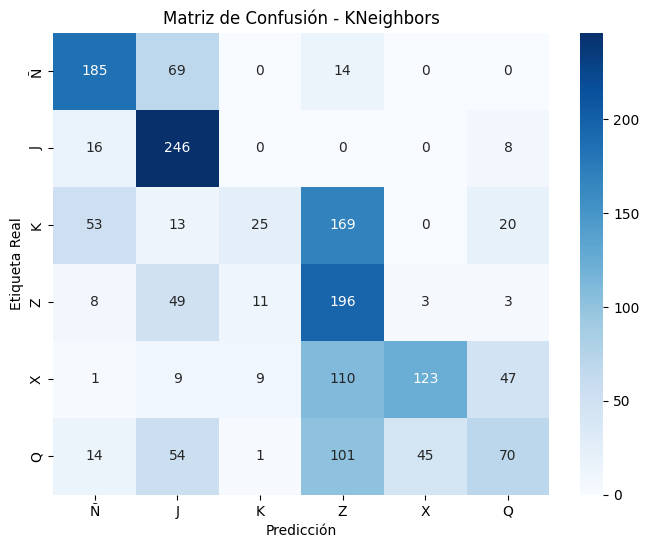


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.56      0.91      0.69       270
           K       0.54      0.09      0.15       280
           Q       0.47      0.25      0.32       285
           X       0.72      0.41      0.52       299
           Z       0.33      0.73      0.46       270
           Ñ       0.67      0.69      0.68       268

    accuracy                           0.51      1672
   macro avg       0.55      0.51      0.47      1672
weighted avg       0.55      0.51      0.47      1672


Entrenando y evaluando LogisticRegression...


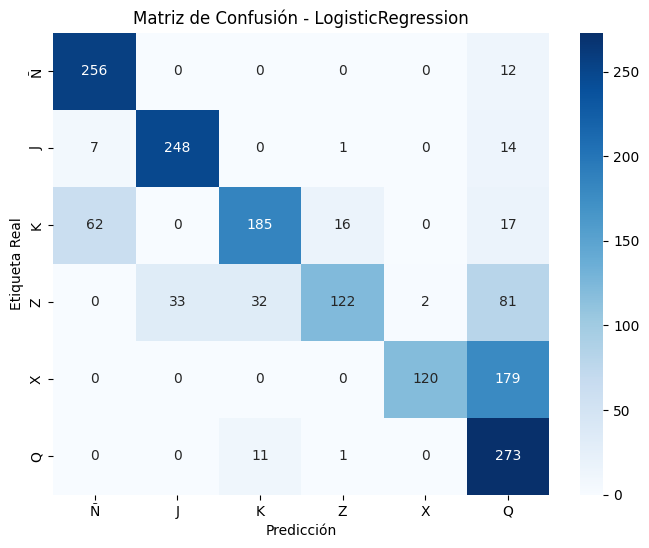


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.88      0.92      0.90       270
           K       0.81      0.66      0.73       280
           Q       0.47      0.96      0.63       285
           X       0.98      0.40      0.57       299
           Z       0.87      0.45      0.60       270
           Ñ       0.79      0.96      0.86       268

    accuracy                           0.72      1672
   macro avg       0.80      0.72      0.72      1672
weighted avg       0.80      0.72      0.71      1672


Entrenando y evaluando DecisionTree...


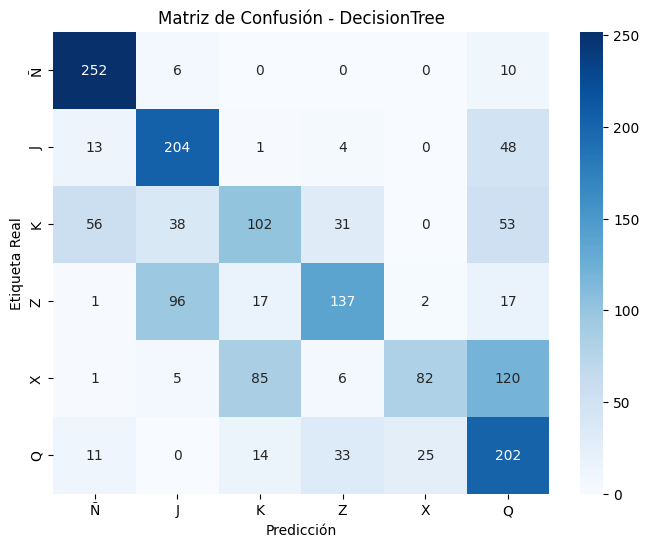


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.58      0.76      0.66       270
           K       0.47      0.36      0.41       280
           Q       0.45      0.71      0.55       285
           X       0.75      0.27      0.40       299
           Z       0.65      0.51      0.57       270
           Ñ       0.75      0.94      0.84       268

    accuracy                           0.59      1672
   macro avg       0.61      0.59      0.57      1672
weighted avg       0.61      0.59      0.57      1672


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.661483  0.648668
1    GradientBoosting  0.625000  0.595452
2            AdaBoost  0.333732  0.214630
3          KNeighbors  0.505383  0.468722
4  LogisticRegression  0.720096  0.711869
5        DecisionTree  0.585526  0.566656


<Figure size 1200x600 with 0 Axes>

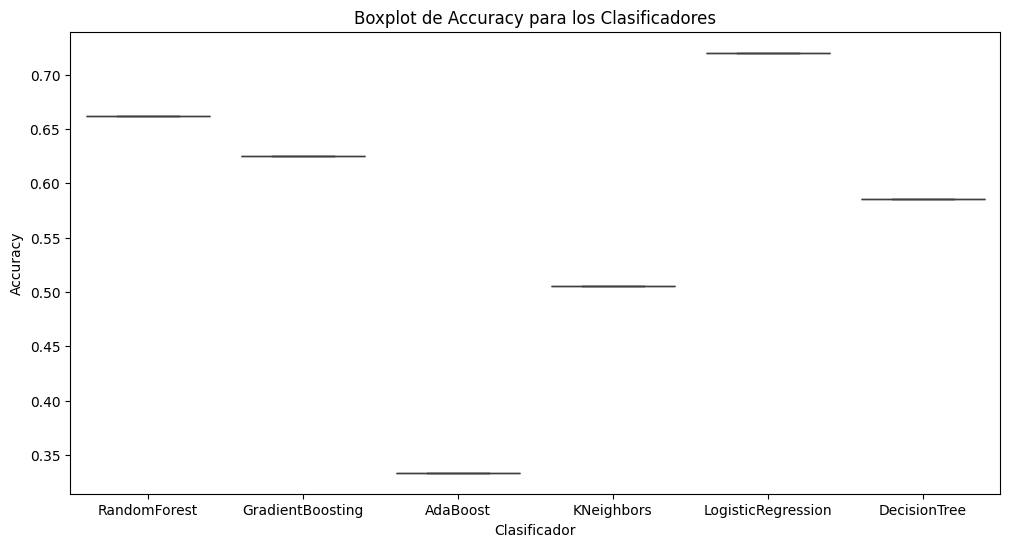

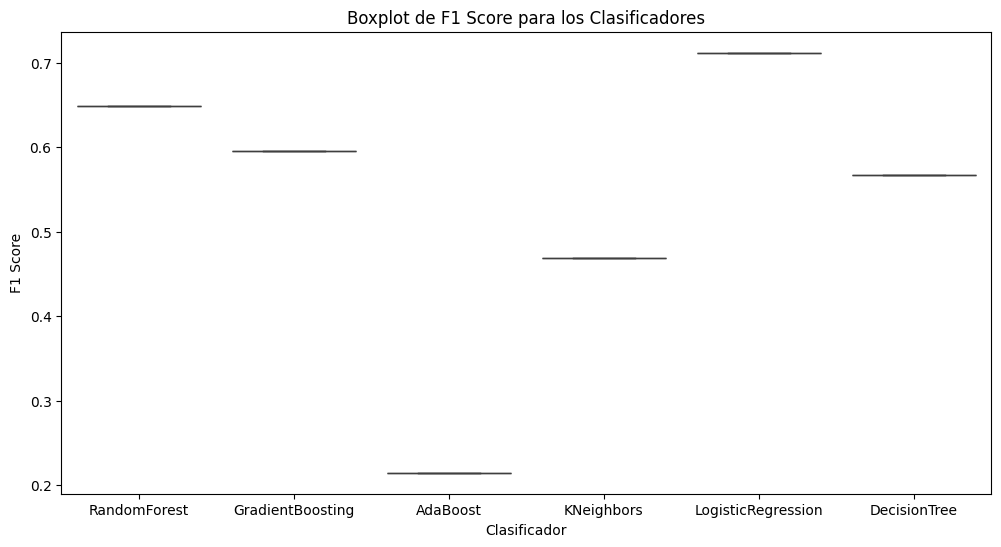

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Frontal']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Boxplot de Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("Boxplot de F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()


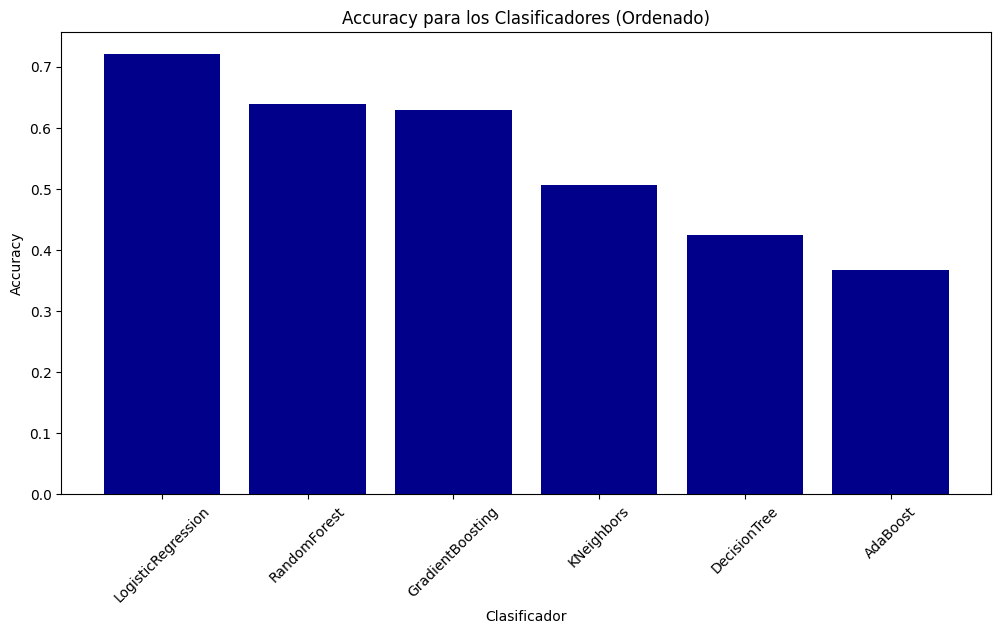

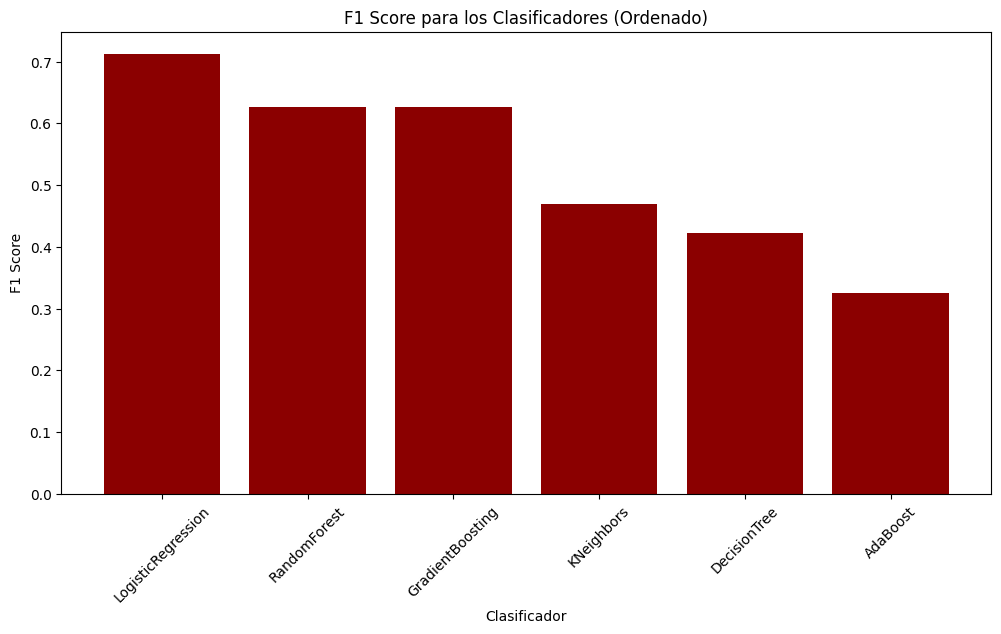

In [ ]:
import matplotlib.pyplot as plt

# Ordenar los clasificadores por Accuracy de mayor a menor
performance_df_sorted_accuracy = performance_df.sort_values(by="Accuracy", ascending=False)

# Gráfico de barras ordenado para Accuracy
plt.figure(figsize=(12, 6))
plt.bar(performance_df_sorted_accuracy['Classifier'], performance_df_sorted_accuracy['Accuracy'], color="darkblue")
plt.title("Accuracy para los Clasificadores (Ordenado)")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Ordenar los clasificadores por F1 Score de mayor a menor
performance_df_sorted_f1 = performance_df.sort_values(by="F1 Score", ascending=False)

# Gráfico de barras ordenado para F1 Score
plt.figure(figsize=(12, 6))
plt.bar(performance_df_sorted_f1['Classifier'], performance_df_sorted_f1['F1 Score'], color="darkred")
plt.title("F1 Score para los Clasificadores (Ordenado)")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()



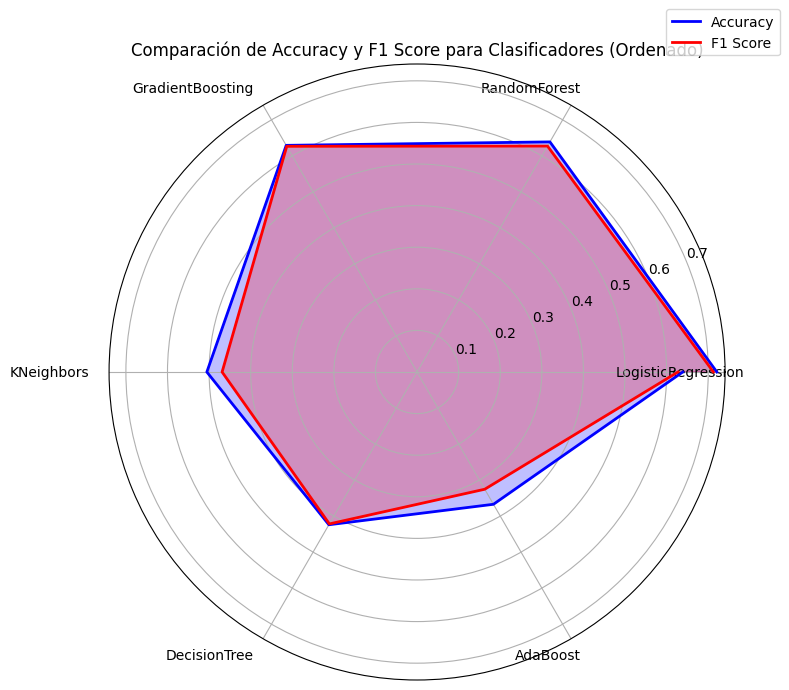

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ordenar los clasificadores por Accuracy de mayor a menor
performance_df_sorted = performance_df.sort_values(by="Accuracy", ascending=False)

# Extraer nombres de clasificadores y métricas ordenadas
classifiers = performance_df_sorted['Classifier']
accuracy = performance_df_sorted['Accuracy']
f1_score = performance_df_sorted['F1 Score']

# Configuración para el gráfico de telaraña
labels = classifiers
num_vars = len(labels)

# Crear el ángulo de cada eje en el gráfico de telaraña
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Extender las listas de métricas para cerrar el gráfico
accuracy = list(accuracy) + [accuracy[0]]
f1_score = list(f1_score) + [f1_score[0]]

# Iniciar el gráfico de telaraña
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar Accuracy
ax.plot(angles, accuracy, color="blue", linewidth=2, linestyle='solid', label="Accuracy")
ax.fill(angles, accuracy, color="blue", alpha=0.25)

# Dibujar F1 Score
ax.plot(angles, f1_score, color="red", linewidth=2, linestyle='solid', label="F1 Score")
ax.fill(angles, f1_score, color="red", alpha=0.25)

# Configuración de etiquetas y leyenda
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.title("Comparación de Accuracy y F1 Score para Clasificadores (Ordenado)")
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.show()


<ipython-input-12-33019c058874>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy = list(accuracy) + [accuracy[0]]
<ipython-input-12-33019c058874>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f1_score = list(f1_score) + [f1_score[0]]


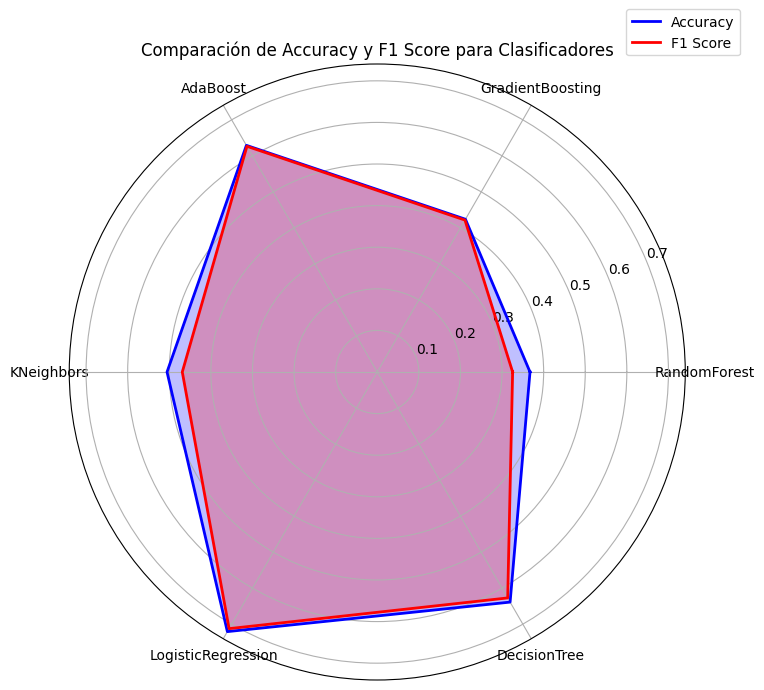

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los nombres de los clasificadores y las métricas
classifiers = performance_df['Classifier'].unique()
accuracy = performance_df.groupby('Classifier')['Accuracy'].mean()
f1_score = performance_df.groupby('Classifier')['F1 Score'].mean()

# Configuración del gráfico de telaraña
labels = classifiers
num_vars = len(labels)

# Crear el ángulo de cada eje en el gráfico de telaraña
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Cerrar el gráfico (volviendo al primer ángulo)
accuracy = list(accuracy) + [accuracy[0]]
f1_score = list(f1_score) + [f1_score[0]]
angles += angles[:1]

# Iniciar el gráfico de telaraña
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar uno por cada métrica
ax.plot(angles, accuracy, color="blue", linewidth=2, linestyle='solid', label="Accuracy")
ax.fill(angles, accuracy, color="blue", alpha=0.25)

ax.plot(angles, f1_score, color="red", linewidth=2, linestyle='solid', label="F1 Score")
ax.fill(angles, f1_score, color="red", alpha=0.25)

# Etiquetas para cada clasificador
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Ajustes de layout y leyenda
plt.title("Comparación de Accuracy y F1 Score para Clasificadores")
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.show()


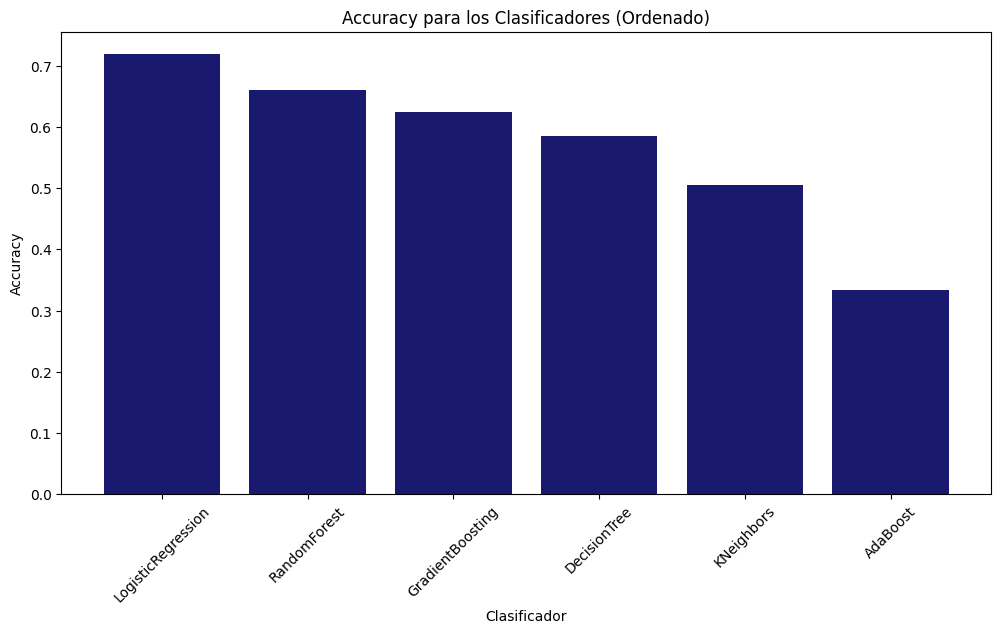

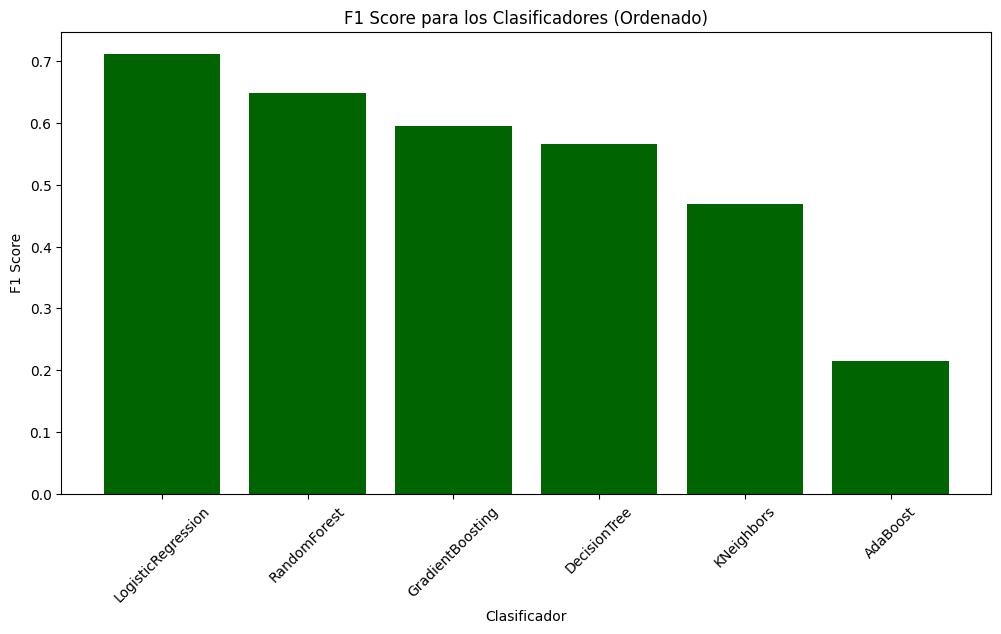

In [ ]:
import matplotlib.pyplot as plt


# Ordenar los clasificadores por Accuracy de mayor a menor
performance_df_sorted_accuracy = performance_df.sort_values(by="Accuracy", ascending=False)

# Gráfico de barras ordenado para Accuracy
plt.figure(figsize=(12, 6))
plt.bar(performance_df_sorted_accuracy['Classifier'], performance_df_sorted_accuracy['Accuracy'], color="midnightblue")
plt.title("Accuracy para los Clasificadores (Ordenado)")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Ordenar los clasificadores por F1 Score de mayor a menor
performance_df_sorted_f1 = performance_df.sort_values(by="F1 Score", ascending=False)

# Gráfico de barras ordenado para F1 Score
plt.figure(figsize=(12, 6))
plt.bar(performance_df_sorted_f1['Classifier'], performance_df_sorted_f1['F1 Score'], color="darkgreen")
plt.title("F1 Score para los Clasificadores (Ordenado)")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()




### **Frontal 30 frames con componentes principales**
Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera frontal de los participantes y aplicando componentes principales

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Varianza explicada por cada componente principal:
Componente 1: 0.7265
Componente 2: 0.1827
Componente 3: 0.0378
Componente 4: 0.0212
Componente 5: 0.0103
Componente 6: 0.0077
Componente 7: 0.0037
Componente 8: 0.0022
Componente 9: 0.0015
Componente 10: 0.0014
Componente 11: 0.0012
Componente 12: 0.0007
Componente 13: 0.0005
Componente 14: 0.0005
Componente 15: 0.0004
Componente 16: 0.0003
Componente 17: 0.0003
Componente 18: 0.0002
Componente 19: 0.0002
Componente 20: 0.0002
Componente 21: 0.0001
Componente 22: 0.0001
Componente 23: 0.0001
Componente 24: 0.0001
Componente 25: 0.0001
Componente 26: 0.0000
Componente 27: 0.0000
Componente 28: 0.0000
Componente 29: 0.0000
Componente 30: 0.0000

Varianza acumulada:
Componente 1: 0.7265
Componente 2: 0.9092
Componente 3: 0.9470
Componente 4: 0.9682
Componente 5: 0.9785
Componente 6: 0.9861
Componente 7: 0.9899
Co

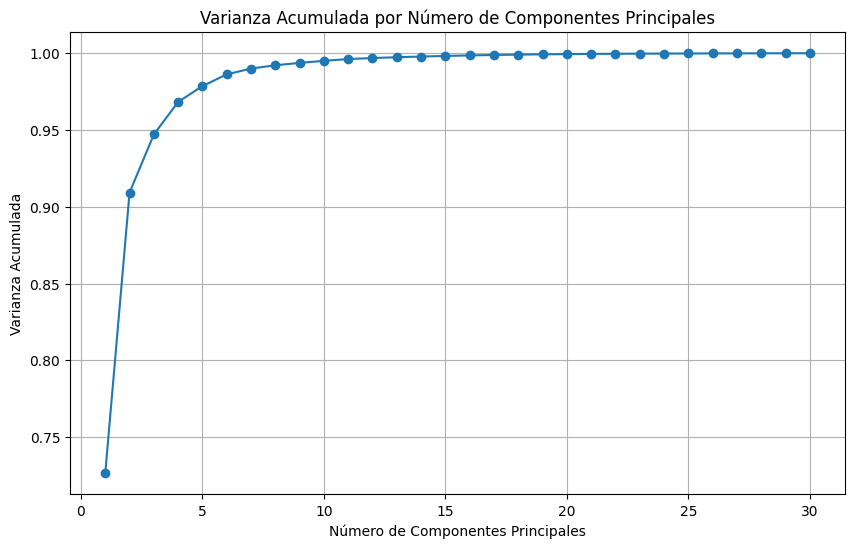

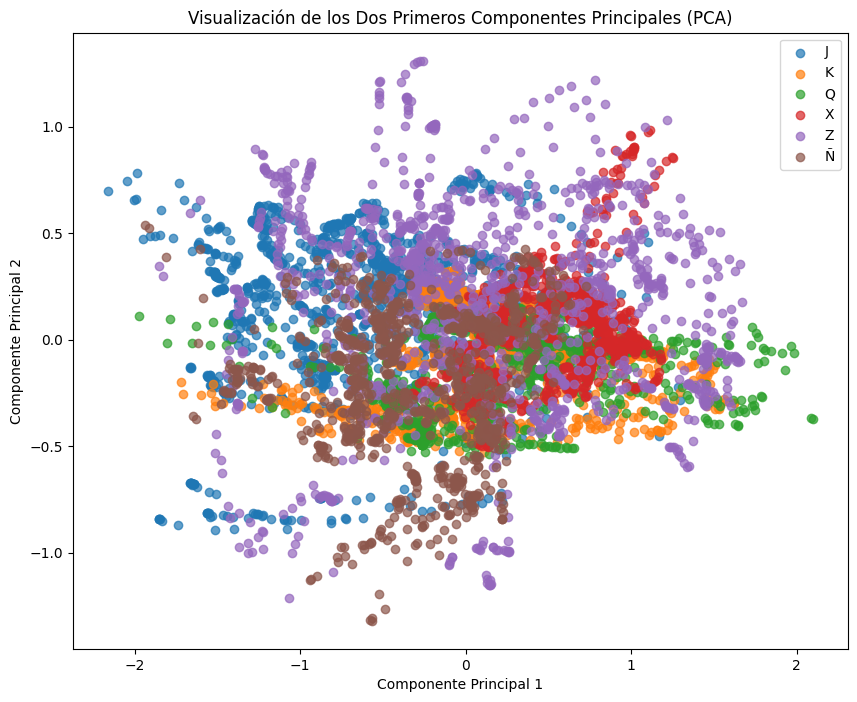


Entrenando y evaluando RandomForest...


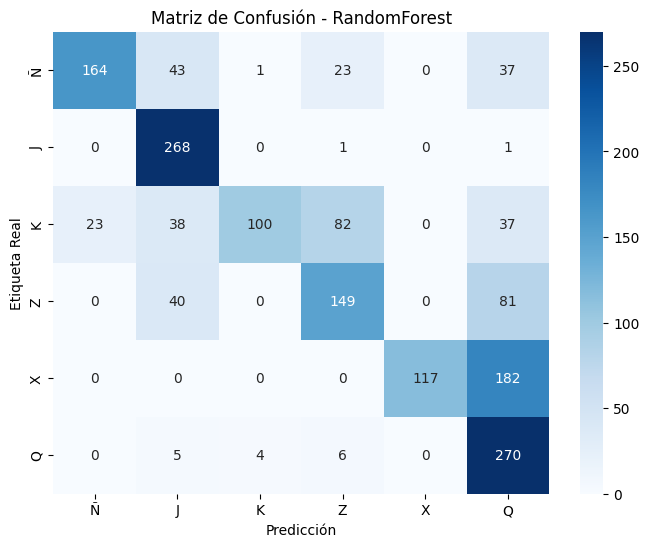


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.68      0.99      0.81       270
           K       0.95      0.36      0.52       280
           Q       0.44      0.95      0.60       285
           X       1.00      0.39      0.56       299
           Z       0.57      0.55      0.56       270
           Ñ       0.88      0.61      0.72       268

    accuracy                           0.64      1672
   macro avg       0.75      0.64      0.63      1672
weighted avg       0.76      0.64      0.63      1672


Entrenando y evaluando GradientBoosting...


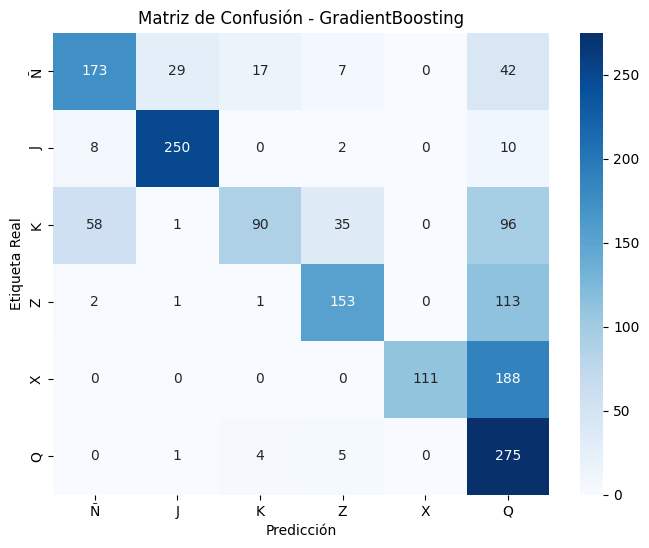


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.89      0.93      0.91       270
           K       0.80      0.32      0.46       280
           Q       0.38      0.96      0.55       285
           X       1.00      0.37      0.54       299
           Z       0.76      0.57      0.65       270
           Ñ       0.72      0.65      0.68       268

    accuracy                           0.63      1672
   macro avg       0.76      0.63      0.63      1672
weighted avg       0.76      0.63      0.63      1672


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


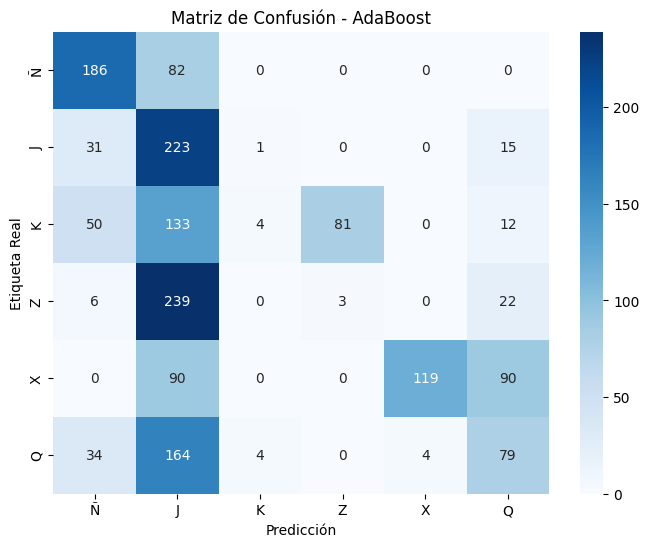


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.24      0.83      0.37       270
           K       0.44      0.01      0.03       280
           Q       0.36      0.28      0.31       285
           X       0.97      0.40      0.56       299
           Z       0.04      0.01      0.02       270
           Ñ       0.61      0.69      0.65       268

    accuracy                           0.37      1672
   macro avg       0.44      0.37      0.32      1672
weighted avg       0.45      0.37      0.33      1672


Entrenando y evaluando KNeighbors...


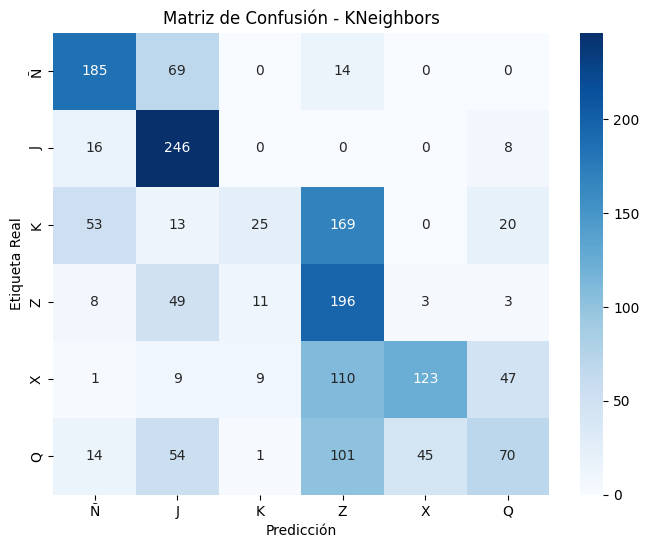


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.56      0.91      0.69       270
           K       0.54      0.09      0.15       280
           Q       0.47      0.25      0.32       285
           X       0.72      0.41      0.52       299
           Z       0.33      0.73      0.46       270
           Ñ       0.67      0.69      0.68       268

    accuracy                           0.51      1672
   macro avg       0.55      0.51      0.47      1672
weighted avg       0.55      0.51      0.47      1672


Entrenando y evaluando LogisticRegression...


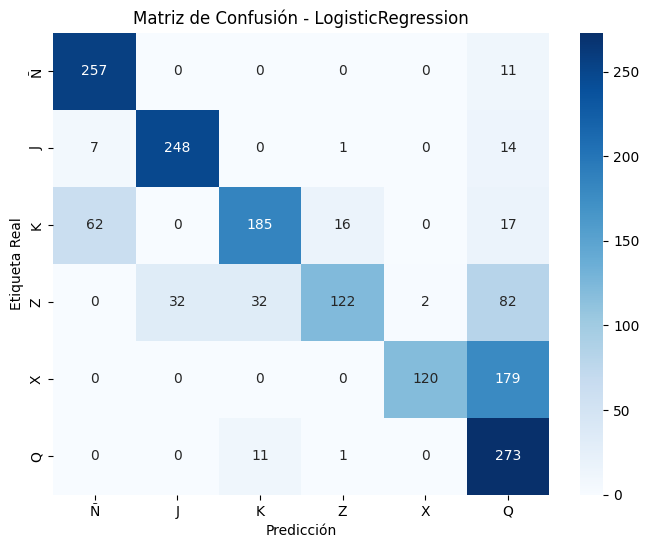


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.89      0.92      0.90       270
           K       0.81      0.66      0.73       280
           Q       0.47      0.96      0.63       285
           X       0.98      0.40      0.57       299
           Z       0.87      0.45      0.60       270
           Ñ       0.79      0.96      0.87       268

    accuracy                           0.72      1672
   macro avg       0.80      0.72      0.72      1672
weighted avg       0.80      0.72      0.71      1672


Entrenando y evaluando DecisionTree...


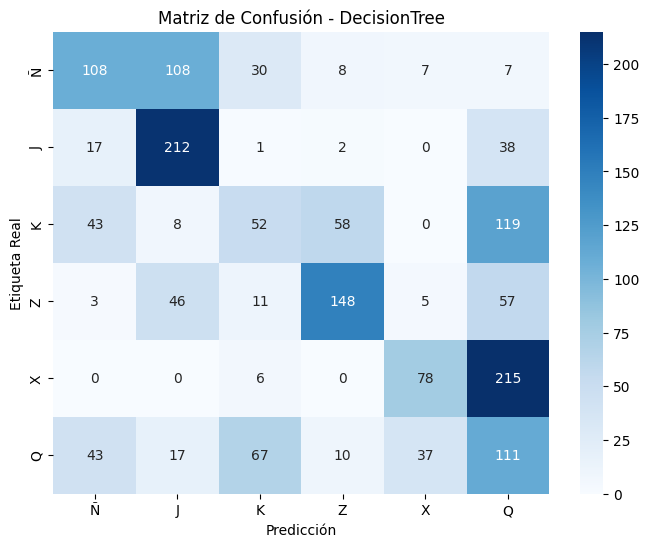


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.54      0.79      0.64       270
           K       0.31      0.19      0.23       280
           Q       0.20      0.39      0.27       285
           X       0.61      0.26      0.37       299
           Z       0.65      0.55      0.60       270
           Ñ       0.50      0.40      0.45       268

    accuracy                           0.42      1672
   macro avg       0.47      0.43      0.43      1672
weighted avg       0.47      0.42      0.42      1672


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.638756  0.627186
1    GradientBoosting  0.629187  0.626558
2            AdaBoost  0.367225  0.325437
3          KNeighbors  0.505383  0.468722
4  LogisticRegression  0.720694  0.712440
5        DecisionTree  0.424043  0.421713


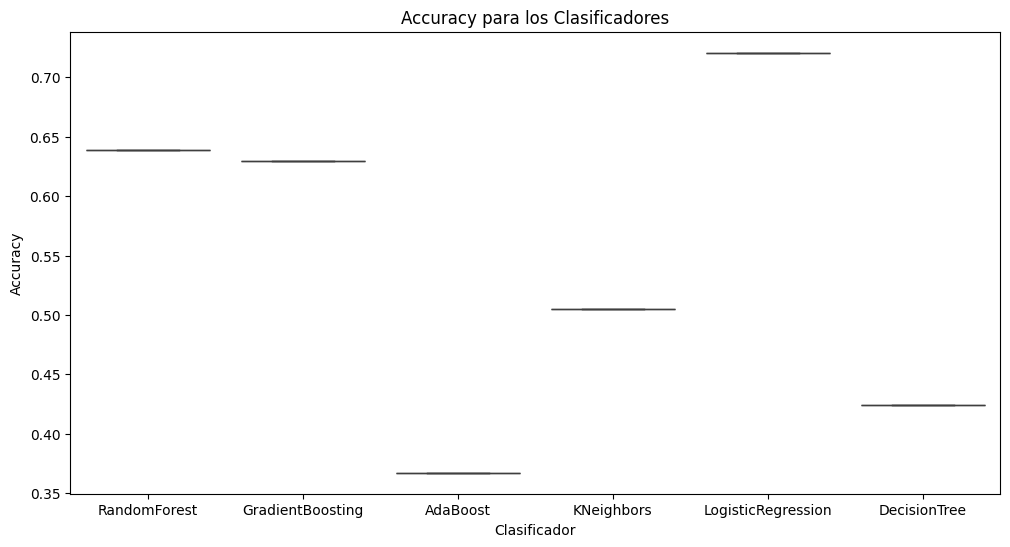

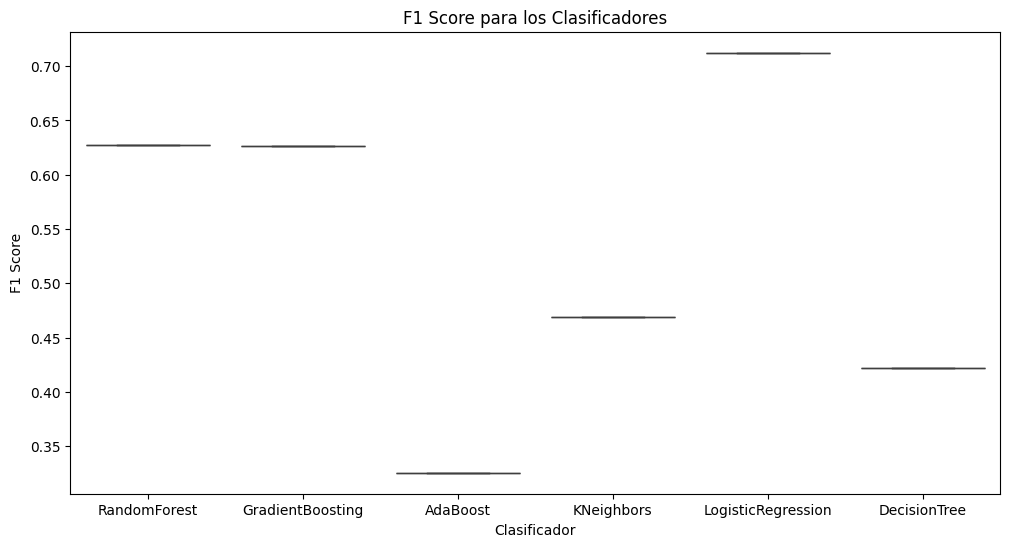

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Frontal']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Aplicar PCA para reducción de dimensionalidad
n_components = 30  # Número de componentes principales deseados para entrenamiento
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Mostrar varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.4f}")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Componente {i}: {cum_var:.4f}")

# Graficar varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes Principales")
plt.grid()
plt.show()

# Visualizar los primeros dos componentes principales
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=label, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de los Dos Primeros Componentes Principales (PCA)")
plt.legend()
plt.show()

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()



En este parte del codigo solo genere algunas imagenes de como identificaba los puntos mediapipe para la presentación y el video.

In [ ]:
import cv2
import mediapipe as mp
import os

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas
DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de imágenes de entrada
OUTPUT_DIR = '/content/drive/MyDrive/mediapipe_output'  # Ruta de salida

# Crear directorio de salida si no existe
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Definir etiquetas y vista
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Frontal']

# Función para procesar y dibujar puntos de MediaPipe en la imagen
def draw_mediapipe_hand(image_path, output_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesar imagen con MediaPipe Hands
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image_rgb)
        if results.multi_hand_landmarks:
            # Dibujar puntos y conexiones en la imagen
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2)
                )
            # Guardar la imagen con los puntos dibujados
            cv2.imwrite(output_path, image)
            print(f"Guardada imagen con MediaPipe en: {output_path}")

# Seleccionar y procesar una imagen por palabra
for view in views:
    for label in labels:
        label_dir = os.path.join(DATA_DIR, view, label)
        if os.path.isdir(label_dir):
            # Seleccionar la primera imagen de la primera subcarpeta
            subfolders = [f for f in os.listdir(label_dir) if os.path.isdir(os.path.join(label_dir, f))]
            if subfolders:
                first_folder = os.path.join(label_dir, subfolders[0])
                first_image = os.listdir(first_folder)[0]
                image_path = os.path.join(first_folder, first_image)

                # Definir la ruta de salida
                output_path = os.path.join(OUTPUT_DIR, f"{label}_mediapipe.png")

                # Dibujar y guardar la imagen
                draw_mediapipe_hand(image_path, output_path)


Guardada imagen con MediaPipe en: /content/drive/MyDrive/mediapipe_output/Ñ_mediapipe.png
Guardada imagen con MediaPipe en: /content/drive/MyDrive/mediapipe_output/J_mediapipe.png
Guardada imagen con MediaPipe en: /content/drive/MyDrive/mediapipe_output/K_mediapipe.png
Guardada imagen con MediaPipe en: /content/drive/MyDrive/mediapipe_output/Z_mediapipe.png
Guardada imagen con MediaPipe en: /content/drive/MyDrive/mediapipe_output/X_mediapipe.png


##**PERFIL RESULTADOS **

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera perfil de los participantes.

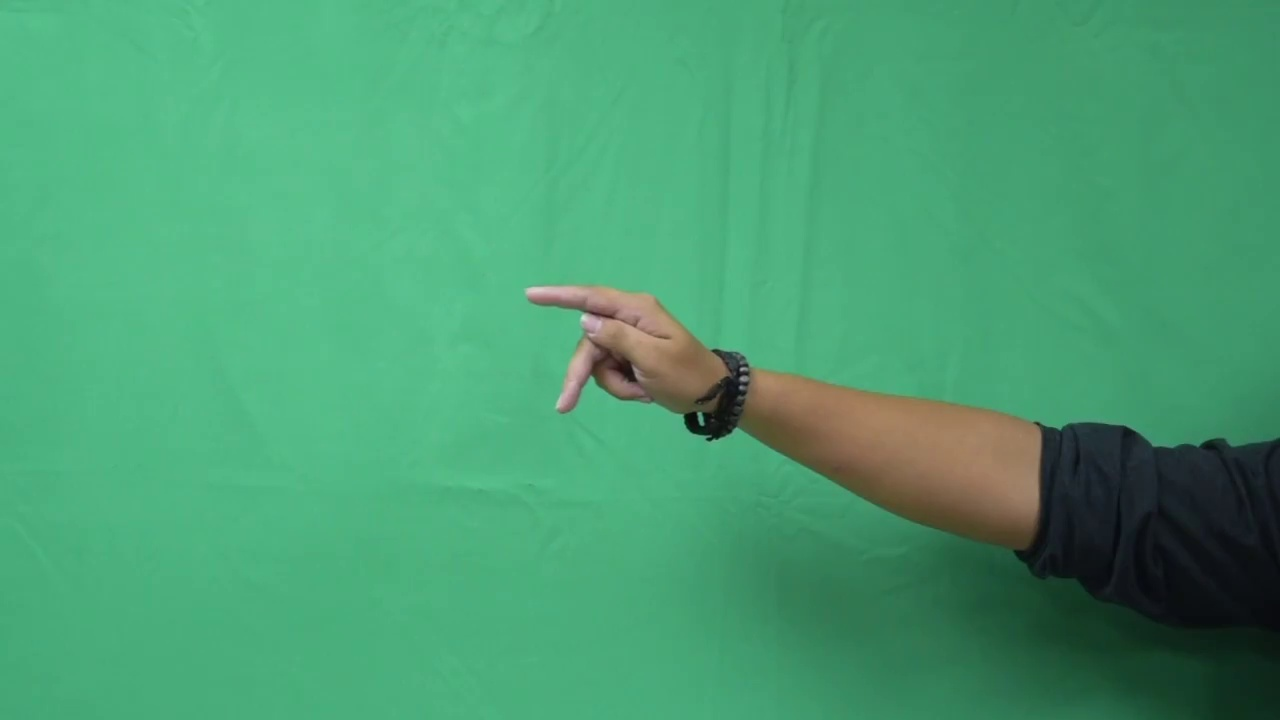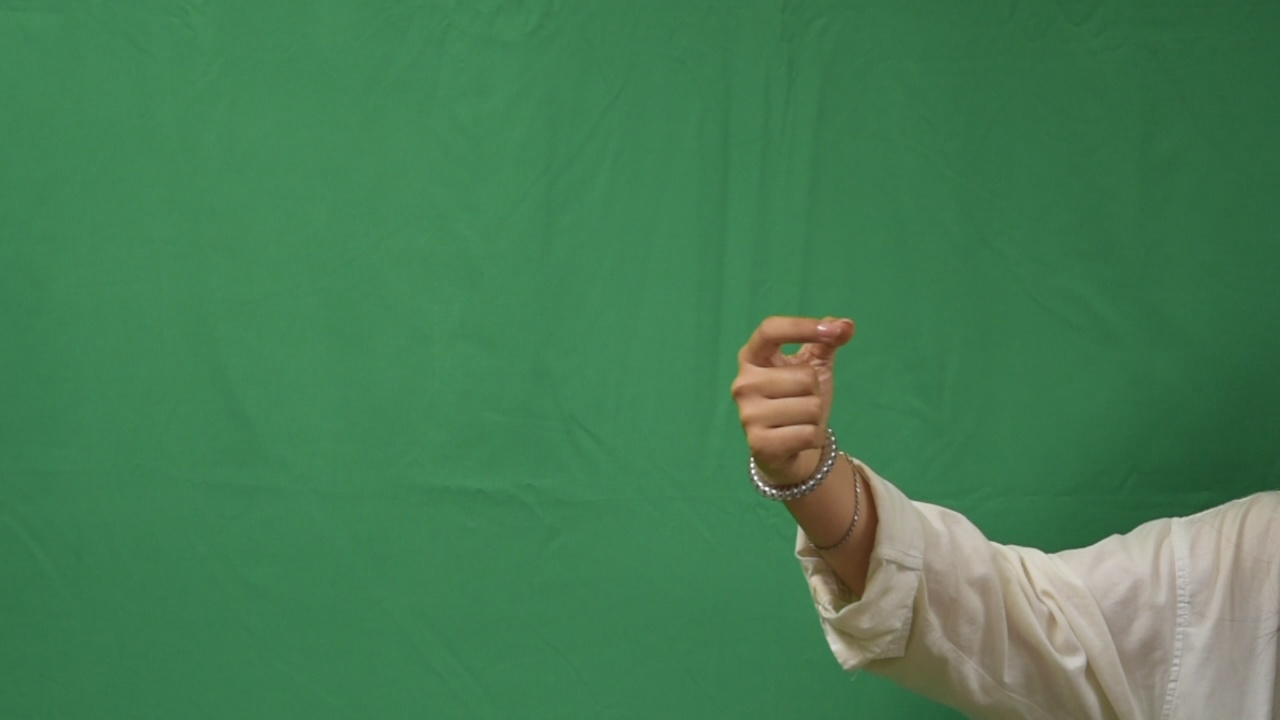

### **Videos de perfil sin componentes principales**

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera perfil de los participantes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Entrenando y evaluando RandomForest...


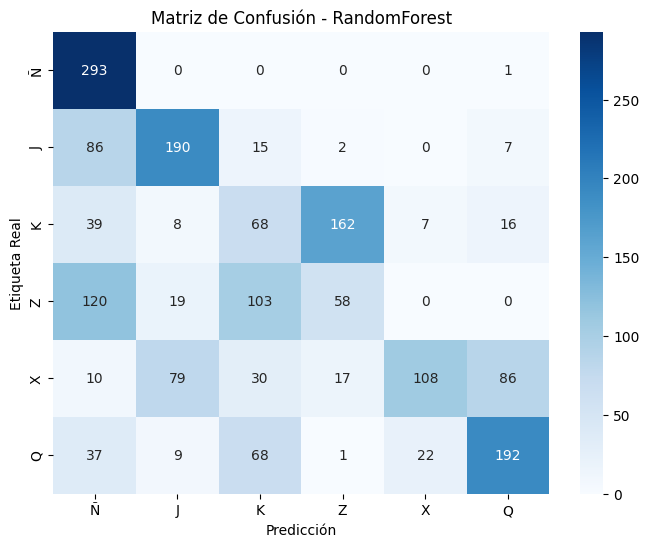


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.62      0.63      0.63       300
           K       0.24      0.23      0.23       300
           Q       0.64      0.58      0.61       329
           X       0.79      0.33      0.46       330
           Z       0.24      0.19      0.21       300
           Ñ       0.50      1.00      0.67       294

    accuracy                           0.49      1853
   macro avg       0.50      0.49      0.47      1853
weighted avg       0.51      0.49      0.47      1853


Entrenando y evaluando GradientBoosting...


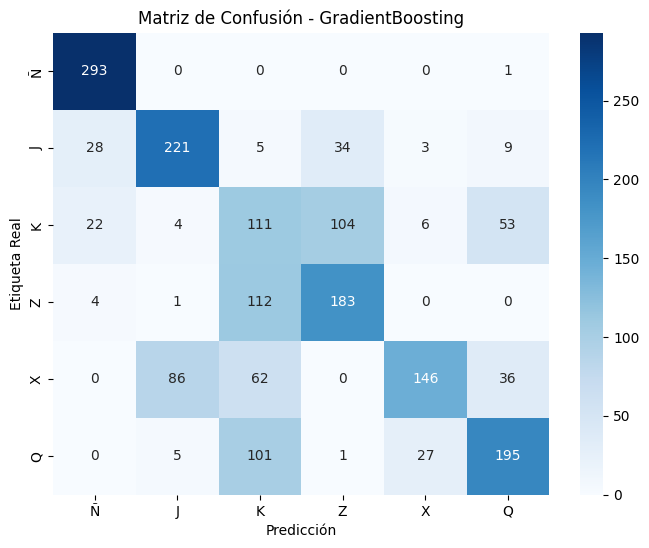


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.70      0.74      0.72       300
           K       0.28      0.37      0.32       300
           Q       0.66      0.59      0.63       329
           X       0.80      0.44      0.57       330
           Z       0.57      0.61      0.59       300
           Ñ       0.84      1.00      0.91       294

    accuracy                           0.62      1853
   macro avg       0.64      0.62      0.62      1853
weighted avg       0.65      0.62      0.62      1853


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


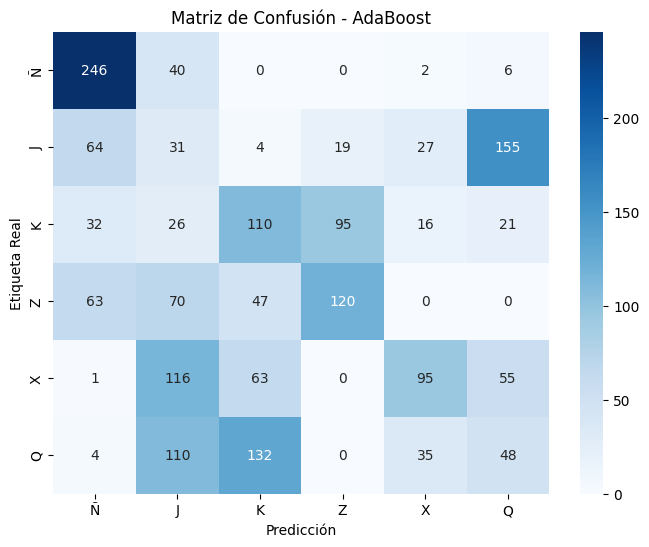


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.08      0.10      0.09       300
           K       0.31      0.37      0.34       300
           Q       0.17      0.15      0.16       329
           X       0.54      0.29      0.38       330
           Z       0.51      0.40      0.45       300
           Ñ       0.60      0.84      0.70       294

    accuracy                           0.35      1853
   macro avg       0.37      0.36      0.35      1853
weighted avg       0.37      0.35      0.35      1853


Entrenando y evaluando KNeighbors...


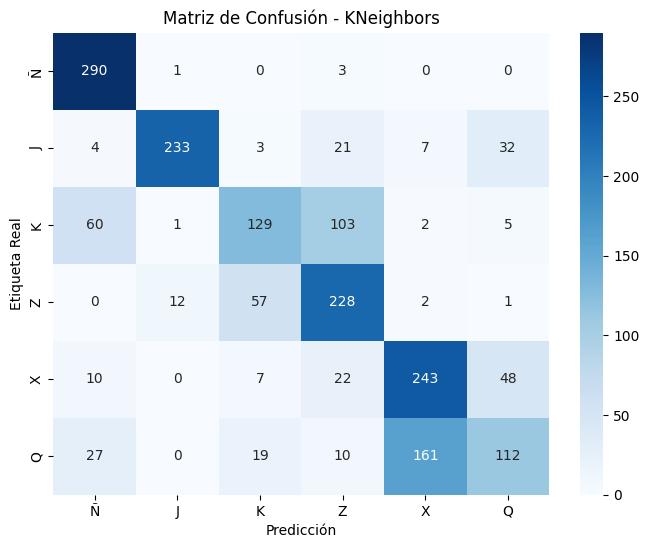


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.94      0.78      0.85       300
           K       0.60      0.43      0.50       300
           Q       0.57      0.34      0.43       329
           X       0.59      0.74      0.65       330
           Z       0.59      0.76      0.66       300
           Ñ       0.74      0.99      0.85       294

    accuracy                           0.67      1853
   macro avg       0.67      0.67      0.66      1853
weighted avg       0.67      0.67      0.65      1853


Entrenando y evaluando LogisticRegression...


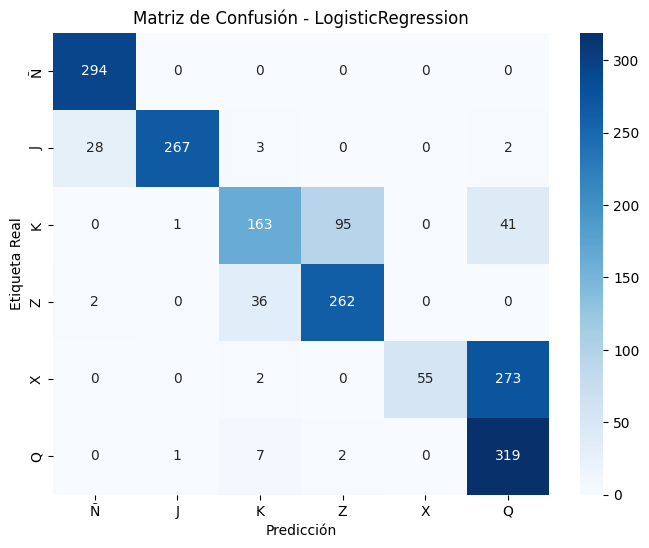


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.99      0.89      0.94       300
           K       0.77      0.54      0.64       300
           Q       0.50      0.97      0.66       329
           X       1.00      0.17      0.29       330
           Z       0.73      0.87      0.80       300
           Ñ       0.91      1.00      0.95       294

    accuracy                           0.73      1853
   macro avg       0.82      0.74      0.71      1853
weighted avg       0.82      0.73      0.70      1853


Entrenando y evaluando DecisionTree...


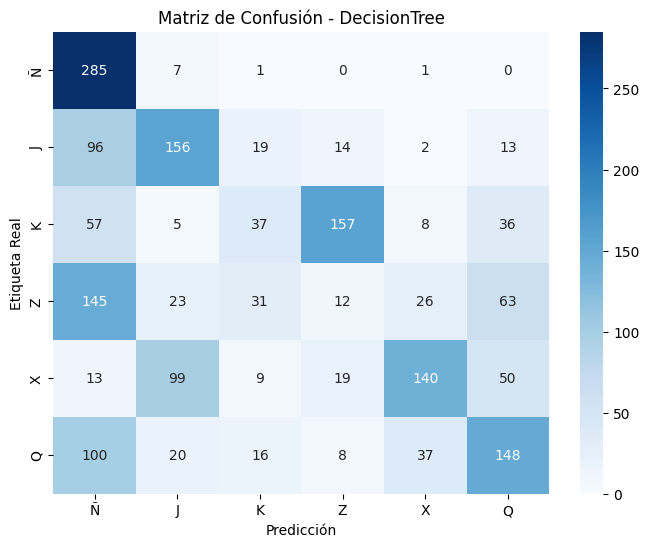


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.50      0.52      0.51       300
           K       0.33      0.12      0.18       300
           Q       0.48      0.45      0.46       329
           X       0.65      0.42      0.51       330
           Z       0.06      0.04      0.05       300
           Ñ       0.41      0.97      0.58       294

    accuracy                           0.42      1853
   macro avg       0.40      0.42      0.38      1853
weighted avg       0.41      0.42      0.38      1853


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.490556  0.470365
1    GradientBoosting  0.620076  0.621021
2            AdaBoost  0.350783  0.347191
3          KNeighbors  0.666487  0.652479
4  LogisticRegression  0.733945  0.703310
5        DecisionTree  0.419860  0.384695


<Figure size 1200x600 with 0 Axes>

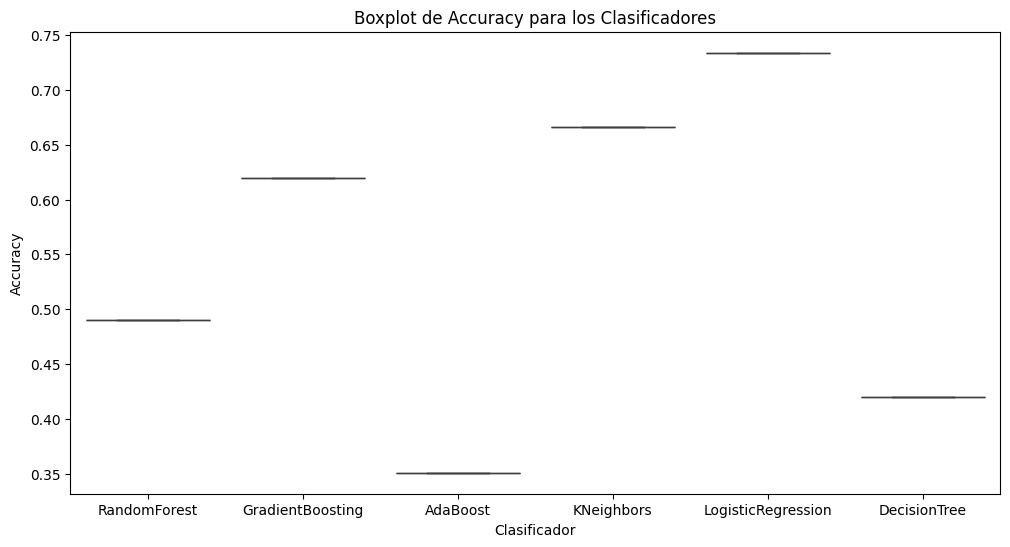

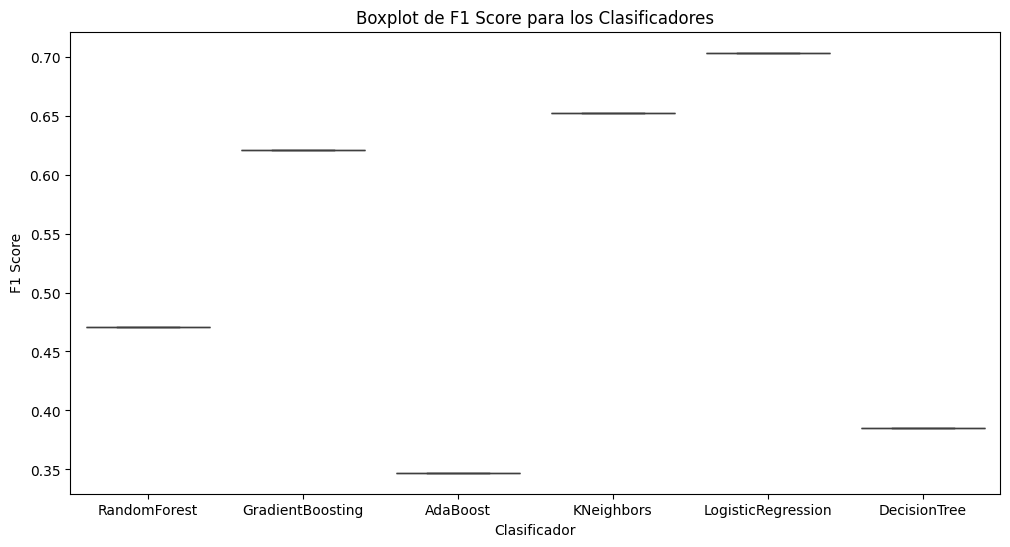

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Perfil']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Boxplot de Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("Boxplot de F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()


<ipython-input-8-65e6a1c8ceb0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df_sorted_accuracy, x="Accuracy", y="Classifier", palette="viridis")


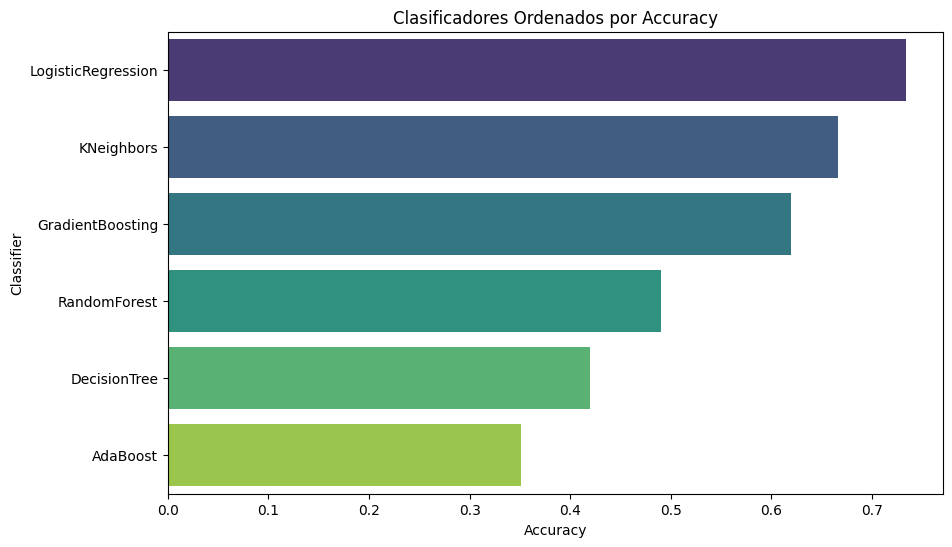

<ipython-input-8-65e6a1c8ceb0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df_sorted_f1, x="F1 Score", y="Classifier", palette="viridis")


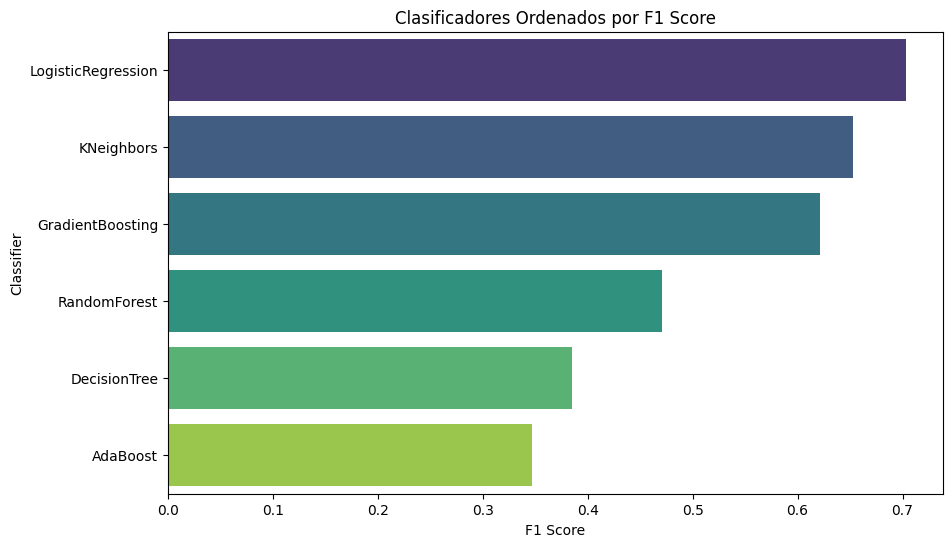

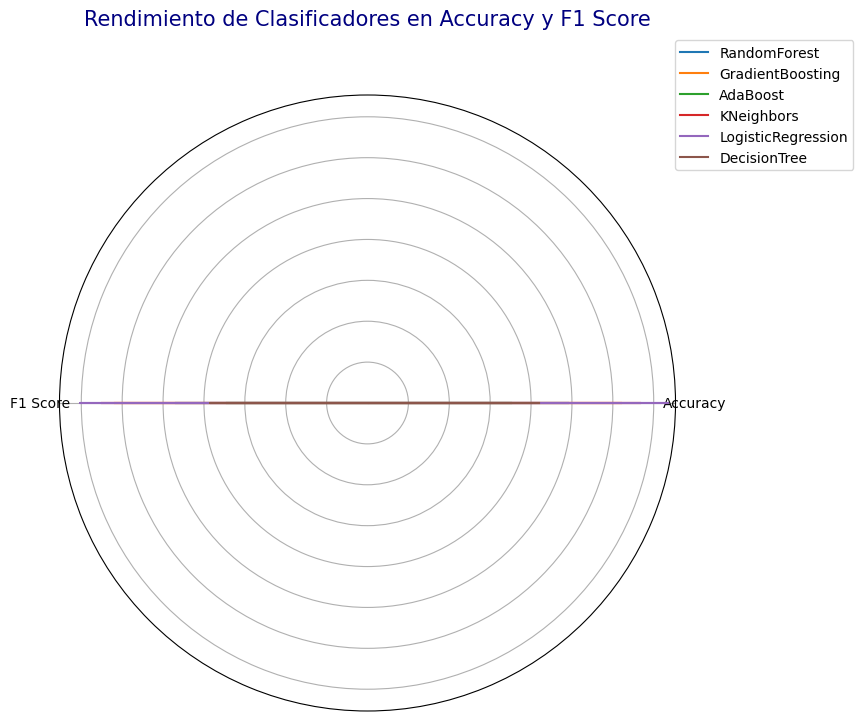

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Ordenar el DataFrame por Accuracy y F1 Score para gráficos de barras
performance_df_sorted_accuracy = performance_df.sort_values(by="Accuracy", ascending=False)
performance_df_sorted_f1 = performance_df.sort_values(by="F1 Score", ascending=False)

# Gráfico de barras ordenado para Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df_sorted_accuracy, x="Accuracy", y="Classifier", palette="viridis")
plt.title("Clasificadores Ordenados por Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.show()

# Gráfico de barras ordenado para F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df_sorted_f1, x="F1 Score", y="Classifier", palette="viridis")
plt.title("Clasificadores Ordenados por F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Classifier")
plt.show()

# Gráfico de telaraña (Radar) para Accuracy y F1 Score

# Preparar los datos para el gráfico de telaraña
labels = performance_df["Classifier"].values
metrics = ["Accuracy", "F1 Score"]
num_vars = len(metrics)

# Configurar los ángulos para cada métrica en el gráfico de telaraña
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Inicializar el gráfico de telaraña
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar una línea y rellenar el área para cada clasificador
for i, row in performance_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Classifier"])
    ax.fill(angles, values, alpha=0.25)

# Configurar las etiquetas de los ejes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticklabels([])
ax.set_title("Rendimiento de Clasificadores en Accuracy y F1 Score", size=15, color="navy", y=1.1)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()


## **Perfil Componentes** **principales**

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera perfil de los participantes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Varianza explicada por cada componente principal:
Componente 1: 0.5800
Componente 2: 0.3382
Componente 3: 0.0354
Componente 4: 0.0172
Componente 5: 0.0101
Componente 6: 0.0083
Componente 7: 0.0029
Componente 8: 0.0023
Componente 9: 0.0012
Componente 10: 0.0010
Componente 11: 0.0007
Componente 12: 0.0006
Componente 13: 0.0004
Componente 14: 0.0003
Componente 15: 0.0002
Componente 16: 0.0002
Componente 17: 0.0002
Componente 18: 0.0001
Componente 19: 0.0001
Componente 20: 0.0001
Componente 21: 0.0001
Componente 22: 0.0001
Componente 23: 0.0001
Componente 24: 0.0000
Componente 25: 0.0000
Componente 26: 0.0000
Componente 27: 0.0000
Componente 28: 0.0000
Componente 29: 0.0000
Componente 30: 0.0000

Varianza acumulada:
Componente 1: 0.5800
Componente 2: 0.9182
Componente 3: 0.9536
Componente 4: 0.9708
Componente 5: 0.9809
Componente 6: 0.9891
Componente 7: 0.9920
Co

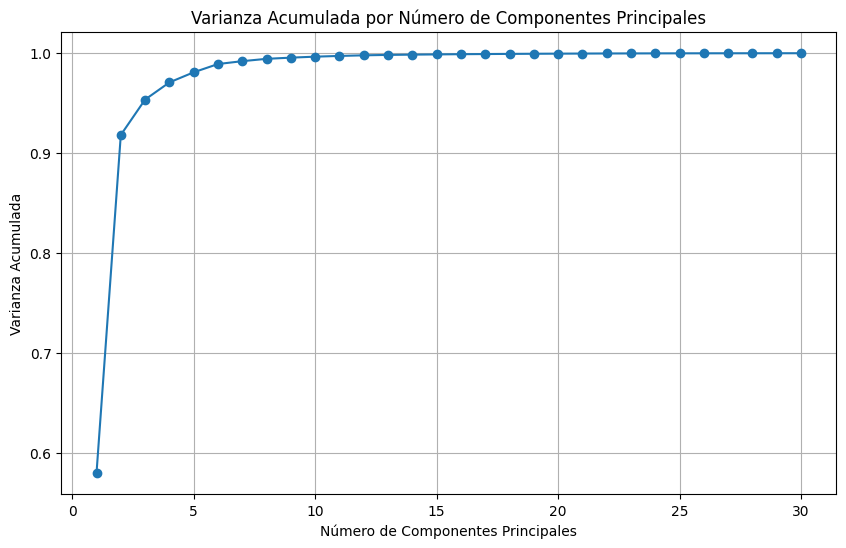

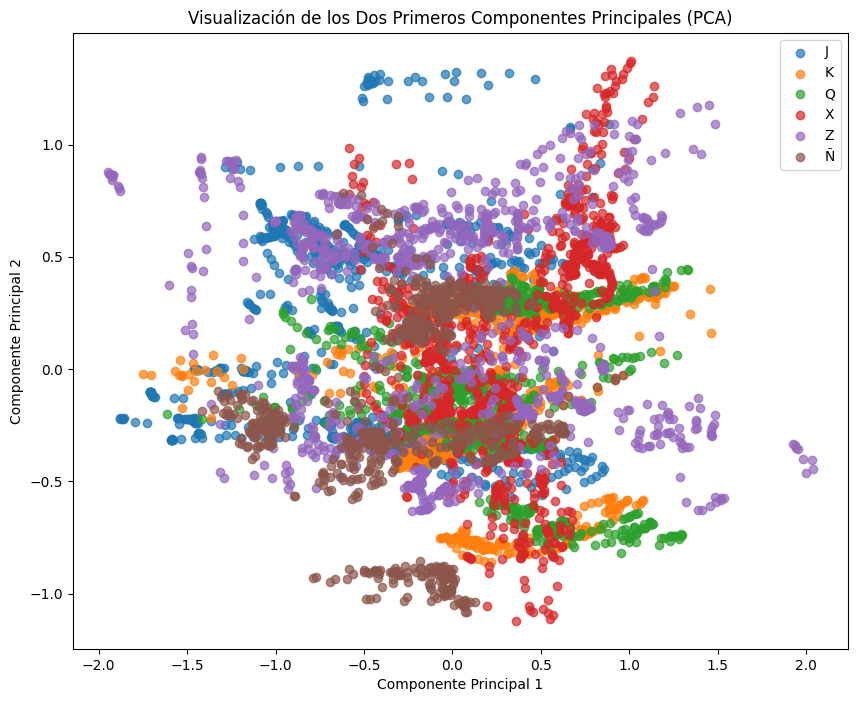


Entrenando y evaluando RandomForest...


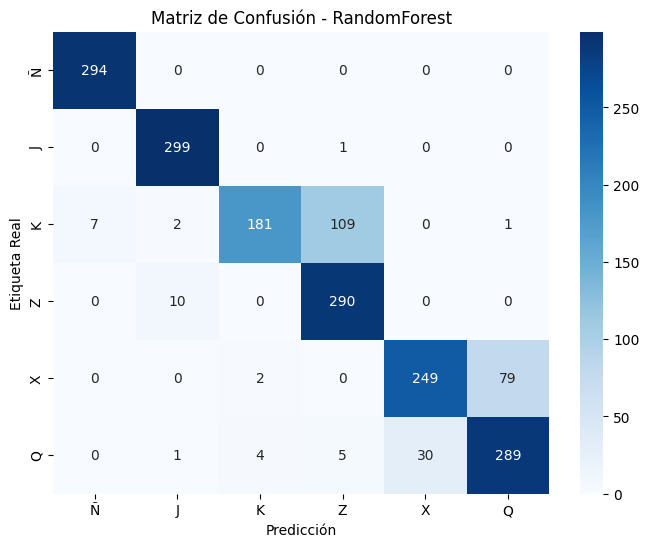


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.96      1.00      0.98       300
           K       0.97      0.60      0.74       300
           Q       0.78      0.88      0.83       329
           X       0.89      0.75      0.82       330
           Z       0.72      0.97      0.82       300
           Ñ       0.98      1.00      0.99       294

    accuracy                           0.86      1853
   macro avg       0.88      0.87      0.86      1853
weighted avg       0.88      0.86      0.86      1853


Entrenando y evaluando GradientBoosting...


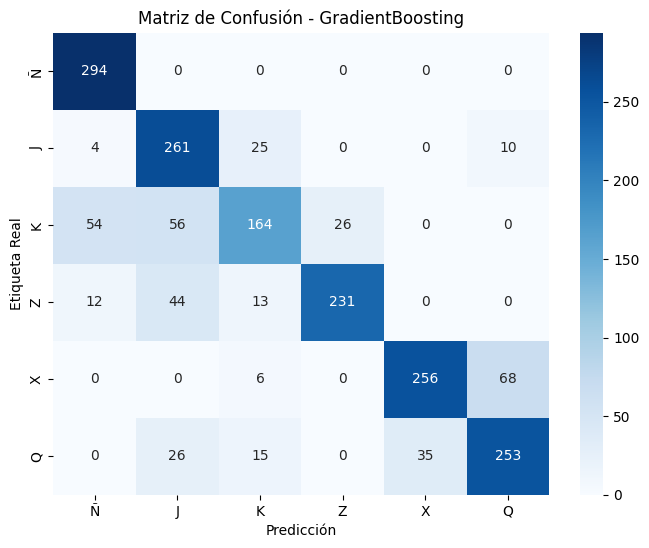


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.67      0.87      0.76       300
           K       0.74      0.55      0.63       300
           Q       0.76      0.77      0.77       329
           X       0.88      0.78      0.82       330
           Z       0.90      0.77      0.83       300
           Ñ       0.81      1.00      0.89       294

    accuracy                           0.79      1853
   macro avg       0.79      0.79      0.78      1853
weighted avg       0.79      0.79      0.78      1853


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


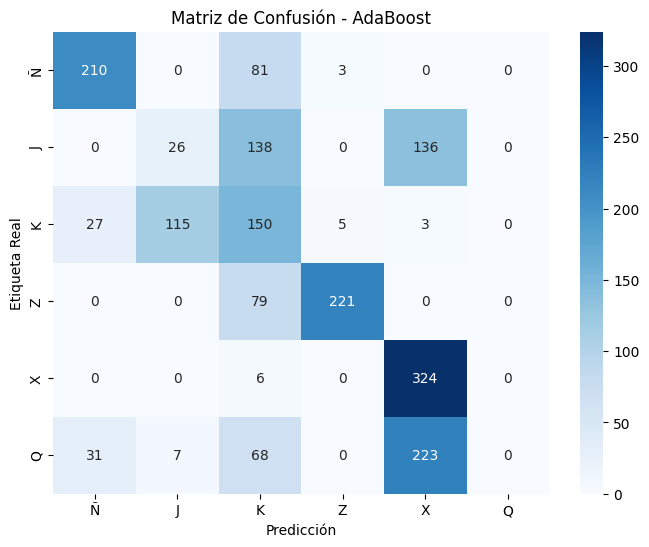


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.18      0.09      0.12       300
           K       0.29      0.50      0.36       300
           Q       0.00      0.00      0.00       329
           X       0.47      0.98      0.64       330
           Z       0.97      0.74      0.84       300
           Ñ       0.78      0.71      0.75       294

    accuracy                           0.50      1853
   macro avg       0.45      0.50      0.45      1853
weighted avg       0.44      0.50      0.45      1853


Entrenando y evaluando KNeighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


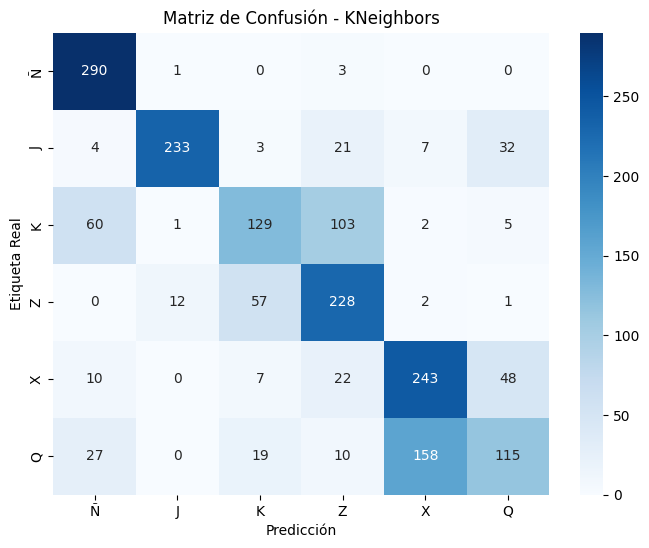


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.94      0.78      0.85       300
           K       0.60      0.43      0.50       300
           Q       0.57      0.35      0.43       329
           X       0.59      0.74      0.65       330
           Z       0.59      0.76      0.66       300
           Ñ       0.74      0.99      0.85       294

    accuracy                           0.67      1853
   macro avg       0.67      0.67      0.66      1853
weighted avg       0.67      0.67      0.65      1853


Entrenando y evaluando LogisticRegression...


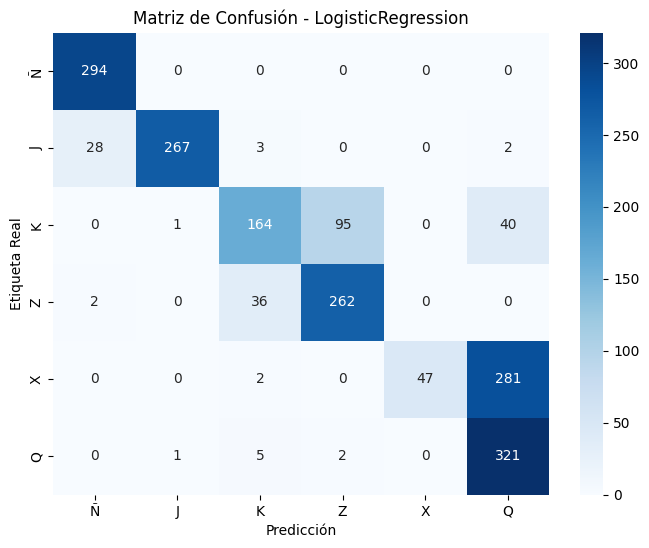


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.99      0.89      0.94       300
           K       0.78      0.55      0.64       300
           Q       0.50      0.98      0.66       329
           X       1.00      0.14      0.25       330
           Z       0.73      0.87      0.80       300
           Ñ       0.91      1.00      0.95       294

    accuracy                           0.73      1853
   macro avg       0.82      0.74      0.71      1853
weighted avg       0.82      0.73      0.70      1853


Entrenando y evaluando DecisionTree...


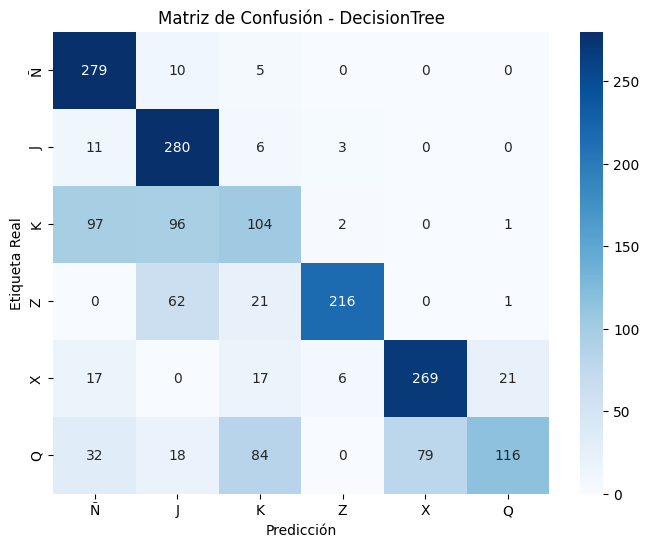


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.60      0.93      0.73       300
           K       0.44      0.35      0.39       300
           Q       0.83      0.35      0.50       329
           X       0.77      0.82      0.79       330
           Z       0.95      0.72      0.82       300
           Ñ       0.64      0.95      0.76       294

    accuracy                           0.68      1853
   macro avg       0.71      0.69      0.67      1853
weighted avg       0.71      0.68      0.66      1853


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.864544  0.861185
1    GradientBoosting  0.787372  0.783573
2            AdaBoost  0.502428  0.445310
3          KNeighbors  0.668106  0.654532
4  LogisticRegression  0.731247  0.697312
5        DecisionTree  0.682137  0.664395


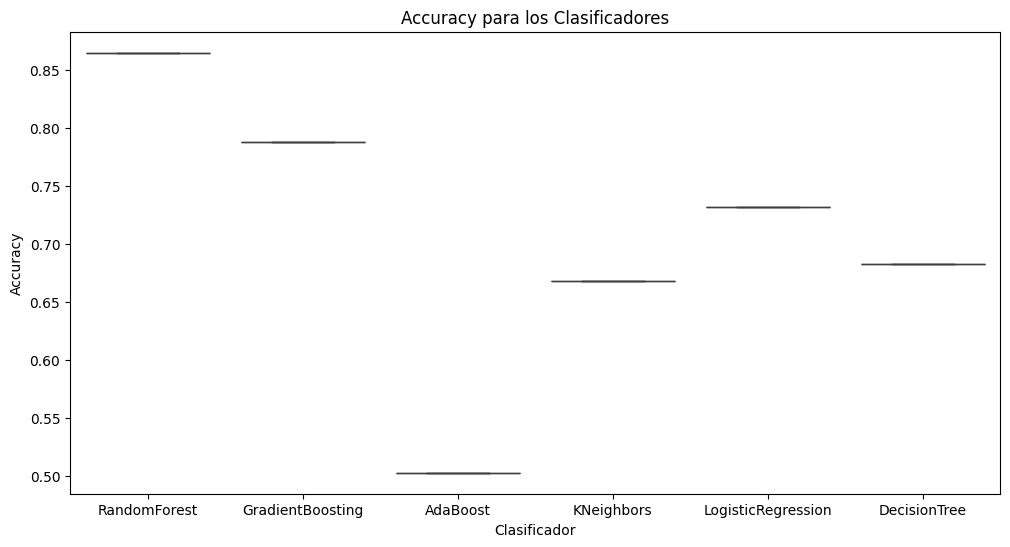

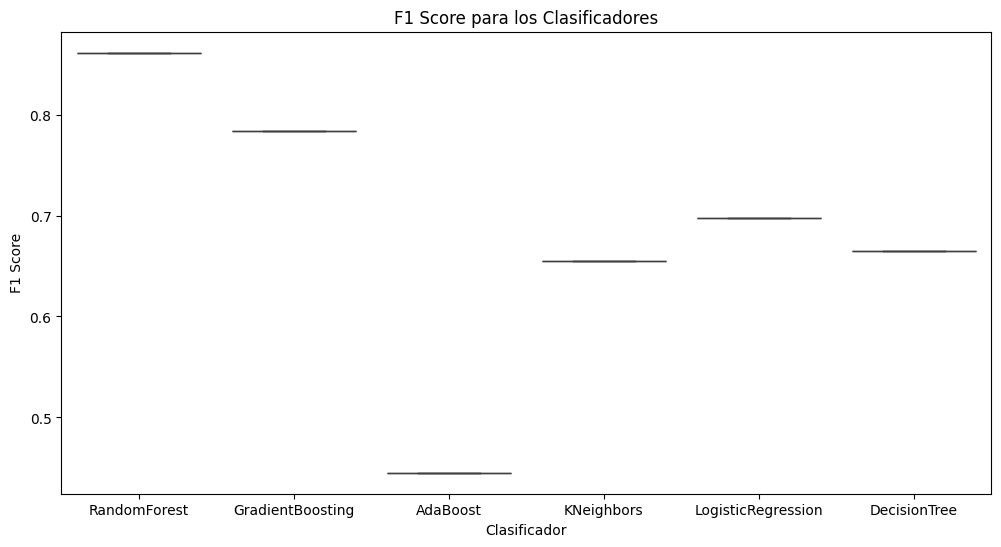

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Perfil']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Aplicar PCA para reducción de dimensionalidad
n_components = 30  # Número de componentes principales deseados para entrenamiento
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Mostrar varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.4f}")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Componente {i}: {cum_var:.4f}")

# Graficar varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes Principales")
plt.grid()
plt.show()

# Visualizar los primeros dos componentes principales
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=label, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de los Dos Primeros Componentes Principales (PCA)")
plt.legend()
plt.show()

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()


Esta parte del notebook es para asegurar la correcta dirección de las carpetas y el contenido dentro de estas.

In [ ]:
import os

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames60'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Perfil60']

# Función para verificar una estructura de directorios
def verify_directory_structure(base_dir, views, labels):
    all_exists = True
    for view in views:
        for label in labels:
            label_dir = os.path.join(base_dir, view, label)
            if os.path.isdir(label_dir):
                print(f"✓ Directorio encontrado: {label_dir}")
                # Verificar subcarpetas dentro de cada etiqueta
                subfolders = os.listdir(label_dir)
                if not subfolders:
                    print(f"✗ No se encontraron subcarpetas en: {label_dir}")
                    all_exists = False
                else:
                    for subfolder in subfolders:
                        subfolder_path = os.path.join(label_dir, subfolder)
                        if os.path.isdir(subfolder_path):
                            print(f"  ✓ Subcarpeta encontrada: {subfolder_path}")
                        else:
                            print(f"  ✗ No es una subcarpeta válida: {subfolder_path}")
                            all_exists = False
            else:
                print(f"✗ Directorio no encontrado: {label_dir}")
                all_exists = False
    return all_exists

# Verificar estructura en el directorio de entrenamiento
print("Verificando estructura de directorios en TRAIN_DATA_DIR:")
train_structure_correct = verify_directory_structure(TRAIN_DATA_DIR, views, labels)

# Verificar estructura en el directorio de prueba
print("\nVerificando estructura de directorios en TEST_DATA_DIR:")
test_structure_correct = verify_directory_structure(TEST_DATA_DIR, views, labels)

# Resultado final
if train_structure_correct and test_structure_correct:
    print("\nLa estructura de directorios es correcta en ambas carpetas.")
else:
    print("\nHay problemas en la estructura de directorios. Revisa los mensajes anteriores.")


Verificando estructura de directorios en TRAIN_DATA_DIR:
✓ Directorio encontrado: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S8-Ñ-lateral-1
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S8-Ñ-lateral-2
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S8-Ñ-lateral-3
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S8-Ñ-lateral-4
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S8-Ñ-lateral-5
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S9-K-perfil-2
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S9-Ñ-perfil-1
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S9-Ñ-perfil-2
  ✓ Subcarpeta encontrada: /content/drive/MyDrive/selected_frames60/Perfil60/Ñ/S9-Ñ-perfil-3
  ✓ Subcarpeta e

In [ ]:
import os

# Ruta base en Google Drive
BASE_DIR = '/content/drive/MyDrive/frames/Perfil'  # Cambia esto si tu carpeta 'frames' está en otro lugar

# Función para mostrar la estructura de directorios y archivos
def list_directory_structure(base_dir, level=0):
    if not os.path.exists(base_dir):
        print(f"La ruta '{base_dir}' no existe.")
        return

    for item in os.listdir(base_dir):
        item_path = os.path.join(base_dir, item)
        print("    " * level + f"- {item}")

        # Si el elemento es una carpeta, hacemos una llamada recursiva para listar su contenido
        if os.path.isdir(item_path):
            list_directory_structure(item_path, level + 1)

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Listar estructura de la carpeta 'frames'
print(f"Estructura de la carpeta '{BASE_DIR}':")
list_directory_structure(BASE_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Estructura de la carpeta '/content/drive/MyDrive/frames/Perfil':
- J
    - S7-J-perfil-1
        - frame_51.jpg
        - frame_60.jpg
        - frame_12.jpg
        - frame_1.jpg
        - frame_33.jpg
        - frame_20.jpg
        - frame_58.jpg
        - frame_24.jpg
        - frame_7.jpg
        - frame_34.jpg
        - frame_25.jpg
        - frame_15.jpg
        - frame_56.jpg
        - frame_62.jpg
        - frame_52.jpg
        - frame_10.jpg
        - frame_37.jpg
        - frame_3.jpg
        - frame_11.jpg
        - frame_2.jpg
        - frame_14.jpg
        - frame_43.jpg
        - frame_53.jpg
        - frame_54.jpg
        - frame_39.jpg
        - frame_18.jpg
        - frame_64.jpg
        - frame_42.jpg
        - frame_31.jpg
        - frame_63.jpg
    - S7-J-perfil-2
        - frame_8.jpg
        - frame_4.jpg
        - frame_27.jpg
        -

### **Extracción a 60 frames**



In [ ]:
import os
import random
import shutil

# Ruta principal de los frames organizados por vista y letra
frames_folder = '/content/drive/My Drive/frames_SignalLanguage/'

# Carpeta de salida para almacenar los frames seleccionados
selected_frames_folder = '/content/drive/My Drive/selected_frames60'
os.makedirs(selected_frames_folder, exist_ok=True)

# Para cada vista en "perfil" y "frontal"
for view in ['Perfil', 'Frontal']:
    view_path = os.path.join(frames_folder, view)
    view_output = os.path.join(selected_frames_folder, view)
    os.makedirs(view_output, exist_ok=True)

    # Para cada letra dentro de la vista
    for letter in os.listdir(view_path):
        letter_path = os.path.join(view_path, letter)
        letter_output = os.path.join(view_output, letter)
        os.makedirs(letter_output, exist_ok=True)

        # Recorremos cada subcarpeta de videos dentro de la carpeta de la letra actual
        for video_folder in os.listdir(letter_path):
            video_path = os.path.join(letter_path, video_folder)

            # Verificamos que sea una carpeta y contenga frames
            if os.path.isdir(video_path):
                frames = [f for f in os.listdir(video_path) if f.endswith('.jpg')]

                # Seleccionamos aleatoriamente hasta 60 frames, o todos si hay menos de 60
                selected_frames = random.sample(frames, min(60, len(frames)))

                # Crear carpeta para el video dentro de la salida
                video_output = os.path.join(letter_output, video_folder)
                os.makedirs(video_output, exist_ok=True)

                # Copiar los frames seleccionados a la carpeta de salida correspondiente
                for frame in selected_frames:
                    src_path = os.path.join(video_path, frame)
                    dst_path = os.path.join(video_output, frame)
                    shutil.copy(src_path, dst_path)

                print(f"Letra {letter}, Vista {view}, Video {video_folder}: seleccionados {len(selected_frames)} frames")

Letra J, Vista Perfil, Video S8-J-lateral-1: seleccionados 60 frames
Letra J, Vista Perfil, Video S8-J-lateral-2: seleccionados 60 frames
Letra J, Vista Perfil, Video S8-J-lateral-3: seleccionados 60 frames
Letra J, Vista Perfil, Video S8-J-lateral-4: seleccionados 60 frames
Letra J, Vista Perfil, Video S8-J-lateral-5: seleccionados 60 frames
Letra J, Vista Perfil, Video S9-J-perfil-1: seleccionados 60 frames
Letra J, Vista Perfil, Video S9-J-perfil-2: seleccionados 60 frames
Letra J, Vista Perfil, Video S9-J-perfil-3: seleccionados 60 frames
Letra J, Vista Perfil, Video S9-J-perfil-4: seleccionados 60 frames
Letra J, Vista Perfil, Video S9-J-perfil-5: seleccionados 60 frames
Letra J, Vista Perfil, Video S7-J-perfil-1: seleccionados 60 frames
Letra J, Vista Perfil, Video S7-J-perfil-2: seleccionados 60 frames
Letra J, Vista Perfil, Video S7-J-perfil-3: seleccionados 60 frames
Letra J, Vista Perfil, Video S7-J-perfil-4: seleccionados 60 frames
Letra J, Vista Perfil, Video S7-J-perfil-5:

### **Clasificación datos de perfil a 60 frames**

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 60 frames de manera frontal de los participantes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Entrenando y evaluando RandomForest...


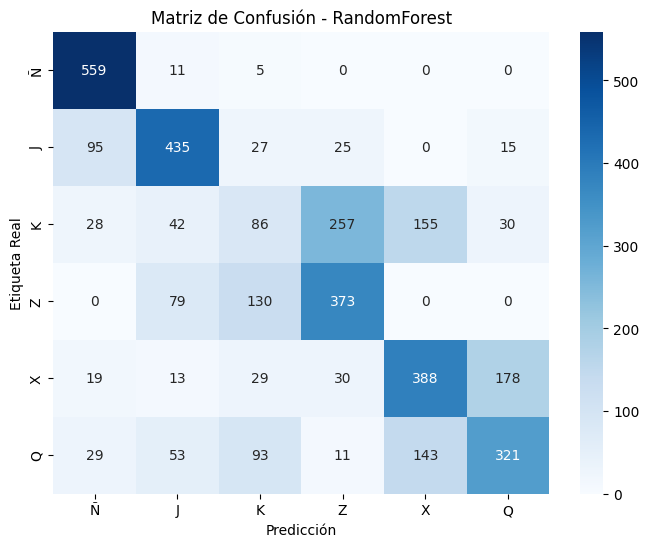


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.69      0.73      0.71       597
           K       0.23      0.14      0.18       598
           Q       0.59      0.49      0.54       650
           X       0.57      0.59      0.58       657
           Z       0.54      0.64      0.58       582
           Ñ       0.77      0.97      0.86       575

    accuracy                           0.59      3659
   macro avg       0.56      0.59      0.57      3659
weighted avg       0.56      0.59      0.57      3659


Entrenando y evaluando GradientBoosting...


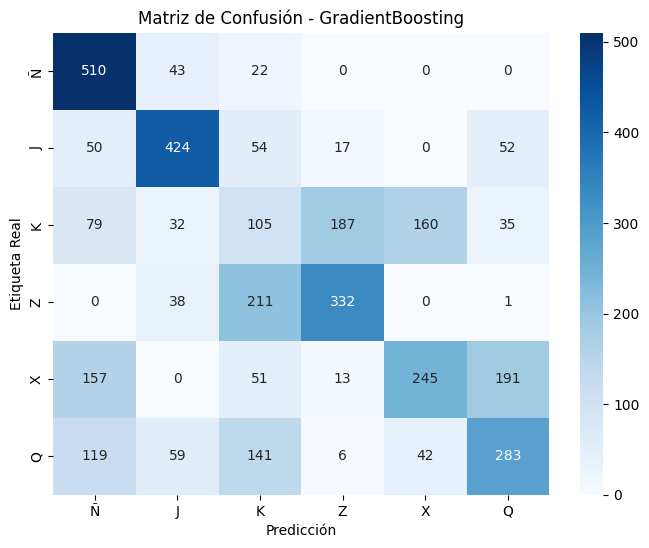


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.71      0.71      0.71       597
           K       0.18      0.18      0.18       598
           Q       0.50      0.44      0.47       650
           X       0.55      0.37      0.44       657
           Z       0.60      0.57      0.58       582
           Ñ       0.56      0.89      0.68       575

    accuracy                           0.52      3659
   macro avg       0.52      0.53      0.51      3659
weighted avg       0.52      0.52      0.51      3659


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

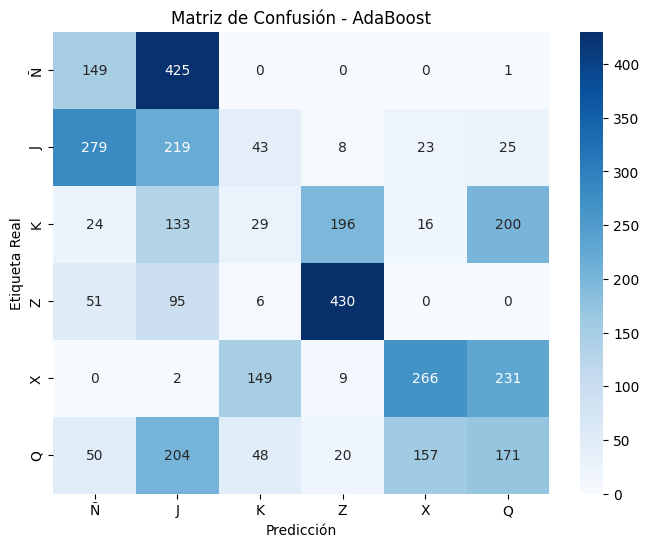


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.20      0.37      0.26       597
           K       0.11      0.05      0.07       598
           Q       0.27      0.26      0.27       650
           X       0.58      0.40      0.48       657
           Z       0.65      0.74      0.69       582
           Ñ       0.27      0.26      0.26       575

    accuracy                           0.35      3659
   macro avg       0.35      0.35      0.34      3659
weighted avg       0.35      0.35      0.34      3659


Entrenando y evaluando KNeighbors...


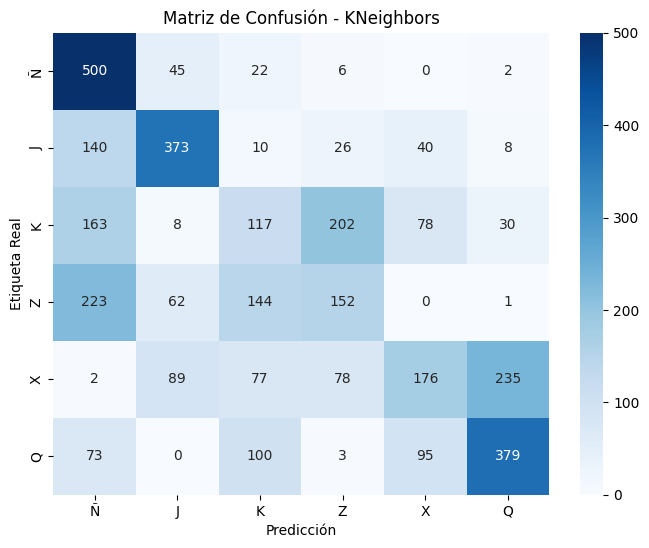


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.65      0.62      0.64       597
           K       0.25      0.20      0.22       598
           Q       0.58      0.58      0.58       650
           X       0.45      0.27      0.34       657
           Z       0.33      0.26      0.29       582
           Ñ       0.45      0.87      0.60       575

    accuracy                           0.46      3659
   macro avg       0.45      0.47      0.44      3659
weighted avg       0.45      0.46      0.44      3659


Entrenando y evaluando LogisticRegression...


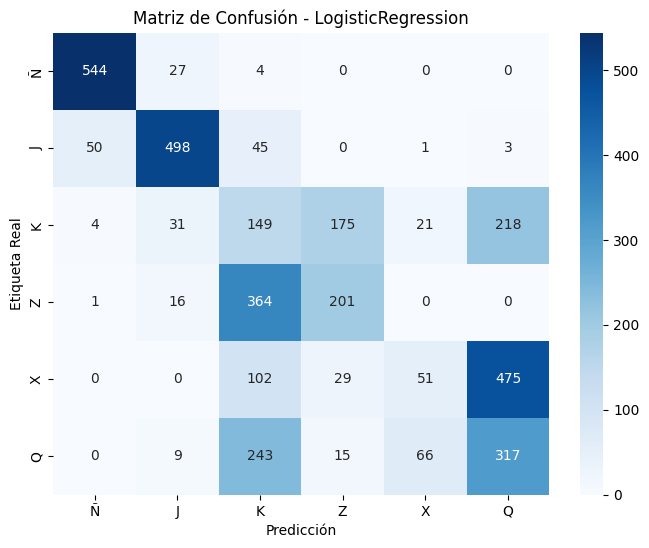


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.86      0.83      0.85       597
           K       0.16      0.25      0.20       598
           Q       0.31      0.49      0.38       650
           X       0.37      0.08      0.13       657
           Z       0.48      0.35      0.40       582
           Ñ       0.91      0.95      0.93       575

    accuracy                           0.48      3659
   macro avg       0.51      0.49      0.48      3659
weighted avg       0.51      0.48      0.47      3659


Entrenando y evaluando DecisionTree...


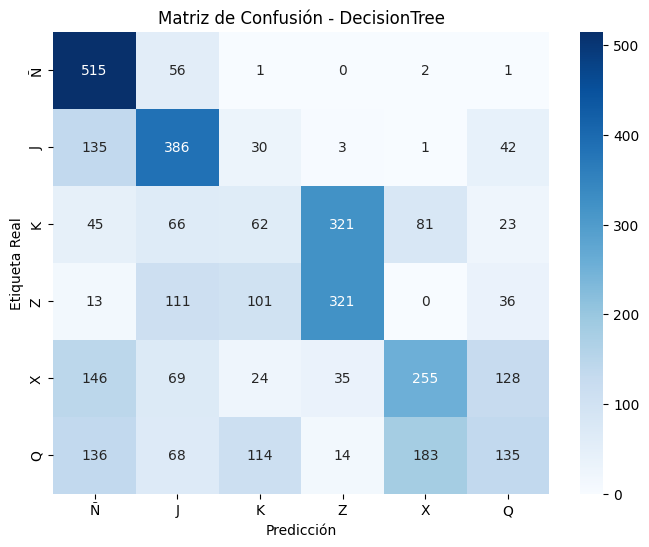


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.51      0.65      0.57       597
           K       0.19      0.10      0.13       598
           Q       0.37      0.21      0.27       650
           X       0.49      0.39      0.43       657
           Z       0.46      0.55      0.50       582
           Ñ       0.52      0.90      0.66       575

    accuracy                           0.46      3659
   macro avg       0.42      0.47      0.43      3659
weighted avg       0.42      0.46      0.42      3659


Entrenando y evaluando SVM...


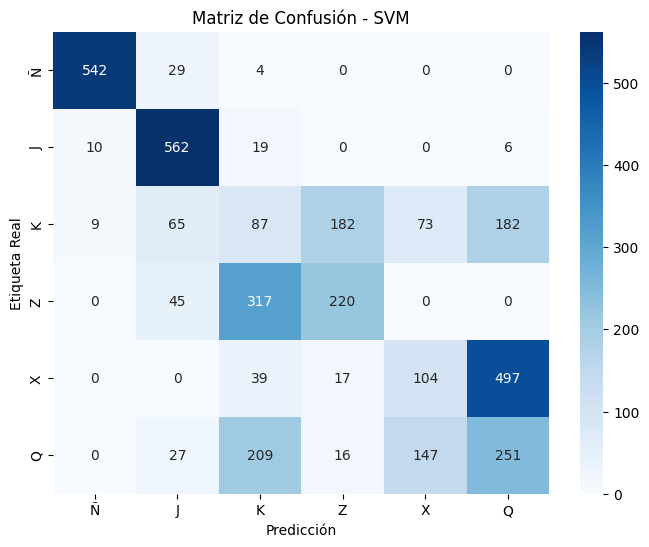


Reporte de Clasificación para SVM:

              precision    recall  f1-score   support

           J       0.77      0.94      0.85       597
           K       0.13      0.15      0.14       598
           Q       0.27      0.39      0.32       650
           X       0.32      0.16      0.21       657
           Z       0.51      0.38      0.43       582
           Ñ       0.97      0.94      0.95       575

    accuracy                           0.48      3659
   macro avg       0.49      0.49      0.48      3659
weighted avg       0.48      0.48      0.47      3659


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score  CV F1 Score
0        RandomForest  0.590872  0.571188     0.684797
1    GradientBoosting  0.518994  0.508133     0.655722
2            AdaBoost  0.345450  0.337816     0.385055
3          KNeighbors  0.463788  0.442952     0.615166
4  LogisticRegression  0.481006  0.470495     0.557468
5        DecisionTree  0.457502  0.423267     0.6

<ipython-input-13-d0a4a8e355ae>:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="Accuracy", ax=axes[0], palette="viridis")
<ipython-input-13-d0a4a8e355ae>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="F1 Score", ax=axes[1], palette="viridis")
<ipython-input-13-d0a4a8e355ae>:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="CV F1 Score", ax=axes[2], palette="viridis")


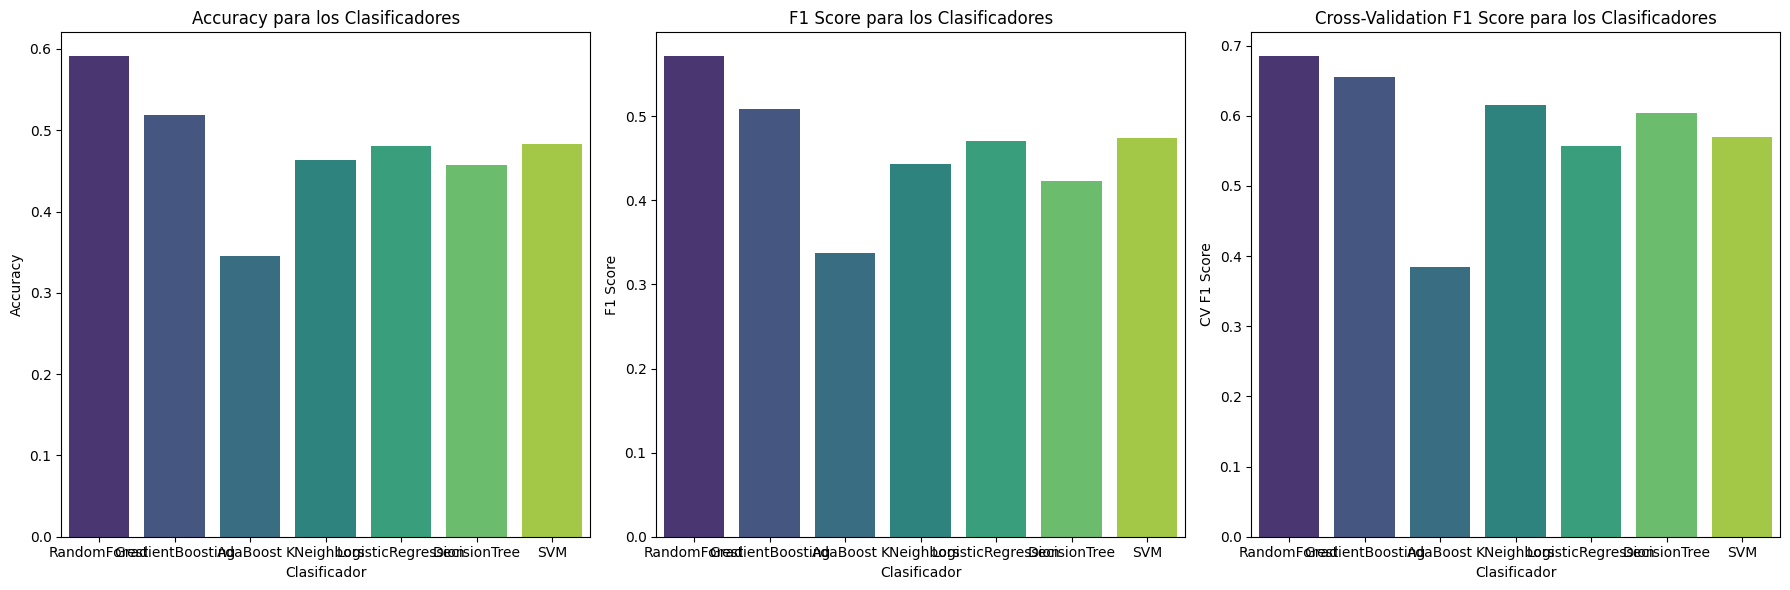

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames60'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Perfil60']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        if not os.path.isdir(label_dir):
            print(f"Directorio no encontrado: {label_dir}")
            continue
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            if not os.path.isdir(folder_path):
                print(f"Subcarpeta no encontrada: {folder_path}")
                continue
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        if not os.path.isdir(label_dir):
            print(f"Directorio no encontrado: {label_dir}")
            continue
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            if not os.path.isdir(folder_path):
                print(f"Subcarpeta no encontrada: {folder_path}")
                continue
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Verificar si alguna lista está vacía
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("Error: `X_train` o `y_train` está vacío. Revisa el proceso de carga de entrenamiento.")
if len(X_test) == 0 or len(y_test) == 0:
    raise ValueError("Error: `X_test` o `y_test` está vacío. Revisa el proceso de carga de prueba.")

# Normalización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajuste de PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir clasificadores con validación cruzada
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear', probability=True)
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='f1_weighted')
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1, 'CV F1 Score': scores.mean()})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos de barras para Accuracy, F1 Score y CV F1 Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para Accuracy
sns.barplot(data=performance_df, x="Classifier", y="Accuracy", ax=axes[0], palette="viridis")
axes[0].set_title("Accuracy para los Clasificadores")
axes[0].set_xlabel("Clasificador")
axes[0].set_ylabel("Accuracy")

# Gráfico de barras para F1 Score
sns.barplot(data=performance_df, x="Classifier", y="F1 Score", ax=axes[1], palette="viridis")
axes[1].set_title("F1 Score para los Clasificadores")
axes[1].set_xlabel("Clasificador")
axes[1].set_ylabel("F1 Score")

# Gráfico de barras para CV F1 Score
sns.barplot(data=performance_df, x="Classifier", y="CV F1 Score", ax=axes[2], palette="viridis")
axes[2].set_title("Cross-Validation F1 Score para los Clasificadores")
axes[2].set_xlabel("Clasificador")
axes[2].set_ylabel("CV F1 Score")

plt.tight_layout()
plt.show()


### **DatosFrontal a 60 frames sin componentes principales**
Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 60 frames de manera frontal de los participantes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Entrenando y evaluando RandomForest...


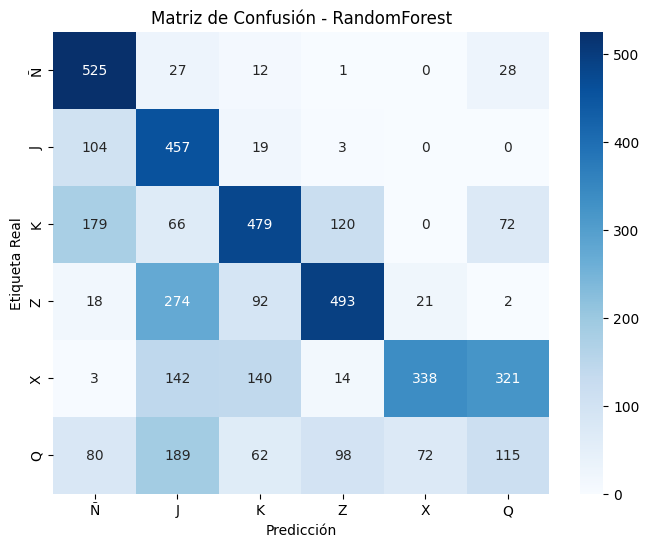


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.40      0.78      0.53       583
           K       0.60      0.52      0.56       916
           Q       0.21      0.19      0.20       616
           X       0.78      0.35      0.49       958
           Z       0.68      0.55      0.61       900
           Ñ       0.58      0.89      0.70       593

    accuracy                           0.53      4566
   macro avg       0.54      0.55      0.51      4566
weighted avg       0.57      0.53      0.52      4566


Entrenando y evaluando GradientBoosting...


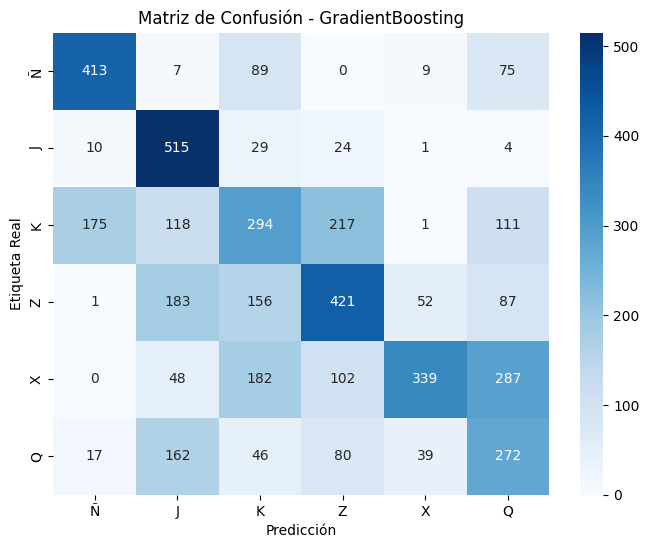


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.50      0.88      0.64       583
           K       0.37      0.32      0.34       916
           Q       0.33      0.44      0.37       616
           X       0.77      0.35      0.48       958
           Z       0.50      0.47      0.48       900
           Ñ       0.67      0.70      0.68       593

    accuracy                           0.49      4566
   macro avg       0.52      0.53      0.50      4566
weighted avg       0.53      0.49      0.49      4566


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

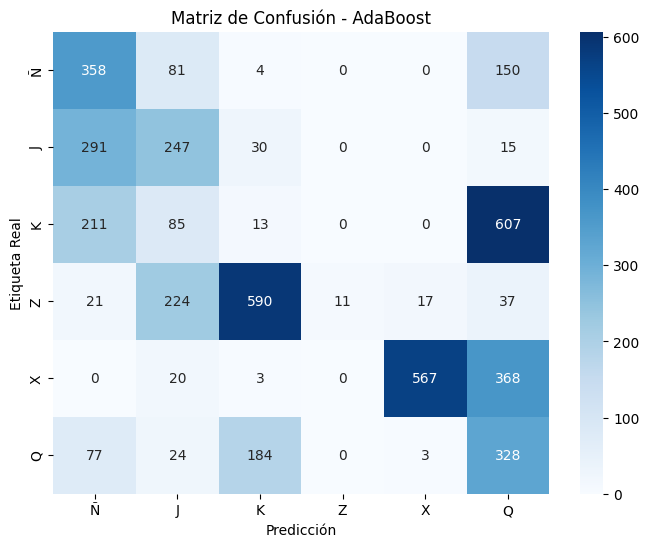


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.36      0.42      0.39       583
           K       0.02      0.01      0.01       916
           Q       0.22      0.53      0.31       616
           X       0.97      0.59      0.73       958
           Z       1.00      0.01      0.02       900
           Ñ       0.37      0.60      0.46       593

    accuracy                           0.33      4566
   macro avg       0.49      0.36      0.32      4566
weighted avg       0.53      0.33      0.31      4566


Entrenando y evaluando KNeighbors...


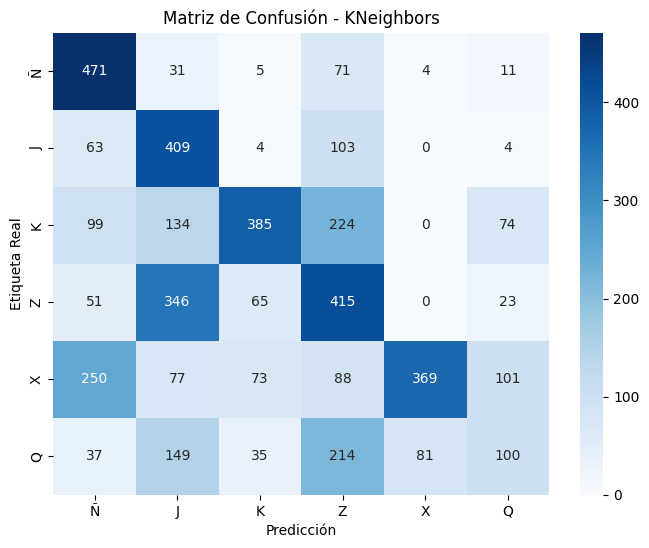


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.36      0.70      0.47       583
           K       0.68      0.42      0.52       916
           Q       0.32      0.16      0.22       616
           X       0.81      0.39      0.52       958
           Z       0.37      0.46      0.41       900
           Ñ       0.49      0.79      0.60       593

    accuracy                           0.47      4566
   macro avg       0.50      0.49      0.46      4566
weighted avg       0.53      0.47      0.46      4566


Entrenando y evaluando LogisticRegression...


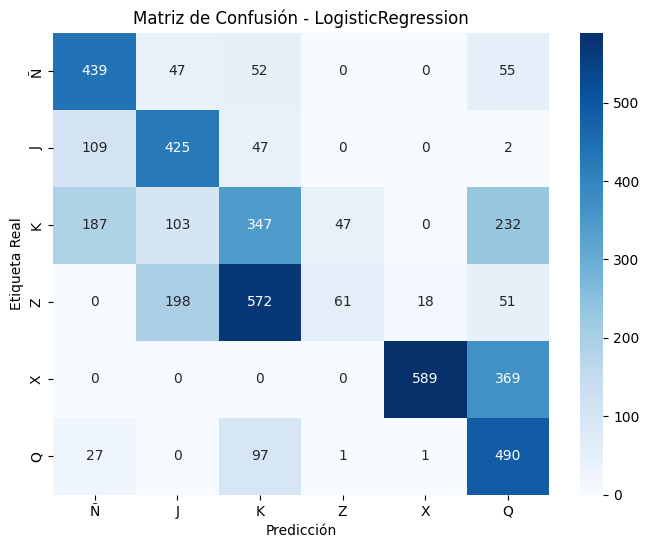


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.55      0.73      0.63       583
           K       0.31      0.38      0.34       916
           Q       0.41      0.80      0.54       616
           X       0.97      0.61      0.75       958
           Z       0.56      0.07      0.12       900
           Ñ       0.58      0.74      0.65       593

    accuracy                           0.51      4566
   macro avg       0.56      0.55      0.50      4566
weighted avg       0.58      0.51      0.49      4566


Entrenando y evaluando DecisionTree...


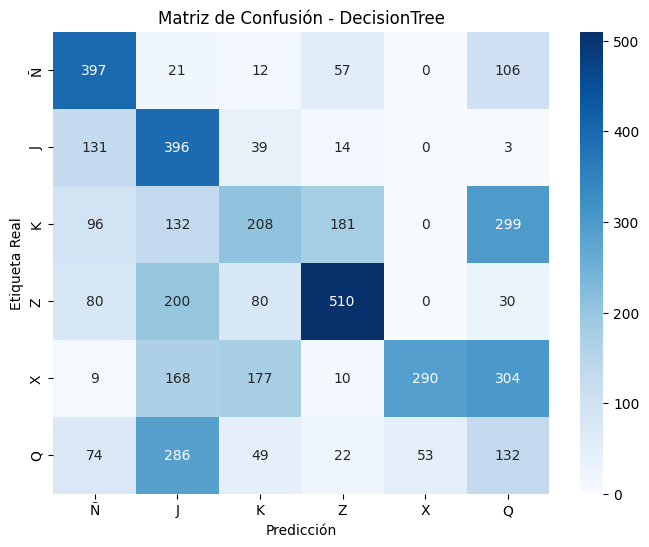


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.33      0.68      0.44       583
           K       0.37      0.23      0.28       916
           Q       0.15      0.21      0.18       616
           X       0.85      0.30      0.45       958
           Z       0.64      0.57      0.60       900
           Ñ       0.50      0.67      0.58       593

    accuracy                           0.42      4566
   macro avg       0.47      0.44      0.42      4566
weighted avg       0.51      0.42      0.42      4566


Entrenando y evaluando SVM...


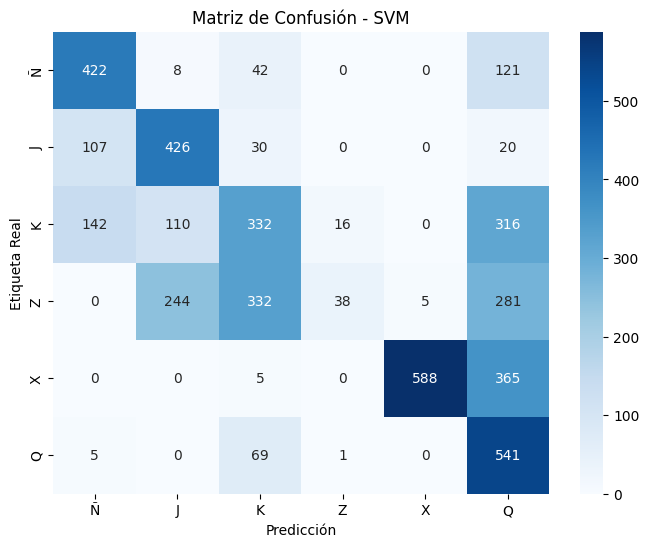


Reporte de Clasificación para SVM:

              precision    recall  f1-score   support

           J       0.54      0.73      0.62       583
           K       0.41      0.36      0.38       916
           Q       0.33      0.88      0.48       616
           X       0.99      0.61      0.76       958
           Z       0.69      0.04      0.08       900
           Ñ       0.62      0.71      0.67       593

    accuracy                           0.51      4566
   macro avg       0.60      0.56      0.50      4566
weighted avg       0.62      0.51      0.48      4566


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score  CV F1 Score
0        RandomForest  0.527157  0.517980     0.632798
1    GradientBoosting  0.493649  0.486405     0.593424
2            AdaBoost  0.333771  0.313337     0.378795
3          KNeighbors  0.470653  0.462688     0.610147
4  LogisticRegression  0.514893  0.487246     0.451516
5        DecisionTree  0.423346  0.423820     0.5

<ipython-input-21-2eb73230c16c>:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="Accuracy", ax=axes[0], palette="viridis")
<ipython-input-21-2eb73230c16c>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="F1 Score", ax=axes[1], palette="viridis")
<ipython-input-21-2eb73230c16c>:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Classifier", y="CV F1 Score", ax=axes[2], palette="viridis")


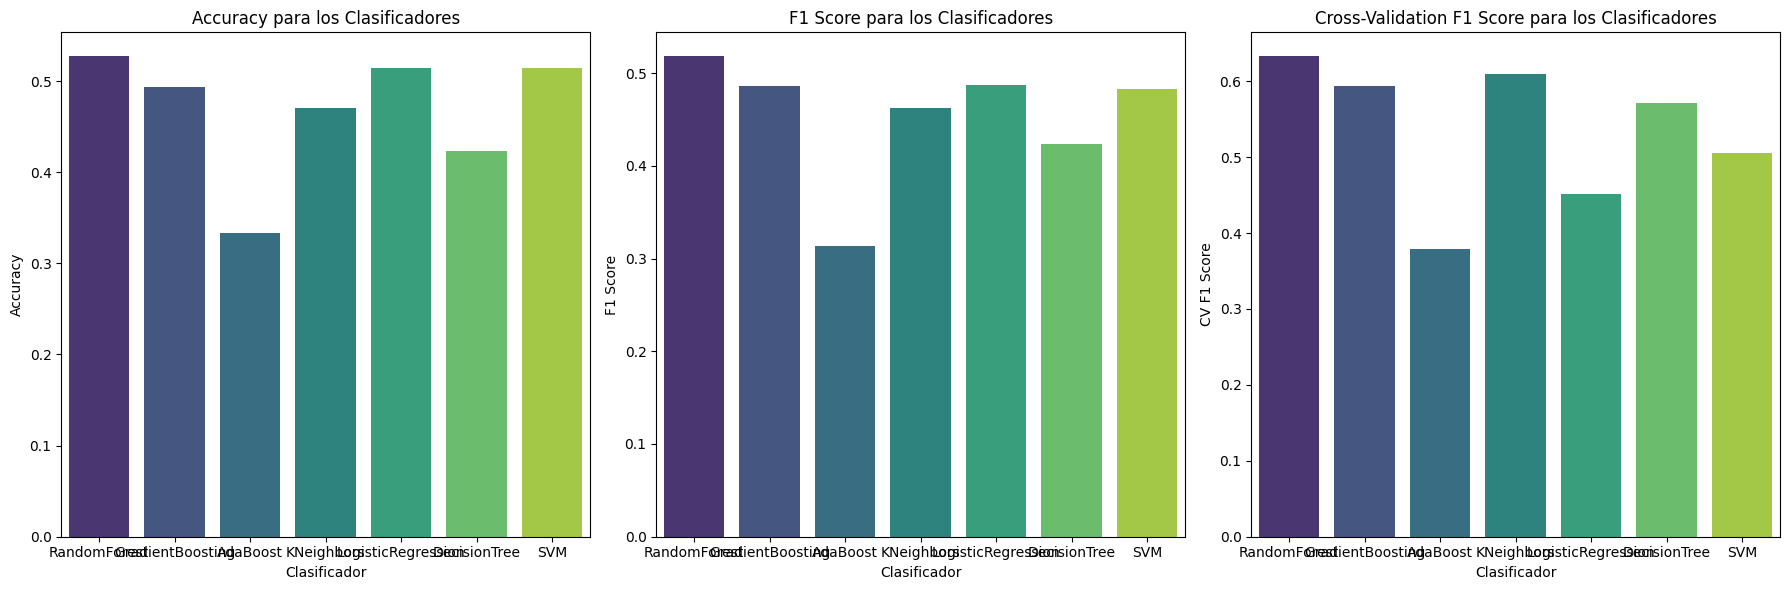

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames60'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Frontal60']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        if not os.path.isdir(label_dir):
            print(f"Directorio no encontrado: {label_dir}")
            continue
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            if not os.path.isdir(folder_path):
                print(f"Subcarpeta no encontrada: {folder_path}")
                continue
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        if not os.path.isdir(label_dir):
            print(f"Directorio no encontrado: {label_dir}")
            continue
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            if not os.path.isdir(folder_path):
                print(f"Subcarpeta no encontrada: {folder_path}")
                continue
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Verificar si alguna lista está vacía
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("Error: `X_train` o `y_train` está vacío. Revisa el proceso de carga de entrenamiento.")
if len(X_test) == 0 or len(y_test) == 0:
    raise ValueError("Error: `X_test` o `y_test` está vacío. Revisa el proceso de carga de prueba.")

# Normalización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajuste de PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir clasificadores con validación cruzada
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear', probability=True)
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='f1_weighted')
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1, 'CV F1 Score': scores.mean()})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos de barras para Accuracy, F1 Score y CV F1 Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para Accuracy
sns.barplot(data=performance_df, x="Classifier", y="Accuracy", ax=axes[0], palette="viridis")
axes[0].set_title("Accuracy para los Clasificadores")
axes[0].set_xlabel("Clasificador")
axes[0].set_ylabel("Accuracy")

# Gráfico de barras para F1 Score
sns.barplot(data=performance_df, x="Classifier", y="F1 Score", ax=axes[1], palette="viridis")
axes[1].set_title("F1 Score para los Clasificadores")
axes[1].set_xlabel("Clasificador")
axes[1].set_ylabel("F1 Score")

# Gráfico de barras para CV F1 Score
sns.barplot(data=performance_df, x="Classifier", y="CV F1 Score", ax=axes[2], palette="viridis")
axes[2].set_title("Cross-Validation F1 Score para los Clasificadores")
axes[2].set_xlabel("Clasificador")
axes[2].set_ylabel("CV F1 Score")

plt.tight_layout()
plt.show()


### **Clasificadores para datos capturados de perfil y de manera frontal con componentes principales a 60 frames**

Puedes empezar desde aqui dando la dirección de la carpeta en el drive.

Se aplican 6 clasificadores y se separan dos participantes en carpetas diferentes para que sean los del conjunto de prueba.

Por ultimo se reportan los resultados de manera grafica para el desempeño de los seis clasificadores.

Se reporta la matriz de confusión para cada clasificador y la precisión y el acurracy para cada letra clasificada.

Esta parte del notebook es para la segmentación a 30 frames de manera frontal de los participantes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Varianza explicada por cada componente principal:
Componente 1: 0.5763
Componente 2: 0.3416
Componente 3: 0.0357
Componente 4: 0.0169
Componente 5: 0.0101
Componente 6: 0.0084
Componente 7: 0.0029
Componente 8: 0.0023
Componente 9: 0.0012
Componente 10: 0.0010
Componente 11: 0.0007
Componente 12: 0.0006
Componente 13: 0.0004
Componente 14: 0.0003
Componente 15: 0.0002
Componente 16: 0.0002
Componente 17: 0.0001
Componente 18: 0.0001
Componente 19: 0.0001
Componente 20: 0.0001
Componente 21: 0.0001
Componente 22: 0.0001
Componente 23: 0.0001
Componente 24: 0.0000
Componente 25: 0.0000
Componente 26: 0.0000
Componente 27: 0.0000
Componente 28: 0.0000
Componente 29: 0.0000
Componente 30: 0.0000

Varianza acumulada:
Componente 1: 0.5763
Componente 2: 0.9179
Componente 3: 0.9536
Componente 4: 0.9705
Componente 5: 0.9807
Componente 6: 0.9891
Componente 7: 0.9919
Co

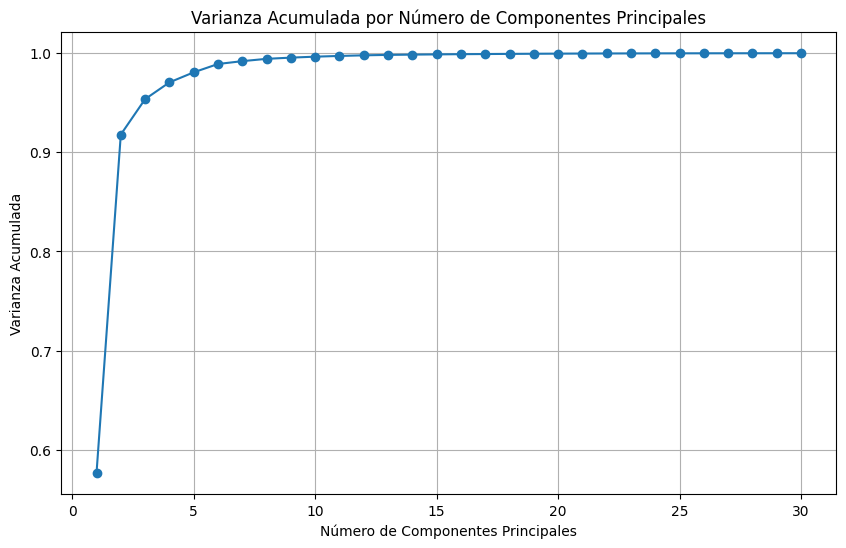

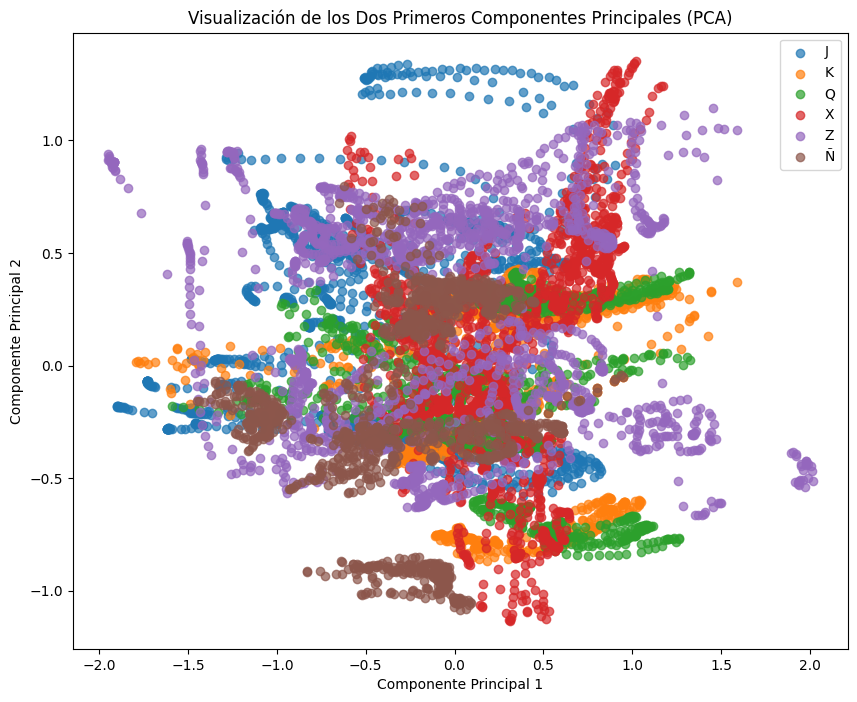


Entrenando y evaluando RandomForest...


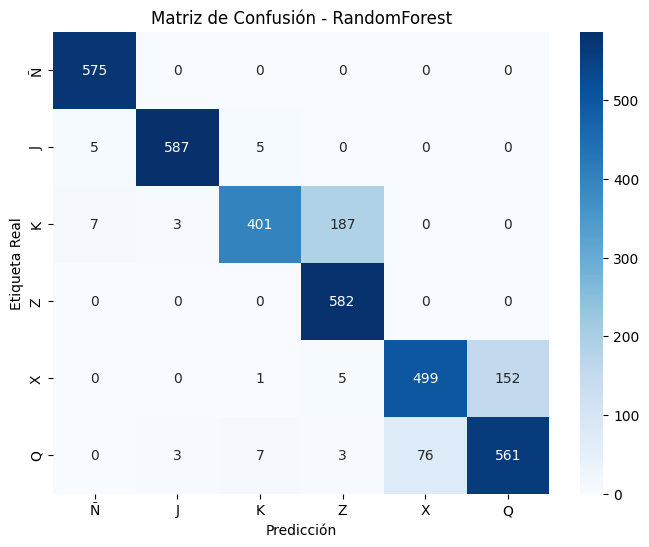


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.99      0.98      0.99       597
           K       0.97      0.67      0.79       598
           Q       0.79      0.86      0.82       650
           X       0.87      0.76      0.81       657
           Z       0.75      1.00      0.86       582
           Ñ       0.98      1.00      0.99       575

    accuracy                           0.88      3659
   macro avg       0.89      0.88      0.88      3659
weighted avg       0.89      0.88      0.87      3659


Entrenando y evaluando GradientBoosting...


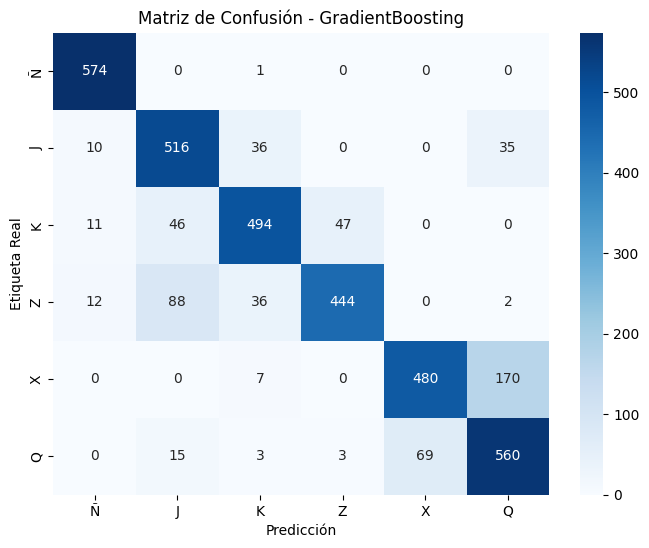


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.78      0.86      0.82       597
           K       0.86      0.83      0.84       598
           Q       0.73      0.86      0.79       650
           X       0.87      0.73      0.80       657
           Z       0.90      0.76      0.83       582
           Ñ       0.95      1.00      0.97       575

    accuracy                           0.84      3659
   macro avg       0.85      0.84      0.84      3659
weighted avg       0.84      0.84      0.84      3659


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


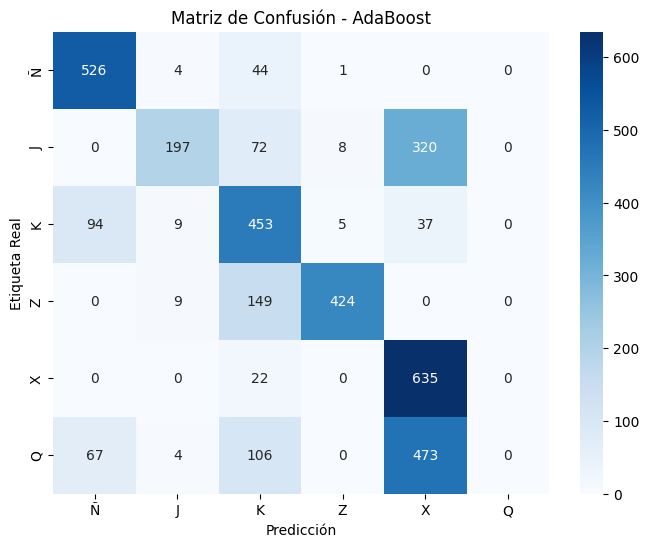


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.88      0.33      0.48       597
           K       0.54      0.76      0.63       598
           Q       0.00      0.00      0.00       650
           X       0.43      0.97      0.60       657
           Z       0.97      0.73      0.83       582
           Ñ       0.77      0.91      0.83       575

    accuracy                           0.61      3659
   macro avg       0.60      0.62      0.56      3659
weighted avg       0.58      0.61      0.55      3659


Entrenando y evaluando KNeighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


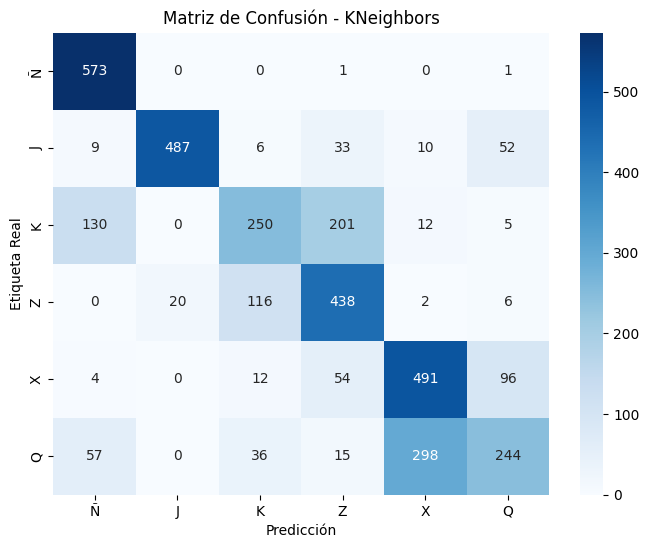


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.96      0.82      0.88       597
           K       0.60      0.42      0.49       598
           Q       0.60      0.38      0.46       650
           X       0.60      0.75      0.67       657
           Z       0.59      0.75      0.66       582
           Ñ       0.74      1.00      0.85       575

    accuracy                           0.68      3659
   macro avg       0.68      0.68      0.67      3659
weighted avg       0.68      0.68      0.67      3659


Entrenando y evaluando LogisticRegression...


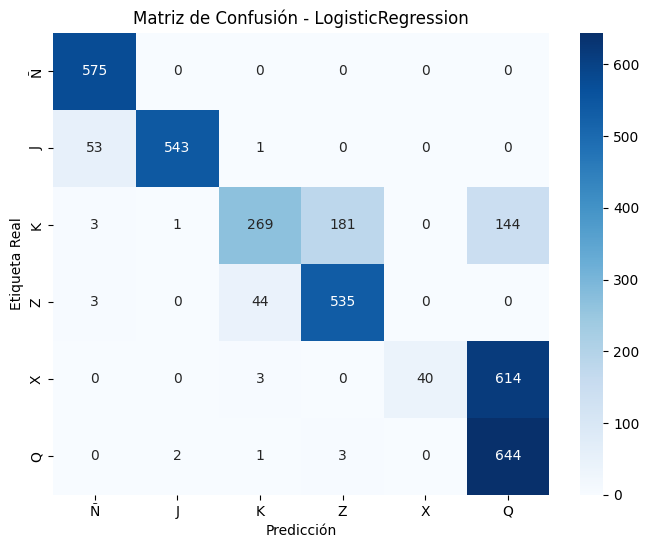


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.99      0.91      0.95       597
           K       0.85      0.45      0.59       598
           Q       0.46      0.99      0.63       650
           X       1.00      0.06      0.11       657
           Z       0.74      0.92      0.82       582
           Ñ       0.91      1.00      0.95       575

    accuracy                           0.71      3659
   macro avg       0.83      0.72      0.68      3659
weighted avg       0.82      0.71      0.66      3659


Entrenando y evaluando DecisionTree...


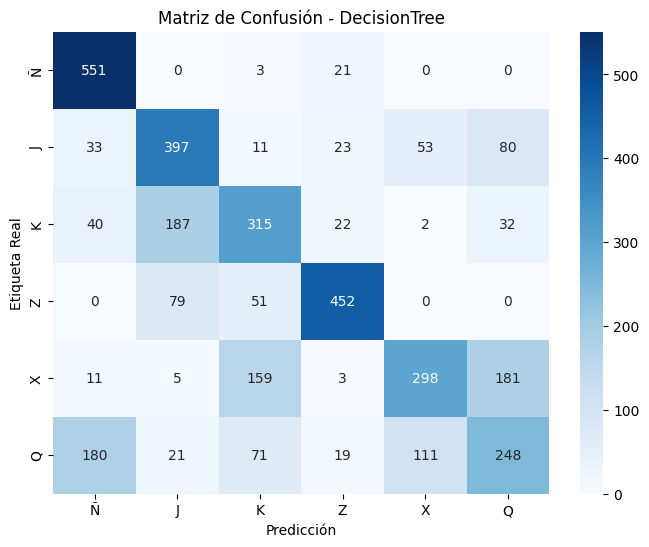


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.58      0.66      0.62       597
           K       0.52      0.53      0.52       598
           Q       0.46      0.38      0.42       650
           X       0.64      0.45      0.53       657
           Z       0.84      0.78      0.81       582
           Ñ       0.68      0.96      0.79       575

    accuracy                           0.62      3659
   macro avg       0.62      0.63      0.61      3659
weighted avg       0.61      0.62      0.61      3659


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.875922  0.873932
1    GradientBoosting  0.838480  0.838083
2            AdaBoost  0.610823  0.551636
3          KNeighbors  0.678601  0.665253
4  LogisticRegression  0.712216  0.663421
5        DecisionTree  0.617928  0.608159


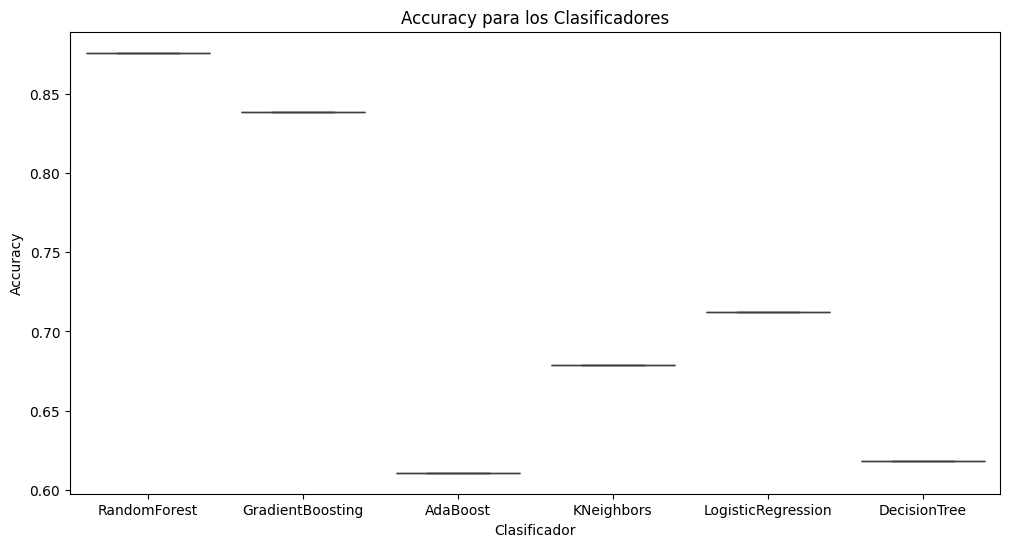

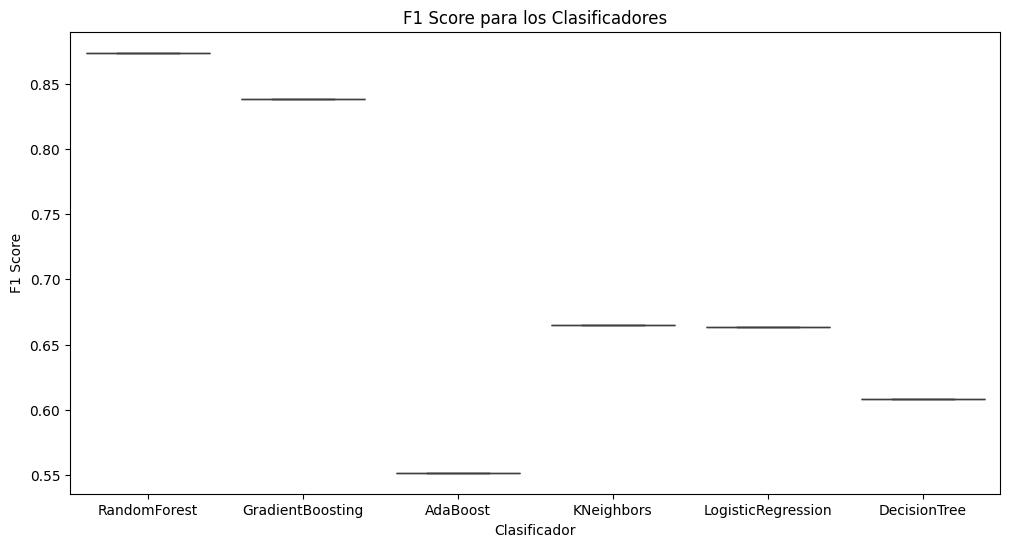

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Varianza explicada por cada componente principal:
Componente 1: 0.7273
Componente 2: 0.1825
Componente 3: 0.0368
Componente 4: 0.0214
Componente 5: 0.0103
Componente 6: 0.0078
Componente 7: 0.0038
Componente 8: 0.0022
Componente 9: 0.0015
Componente 10: 0.0013
Componente 11: 0.0012
Componente 12: 0.0007
Componente 13: 0.0005
Componente 14: 0.0005
Componente 15: 0.0004
Componente 16: 0.0004
Componente 17: 0.0003
Componente 18: 0.0002
Componente 19: 0.0002
Componente 20: 0.0002
Componente 21: 0.0001
Componente 22: 0.0001
Componente 23: 0.0001
Componente 24: 0.0001
Componente 25: 0.0001
Componente 26: 0.0000
Componente 27: 0.0000
Componente 28: 0.0000
Componente 29: 0.0000
Componente 30: 0.0000

Varianza acumulada:
Componente 1: 0.7273
Componente 2: 0.9098
Componente 3: 0.9466
Componente 4: 0.9680
Componente 5: 0.9783
Componente 6: 0.9861
Componente 7: 0.9899
Co

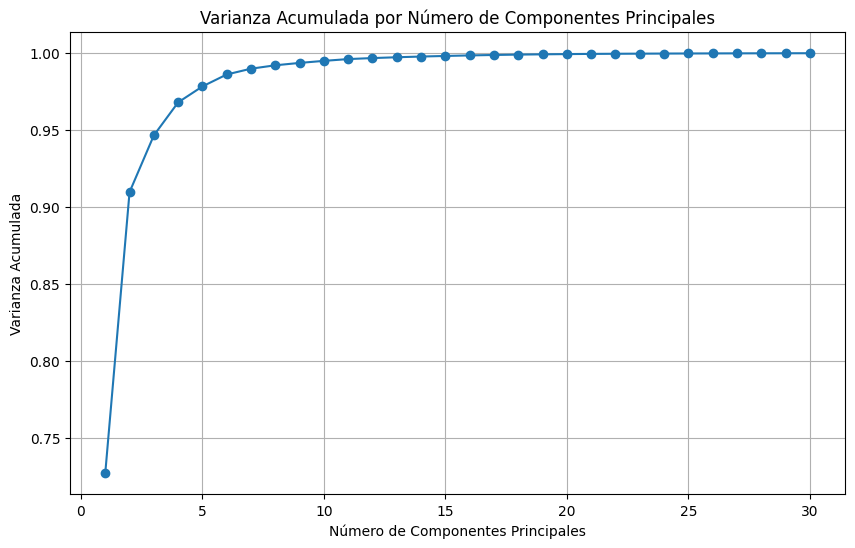

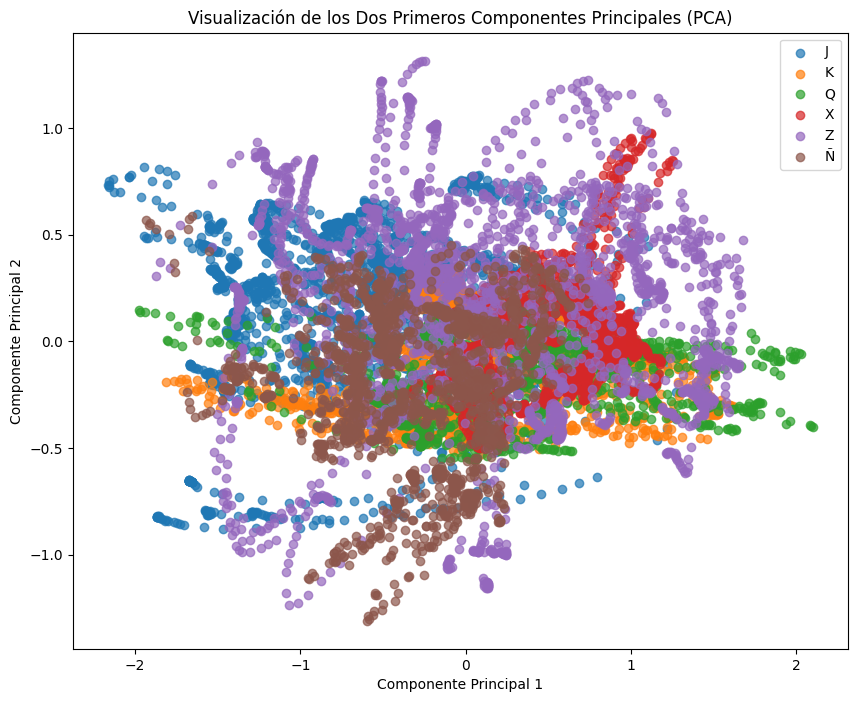


Entrenando y evaluando RandomForest...


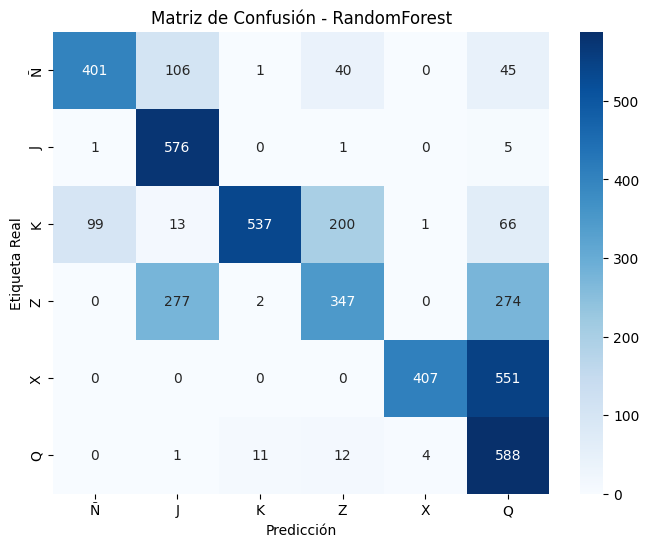


Reporte de Clasificación para RandomForest:

              precision    recall  f1-score   support

           J       0.59      0.99      0.74       583
           K       0.97      0.59      0.73       916
           Q       0.38      0.95      0.55       616
           X       0.99      0.42      0.59       958
           Z       0.58      0.39      0.46       900
           Ñ       0.80      0.68      0.73       593

    accuracy                           0.63      4566
   macro avg       0.72      0.67      0.64      4566
weighted avg       0.75      0.63      0.63      4566


Entrenando y evaluando GradientBoosting...


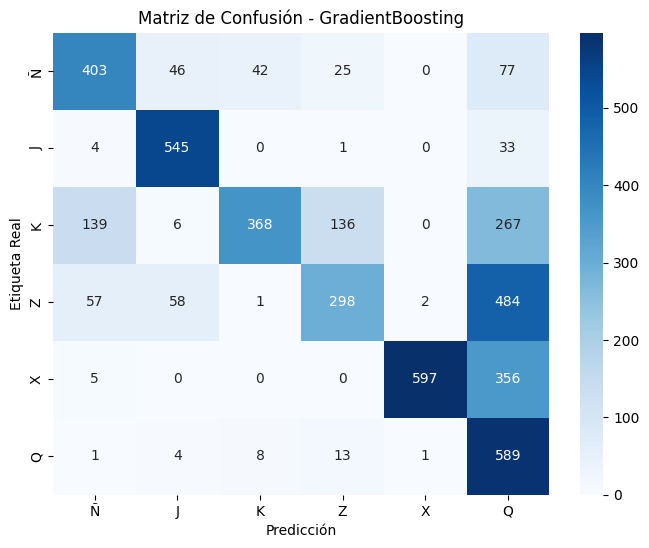


Reporte de Clasificación para GradientBoosting:

              precision    recall  f1-score   support

           J       0.83      0.93      0.88       583
           K       0.88      0.40      0.55       916
           Q       0.33      0.96      0.49       616
           X       0.99      0.62      0.77       958
           Z       0.63      0.33      0.43       900
           Ñ       0.66      0.68      0.67       593

    accuracy                           0.61      4566
   macro avg       0.72      0.65      0.63      4566
weighted avg       0.74      0.61      0.62      4566


Entrenando y evaluando AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


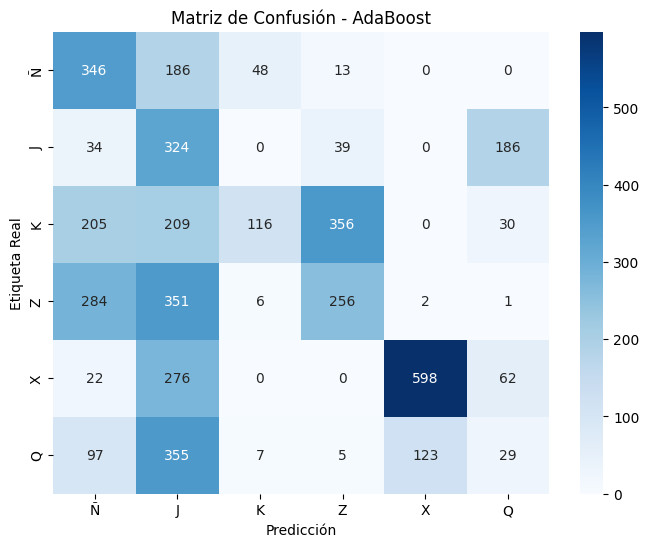


Reporte de Clasificación para AdaBoost:

              precision    recall  f1-score   support

           J       0.19      0.56      0.28       583
           K       0.66      0.13      0.21       916
           Q       0.09      0.05      0.06       616
           X       0.83      0.62      0.71       958
           Z       0.38      0.28      0.33       900
           Ñ       0.35      0.58      0.44       593

    accuracy                           0.37      4566
   macro avg       0.42      0.37      0.34      4566
weighted avg       0.46      0.37      0.36      4566


Entrenando y evaluando KNeighbors...


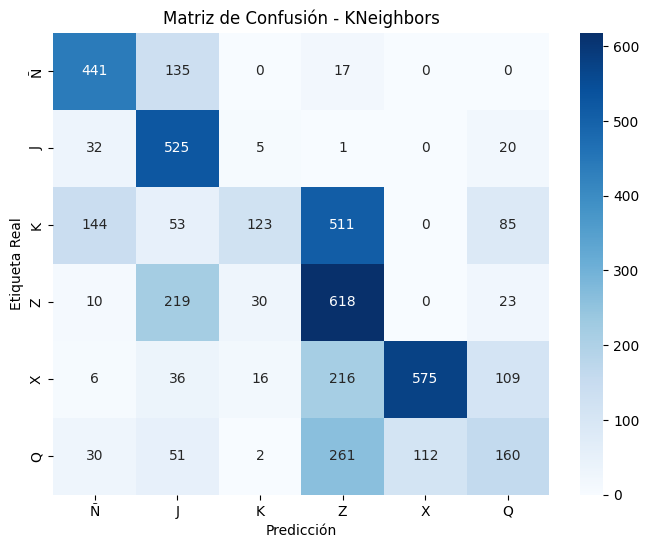


Reporte de Clasificación para KNeighbors:

              precision    recall  f1-score   support

           J       0.52      0.90      0.66       583
           K       0.70      0.13      0.23       916
           Q       0.40      0.26      0.32       616
           X       0.84      0.60      0.70       958
           Z       0.38      0.69      0.49       900
           Ñ       0.67      0.74      0.70       593

    accuracy                           0.53      4566
   macro avg       0.58      0.55      0.51      4566
weighted avg       0.60      0.53      0.51      4566


Entrenando y evaluando LogisticRegression...


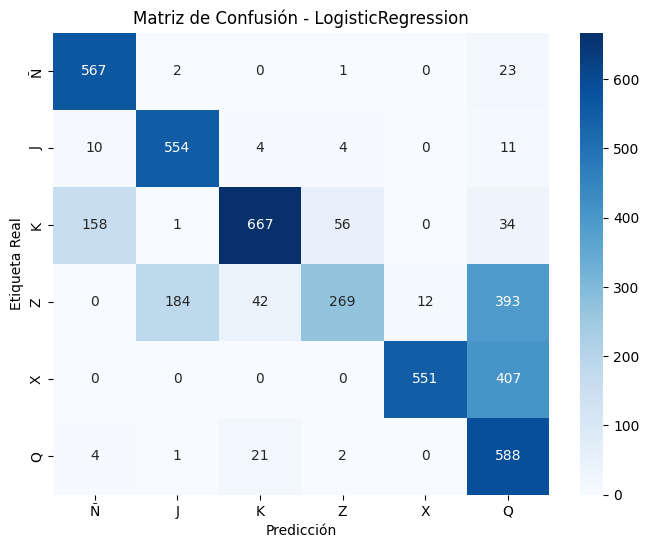


Reporte de Clasificación para LogisticRegression:

              precision    recall  f1-score   support

           J       0.75      0.95      0.84       583
           K       0.91      0.73      0.81       916
           Q       0.40      0.95      0.57       616
           X       0.98      0.58      0.72       958
           Z       0.81      0.30      0.44       900
           Ñ       0.77      0.96      0.85       593

    accuracy                           0.70      4566
   macro avg       0.77      0.74      0.70      4566
weighted avg       0.80      0.70      0.69      4566


Entrenando y evaluando DecisionTree...


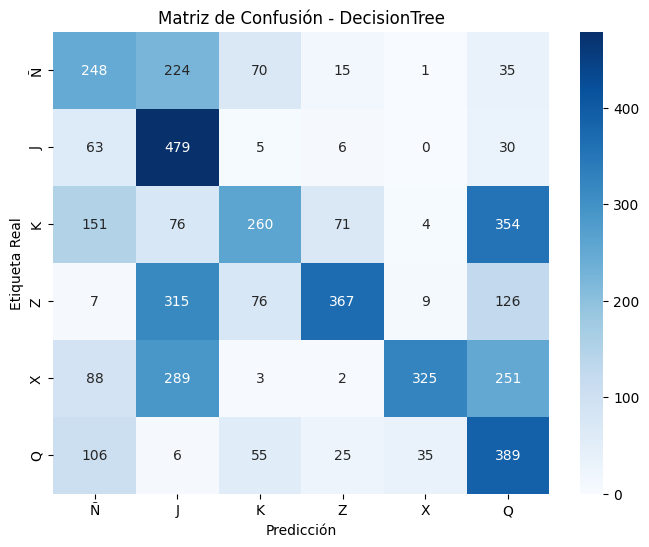


Reporte de Clasificación para DecisionTree:

              precision    recall  f1-score   support

           J       0.34      0.82      0.49       583
           K       0.55      0.28      0.38       916
           Q       0.33      0.63      0.43       616
           X       0.87      0.34      0.49       958
           Z       0.76      0.41      0.53       900
           Ñ       0.37      0.42      0.39       593

    accuracy                           0.45      4566
   macro avg       0.54      0.48      0.45      4566
weighted avg       0.58      0.45      0.45      4566


Resumen de Desempeño de Clasificadores:
           Classifier  Accuracy  F1 Score
0        RandomForest  0.625493  0.626432
1    GradientBoosting  0.613228  0.621715
2            AdaBoost  0.365528  0.357719
3          KNeighbors  0.534823  0.505899
4  LogisticRegression  0.699956  0.694191
5        DecisionTree  0.452913  0.453686


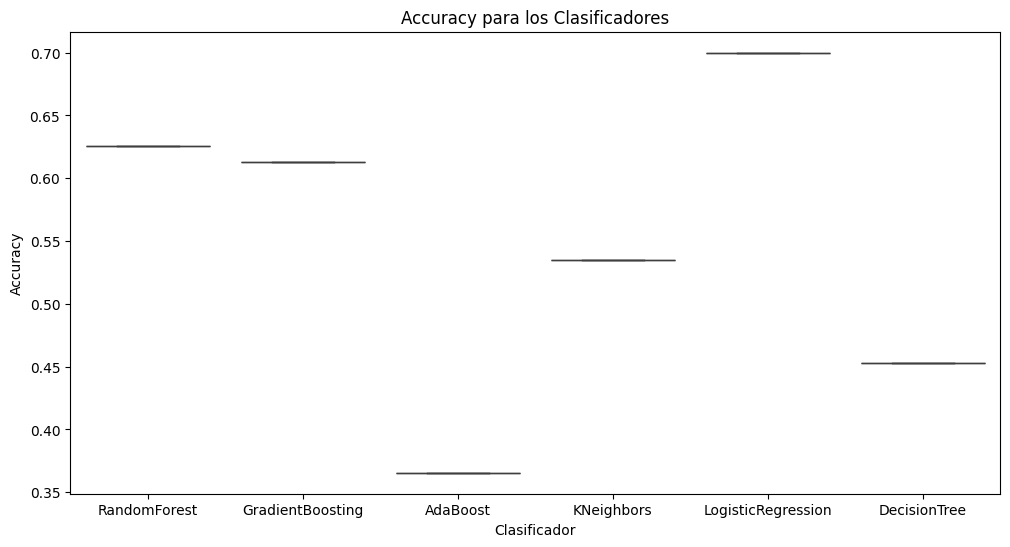

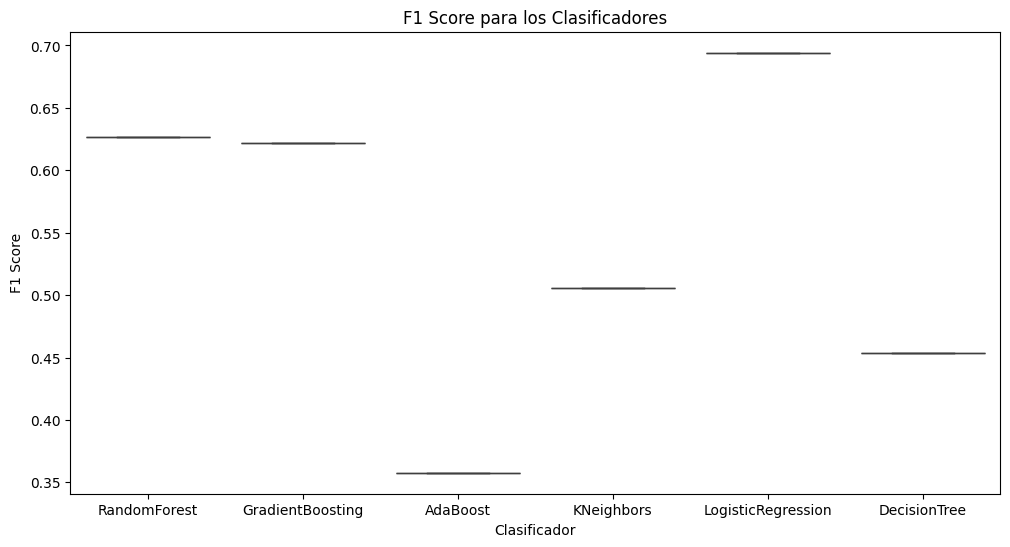

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames60'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Perfil60']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Aplicar PCA para reducción de dimensionalidad
n_components = 30  # Número de componentes principales deseados para entrenamiento
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Mostrar varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.4f}")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Componente {i}: {cum_var:.4f}")

# Graficar varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes Principales")
plt.grid()
plt.show()

# Visualizar los primeros dos componentes principales
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=label, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de los Dos Primeros Componentes Principales (PCA)")
plt.legend()
plt.show()

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()



################################

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalar librerías necesarias
!pip install mediapipe scikit-learn opencv-python-headless

import cv2
import mediapipe as mp
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Definir rutas y parámetros
TRAIN_DATA_DIR = '/content/drive/MyDrive/selected_frames60'  # Ruta de entrenamiento
TEST_DATA_DIR = '/content/drive/MyDrive/frames'  # Ruta de prueba
labels = ['Ñ', 'J', 'K', 'Z', 'X', 'Q']
views = ['Frontal60']
X_train, y_train = [], []
X_test, y_test = [], []

# Función para procesar imágenes y extraer características
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1) as hands:
        results = hands.process(image)
        if results.multi_hand_landmarks:
            landmarks = []
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
            return landmarks
    return None

# Cargar imágenes de entrenamiento y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TRAIN_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_train.append(features)
                    y_train.append(label)

# Cargar imágenes de prueba y extraer características
for view in views:
    for label in labels:
        label_dir = os.path.join(TEST_DATA_DIR, view, label)
        for folder in os.listdir(label_dir):
            folder_path = os.path.join(label_dir, folder)
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                features = process_image(img_path)
                if features:
                    X_test.append(features)
                    y_test.append(label)

# Convertir a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Aplicar PCA para reducción de dimensionalidad
n_components = 30  # Número de componentes principales deseados para entrenamiento
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Mostrar varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.4f}")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Componente {i}: {cum_var:.4f}")

# Graficar varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes Principales")
plt.grid()
plt.show()

# Visualizar los primeros dos componentes principales
plt.figure(figsize=(10, 8))
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=label, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de los Dos Primeros Componentes Principales (PCA)")
plt.legend()
plt.show()

# Definir clasificadores
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Lista para almacenar el desempeño de cada clasificador
performance_summary = []

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    print(f"\nEntrenando y evaluando {name}...")
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    performance_summary.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Real")
    plt.show()

    # Reporte de clasificación
    print(f"\nReporte de Clasificación para {name}:\n")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame de resumen de desempeño
performance_df = pd.DataFrame(performance_summary)

# Mostrar el cuadro de desempeño de clasificadores
print("\nResumen de Desempeño de Clasificadores:")
print(performance_df)

# Gráficos separados de boxplot para F1 Score y Accuracy
plt.figure(figsize=(12, 6))

# Boxplot para Accuracy
sns.boxplot(data=performance_df, x="Classifier", y="Accuracy")
plt.title("Accuracy para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Accuracy")
plt.show()

# Boxplot para F1 Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x="Classifier", y="F1 Score")
plt.title("F1 Score para los Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("F1 Score")
plt.show()


### **Resultados finales**

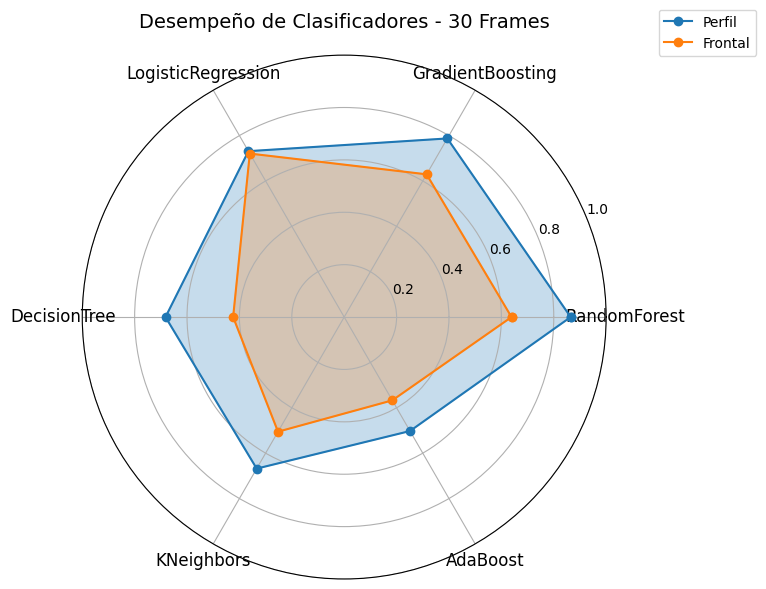

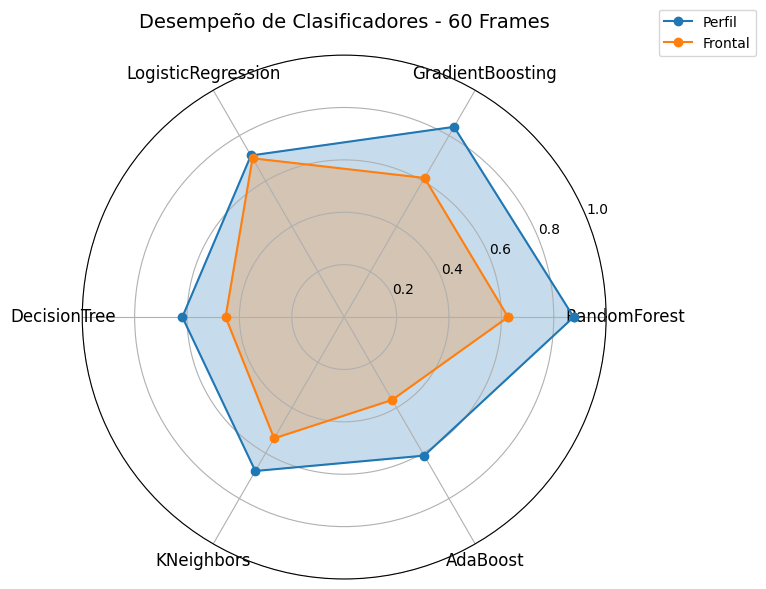

In [ ]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos para 30 frames
data_30 = {
    "Classifier": ["RandomForest", "GradientBoosting", "LogisticRegression", "DecisionTree", "KNeighbors", "AdaBoost"],
    "Perfil_Accuracy": [0.864544, 0.787372, 0.731247, 0.682137, 0.668106, 0.502428],
    "Frontal_Accuracy": [0.638756, 0.629187, 0.720694, 0.424043, 0.505383, 0.367225]
}

# Datos para 60 frames
data_60 = {
    "Classifier": ["RandomForest", "GradientBoosting", "LogisticRegression", "DecisionTree", "KNeighbors", "AdaBoost"],
    "Perfil_Accuracy": [0.875922, 0.838480, 0.712216, 0.617928, 0.678601, 0.610823],
    "Frontal_Accuracy": [0.625493, 0.613228, 0.699956, 0.452913, 0.534823, 0.365528]
}

# Convertir los datos a DataFrame
df_30 = pd.DataFrame(data_30)
df_60 = pd.DataFrame(data_60)

# Función para graficar gráficos de araña
def plot_radar(data, title):
    categories = list(data["Classifier"])
    perfil_values = data["Perfil_Accuracy"]
    frontal_values = data["Frontal_Accuracy"]

    # Asegurar que el radar sea cerrado
    categories += [categories[0]]
    perfil_values = list(perfil_values) + [perfil_values[0]]
    frontal_values = list(frontal_values) + [frontal_values[0]]

    # Número de categorías
    N = len(categories)

    # Ángulos para cada categoría
    angles = np.linspace(0, 2 * np.pi, N, endpoint=True).tolist()

    # Iniciar el gráfico
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Perfil
    ax.plot(angles, perfil_values, linestyle='-', marker='o', label="Perfil", color="#1f77b4")
    ax.fill(angles, perfil_values, color="#1f77b4", alpha=0.25)

    # Frontal
    ax.plot(angles, frontal_values, linestyle='-', marker='o', label="Frontal", color="#ff7f0e")
    ax.fill(angles, frontal_values, color="#ff7f0e", alpha=0.25)

    # Ajustar etiquetas y título
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories[:-1], fontsize=12)
    ax.set_title(title, fontsize=14, pad=20)

    # Leyenda
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

# Graficar para 30 frames
plot_radar(df_30, "Desempeño de Clasificadores - 30 Frames")

# Graficar para 60 frames
plot_radar(df_60, "Desempeño de Clasificadores - 60 Frames")





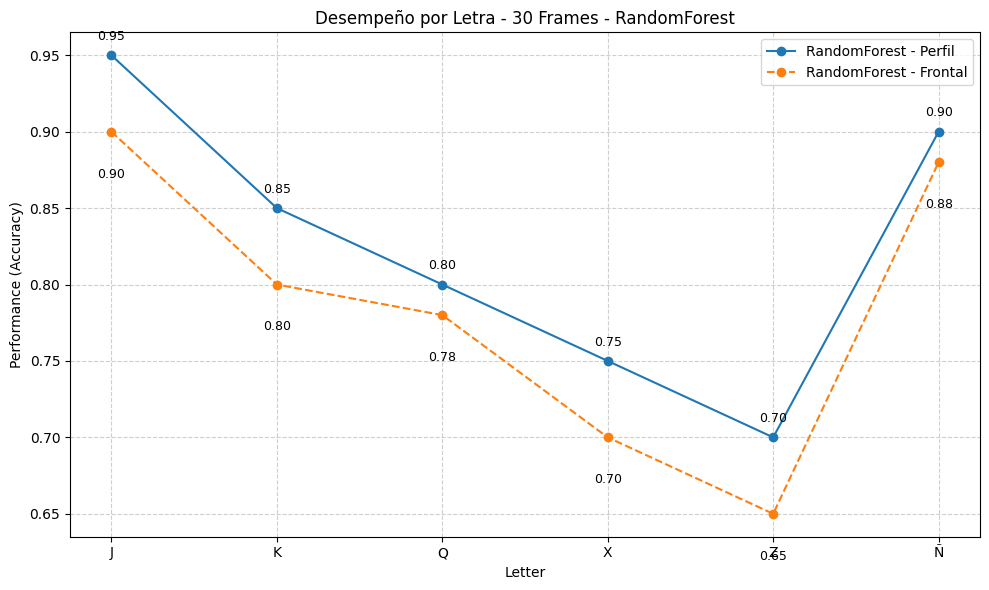

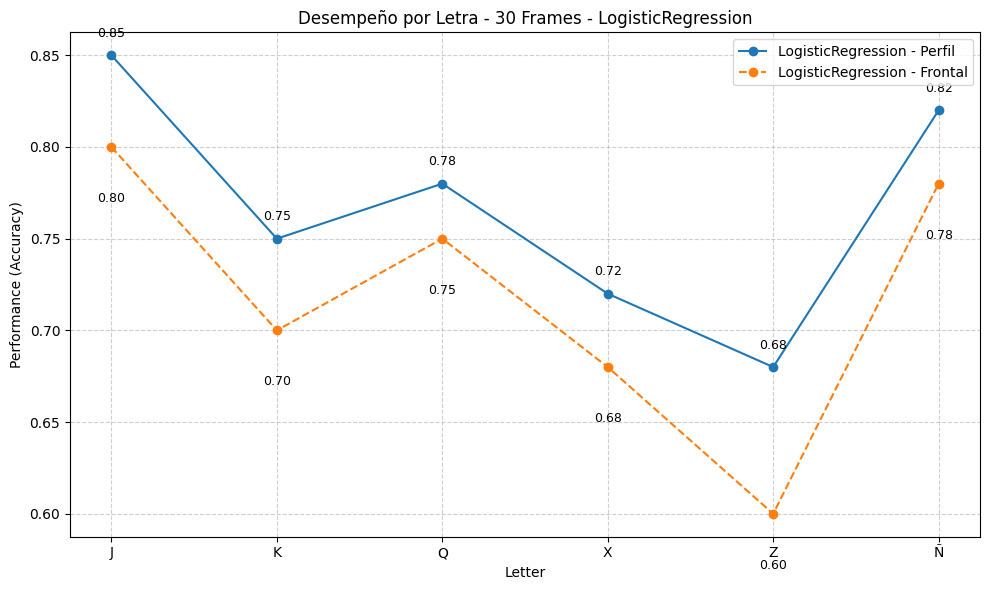

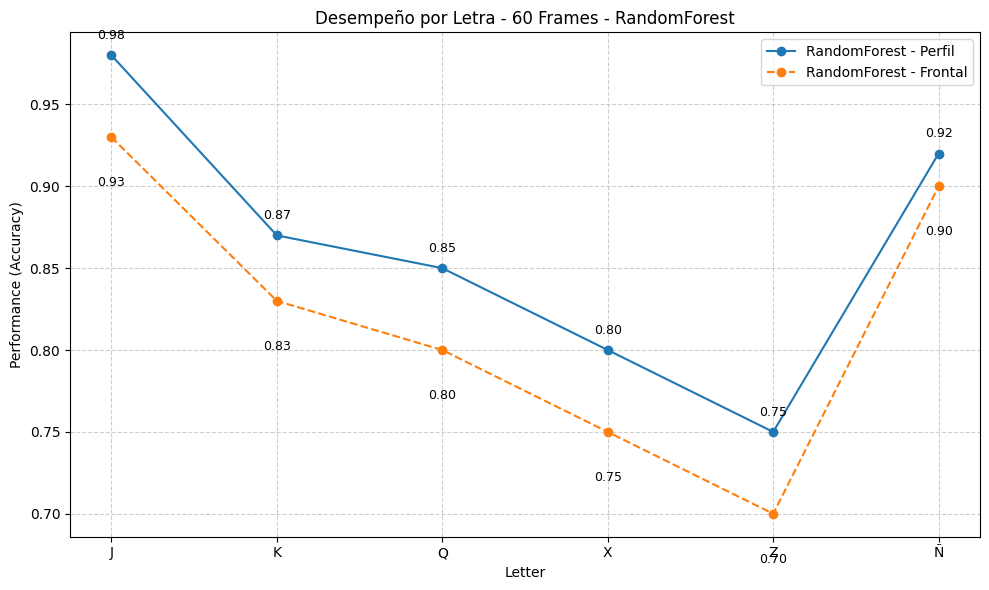

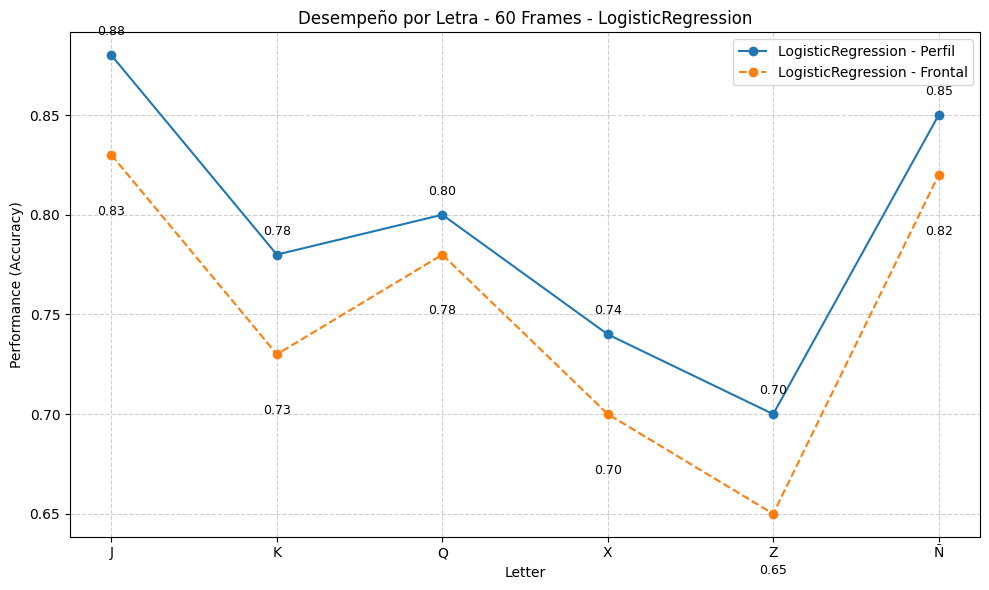

In [ ]:
# Crear nuevamente los DataFrames con los datos correctos
data_30 = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "RandomForest_Perfil": [0.95, 0.85, 0.80, 0.75, 0.70, 0.90],
    "RandomForest_Frontal": [0.90, 0.80, 0.78, 0.70, 0.65, 0.88],
    "LogisticRegression_Perfil": [0.85, 0.75, 0.78, 0.72, 0.68, 0.82],
    "LogisticRegression_Frontal": [0.80, 0.70, 0.75, 0.68, 0.60, 0.78]
}

data_60 = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "RandomForest_Perfil": [0.98, 0.87, 0.85, 0.80, 0.75, 0.92],
    "RandomForest_Frontal": [0.93, 0.83, 0.80, 0.75, 0.70, 0.90],
    "LogisticRegression_Perfil": [0.88, 0.78, 0.80, 0.74, 0.70, 0.85],
    "LogisticRegression_Frontal": [0.83, 0.73, 0.78, 0.70, 0.65, 0.82]
}

# Convertir los datos en DataFrames
df_30 = pd.DataFrame(data_30)
df_60 = pd.DataFrame(data_60)

# Función para graficar frontal y perfil en un solo gráfico por clasificador con números en negro
def plot_letter_performance_numbers_black(df, title_prefix):
    classifiers = ["RandomForest", "LogisticRegression"]

    for classifier in classifiers:
        plt.figure(figsize=(10, 6))
        perfil_column = f"{classifier}_Perfil"
        frontal_column = f"{classifier}_Frontal"
        # Graficar las líneas
        plt.plot(df["Letter"], df[perfil_column], marker='o', linestyle='-', label=f"{classifier} - Perfil", color="#1f77b4")
        plt.plot(df["Letter"], df[frontal_column], marker='o', linestyle='--', label=f"{classifier} - Frontal", color="#ff7f0e")

        # Agregar números en negro para Perfil
        for x, y in zip(df["Letter"], df[perfil_column]):
            plt.text(x, y + 0.01, f"{y:.2f}", fontsize=9, ha='center', color="black")

        # Agregar números en negro para Frontal
        for x, y in zip(df["Letter"], df[frontal_column]):
            plt.text(x, y - 0.03, f"{y:.2f}", fontsize=9, ha='center', color="black")

        plt.title(f"{title_prefix} - {classifier}")
        plt.xlabel("Letter")
        plt.ylabel("Performance (Accuracy)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# Graficar para 30 frames con números en negro
plot_letter_performance_numbers_black(df_30, "Desempeño por Letra - 30 Frames")

# Graficar para 60 frames con números en negro
plot_letter_performance_numbers_black(df_60, "Desempeño por Letra - 60 Frames")


## **Resultados solo precisión mejores clasificadores**

El clasificador que mejor desempeño obutvo fue el random forest en las muestras que fueron capturadas de perfil. Consideramos que este resultado era un resultado esperado ya que al tomar información sobre el perfil se captura mas información para identificar las señas dinamicas que en el caso de la X y la Q existe similitud al capturarla de manera frontal.

Por ultimo la letra mejor clasificada fue la letra J con niveles de precision arriba del 80% por otro lado la letra con menor precisión fue la letra Z con niveles de precision menores al 70%.

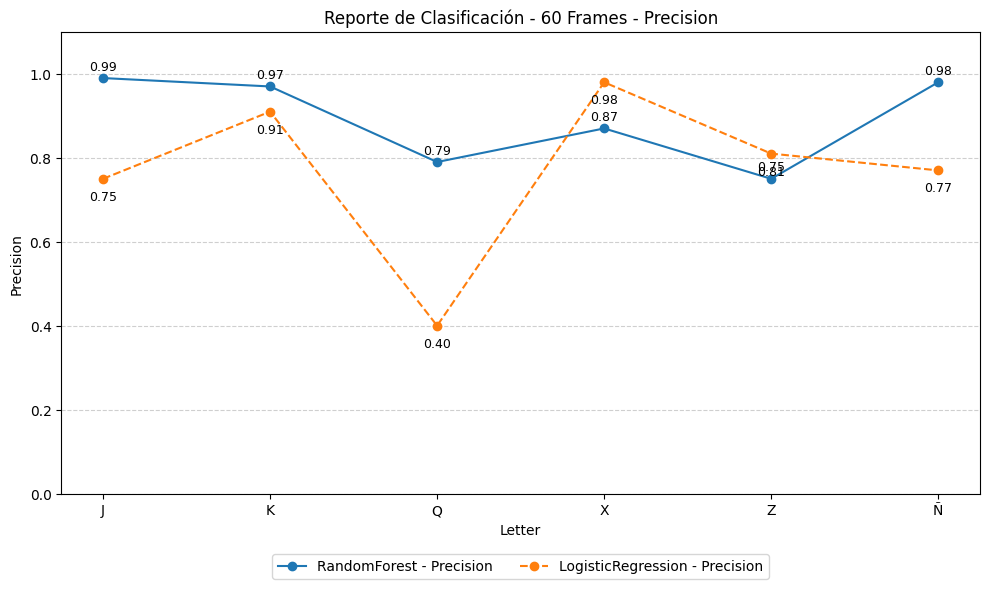

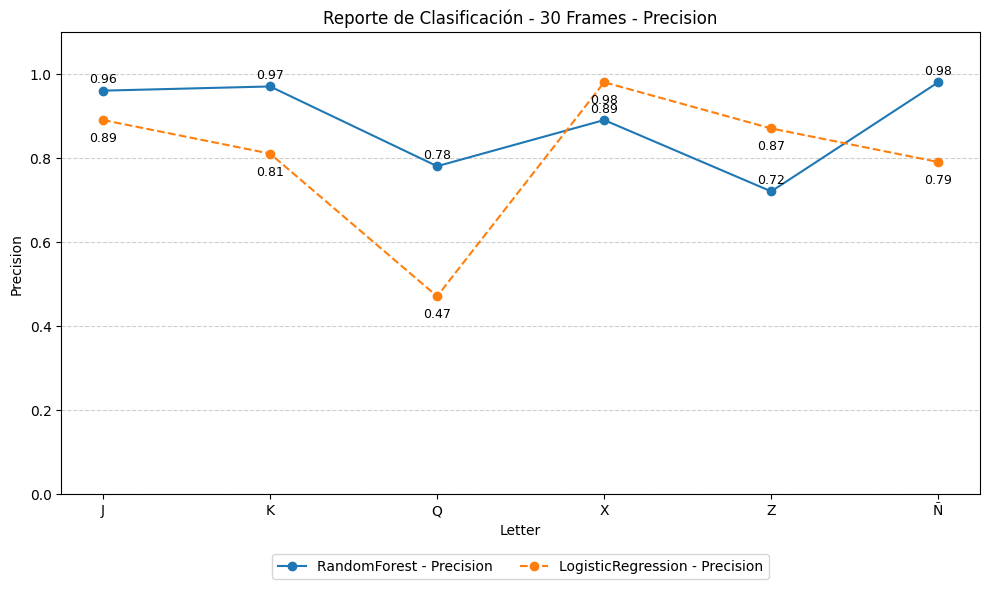

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos para RandomForest (Perfil)
rf_data = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "Precision": [0.99, 0.97, 0.79, 0.87, 0.75, 0.98],
    "Recall": [0.98, 0.67, 0.86, 0.76, 1.00, 1.00],
    "F1-Score": [0.99, 0.79, 0.82, 0.81, 0.86, 0.99]
}

# Datos para LogisticRegression (Frontal)
lr_data = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "Precision": [0.75, 0.91, 0.40, 0.98, 0.81, 0.77],
    "Recall": [0.95, 0.73, 0.95, 0.58, 0.30, 0.96],
    "F1-Score": [0.84, 0.81, 0.57, 0.72, 0.44, 0.85]
}

# Crear DataFrames
df_rf = pd.DataFrame(rf_data)
df_lr = pd.DataFrame(lr_data)

# Código para graficar únicamente la métrica de Precisión
def plot_precision_only(df_rf, df_lr, title):
    metric = "Precision"
    plt.figure(figsize=(10, 6))

    # RandomForest Perfil
    plt.plot(df_rf["Letter"], df_rf[metric], marker='o', linestyle='-', label=f"RandomForest - {metric}", color="#1f77b4")
    # LogisticRegression Frontal
    plt.plot(df_lr["Letter"], df_lr[metric], marker='o', linestyle='--', label=f"LogisticRegression - {metric}", color="#ff7f0e")

    # Agregar números para RandomForest Perfil (por arriba)
    for x, y in zip(df_rf["Letter"], df_rf[metric]):
        plt.text(x, y + 0.02, f"{y:.2f}", fontsize=9, ha='center', color="black")

    # Agregar números para LogisticRegression Frontal (por abajo)
    for x, y in zip(df_lr["Letter"], df_lr[metric]):
        plt.text(x, y - 0.05, f"{y:.2f}", fontsize=9, ha='center', color="black")

    plt.title(f"{title} - {metric}")
    plt.xlabel("Letter")
    plt.ylabel(metric)
    plt.ylim(0, 1.1)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Graficar la precisión
plot_precision_only(df_rf, df_lr, "Reporte de Clasificación - 60 Frames")



import pandas as pd
import matplotlib.pyplot as plt

# Datos para RandomForest (Perfil) - 30 Frames
rf_data_30 = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "Precision": [0.96, 0.97, 0.78, 0.89, 0.72, 0.98],
    "Recall": [1.00, 0.60, 0.88, 0.75, 0.97, 1.00],
    "F1-Score": [0.98, 0.74, 0.83, 0.82, 0.82, 0.99]
}

# Datos para LogisticRegression (Frontal) - 30 Frames
lr_data_30 = {
    "Letter": ["J", "K", "Q", "X", "Z", "Ñ"],
    "Precision": [0.89, 0.81, 0.47, 0.98, 0.87, 0.79],
    "Recall": [0.92, 0.66, 0.96, 0.40, 0.45, 0.96],
    "F1-Score": [0.90, 0.73, 0.63, 0.57, 0.60, 0.87]
}

# Crear DataFrames para los datos
df_rf_30 = pd.DataFrame(rf_data_30)
df_lr_30 = pd.DataFrame(lr_data_30)

# Código para graficar únicamente la métrica de Precisión para 30 Frames
def plot_precision_only_30(df_rf, df_lr, title):
    metric = "Precision"
    plt.figure(figsize=(10, 6))

    # RandomForest Perfil
    plt.plot(df_rf["Letter"], df_rf[metric], marker='o', linestyle='-', label=f"RandomForest - {metric}", color="#1f77b4")
    # LogisticRegression Frontal
    plt.plot(df_lr["Letter"], df_lr[metric], marker='o', linestyle='--', label=f"LogisticRegression - {metric}", color="#ff7f0e")

    # Agregar números para RandomForest Perfil (por arriba)
    for x, y in zip(df_rf["Letter"], df_rf[metric]):
        plt.text(x, y + 0.02, f"{y:.2f}", fontsize=9, ha='center', color="black")

    # Agregar números para LogisticRegression Frontal (por abajo)
    for x, y in zip(df_lr["Letter"], df_lr[metric]):
        plt.text(x, y - 0.05, f"{y:.2f}", fontsize=9, ha='center', color="black")

    plt.title(f"{title} - {metric}")
    plt.xlabel("Letter")
    plt.ylabel(metric)
    plt.ylim(0, 1.1)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Graficar la precisión para 30 Frames
plot_precision_only_30(df_rf_30, df_lr_30, "Reporte de Clasificación - 30 Frames")
